### Note:
- This notebook we will design the target probes for the genes of interest 

In [14]:
import sys,os
sys.path.append(os.path.dirname(os.getcwd()) + os.sep +'package_and_utils' + os.sep + 'LibraryDesign3')
import LibraryTools as lt
import numpy as np
import pandas as pd
from pyensembl import EnsemblRelease
from tqdm import tqdm 
import glob

### 1. Get the list of gene and measure the expression level

In [ ]:
df_expr = pd.read_csv(r'./../../Human_Basal_ganglia_Gene_Probe_design/HumanGenomeTranscriptome/WHB-10Xv3_celltype_expr_mean.csv',index_col = 0).T

In [3]:
df_expr

,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,...,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,hsa-mir-1253,hsa-mir-423,snoZ196
Amygdala excitatory (subcluster 1047),0.0,0.0,0.004202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029412,0.0,3.546221,1.134455,0.0,3.701681,4.924372,0.0,0.0,0.0
Amygdala excitatory (subcluster 1048),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010909,0.0,2.665452,0.661818,0.0,2.450907,3.949088,0.0,0.0,0.0
Amygdala excitatory (subcluster 1049),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.921569,0.450980,0.0,1.509804,2.568628,0.0,0.0,0.0
Amygdala excitatory (subcluster 1522),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,2.075268,0.258064,0.0,1.026881,3.059137,0.0,0.0,0.0
Amygdala excitatory (subcluster 1661),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040541,0.0,1.858109,0.283784,0.0,1.121622,2.581082,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vein-capillary endothelial cell (subcluster 3209),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003546,0.0,0.226950,0.067376,0.0,0.219858,0.943263,0.0,0.0,0.0
Vein-capillary endothelial cell (subcluster 3210),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009934,0.0,0.374172,0.102649,0.0,0.327815,1.158941,0.0,0.0,0.0
Vein-capillary endothelial cell (subcluster 3211),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013333,0.0,0.226667,0.080000,0.0,0.426667,0.960000,0.0,0.0,0.0
Vein-capillary endothelial cell (subcluster 3212),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004630,0.0,0.324074,0.037037,0.0,0.412037,0.990741,0.0,0.0,0.0


In [4]:
# # vizgen 500 gene panel
# vizgen_500_gene = pd.read_csv(r'U:\Lab\Bereket_public\Human_basal_ganglion_project\Human_Basal_ganglia_Gene_Probe_design\HumanGenomeTranscriptome\gene_list_from_DrTong\Vizgen_codebook_0_HumanBrain500GeneXU_CP1453.csv')
# vizgen_500_gene =  [x for x in np.array(vizgen_500_gene.index) if 'blank' not in x.lower()]


# # potential basal ganglia genes
# Basal_ganglia_candidate_genes = np.load(r'U:\Lab\Bereket_public\Human_basal_ganglion_project\Human_Basal_ganglia_Gene_Probe_design\HumanGenomeTranscriptome\potential_basal_ganglia_genes_final.npy')

# # get the genes that do not overlap to Vizgen 500
# Basal_ganglia_candidate_genes = set(Basal_ganglia_candidate_genes).difference(np.array(vizgen_500_gene))
# Basal_ganglia_candidate_genes = np.array(list(Basal_ganglia_candidate_genes))

# # Add marker genes related to Oligodendrocytes and Axonal gudiance genes 
# cellAdh_Axon_genes = np.load(r'U:\Lab\Bereket_public\Human_basal_ganglion_project\Human_Basal_ganglia_Gene_Probe_design\HumanGenomeTranscriptome\Top_50_CellAd_axon_gene.npy')
# BG_Olig_genes = np.load(r'U:\Lab\Bereket_public\Human_basal_ganglion_project\Human_Basal_ganglia_Gene_Probe_design\HumanGenomeTranscriptome\Top40_Olig_genes.npy')

# # concatenate genes and only keep the unique ones
# Basal_ganglia_candidate_genes = np.hstack([Basal_ganglia_candidate_genes,
#                             cellAdh_Axon_genes,
#                             BG_Olig_genes,
#                             np.array(['DRD1','DRD2','PDE10A','TAC1','PENK','CALB1'])
#                                           ])
# Basal_ganglia_candidate_genes = np.unique(Basal_ganglia_candidate_genes)
# Basal_ganglia_candidate_genes.shape

In [ ]:
Basal_ganglia_candidate_genes = np.load(r'./../../Human_Basal_ganglia_Gene_Probe_design/HumanGenomeTranscriptome/BG_gene_list_from_Allen/Allen_potential_BG_cellType_marker_augmented_1312025.npy',allow_pickle = True)
control_genes_UCSD = [ 'LUC7L2','CUL5','SMARCAD1','RBM5','PAFAH1B1','RBM6','SRSF11','DCAF10','PSMD1','YLPM1','OPA1','GOSR1','SNX14','SENP5','UBR2','PRKDC','N4BP2L2','YME1L1','PTCD3','PSPC1']

In [5]:
# Basal_ganglia_candidate_genes.shape,len(control_genes_UCSD)
Basal_ganglia_candidate_genes = np.unique(
                                 np.hstack(
                                     [
                                         Basal_ganglia_candidate_genes,
                                         np.array(control_genes_UCSD)
                                     ]
                                 )
)
Basal_ganglia_candidate_genes.shape

(992,)

In [6]:
# make sure all the Human control genes are included
np.isin(control_genes_UCSD,Basal_ganglia_candidate_genes)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [7]:
# make sure there are not 'blank' genes included by accident 
genesT = [x for x in Basal_ganglia_candidate_genes if 'blank' not in x.lower()]
len(genesT), genesT

(992,
 ['ABCA8',
  'ABCG2',
  'ABI3BP',
  'ABO',
  'AC002066.1',
  'AC002072.1',
  'AC002383.1',
  'AC004551.1',
  'AC004690.2',
  'AC004852.2',
  'AC005064.1',
  'AC005400.1',
  'AC006305.1',
  'AC007091.1',
  'AC007319.1',
  'AC007368.1',
  'AC007614.1',
  'AC008127.1',
  'AC008415.1',
  'AC008691.1',
  'AC008771.1',
  'AC008786.1',
  'AC008945.2',
  'AC010280.1',
  'AC010478.1',
  'AC010997.3',
  'AC011246.1',
  'AC011990.1',
  'AC012405.1',
  'AC012494.1',
  'AC013265.1',
  'AC015631.1',
  'AC016074.2',
  'AC016723.1',
  'AC016766.1',
  'AC018467.1',
  'AC019068.1',
  'AC019211.1',
  'AC019330.1',
  'AC020584.1',
  'AC020718.1',
  'AC022126.1',
  'AC023095.1',
  'AC023590.1',
  'AC025887.2',
  'AC036214.1',
  'AC044798.3',
  'AC046195.1',
  'AC046195.2',
  'AC048352.1',
  'AC060765.1',
  'AC061958.1',
  'AC067956.1',
  'AC068051.1',
  'AC068308.1',
  'AC068722.1',
  'AC068787.2',
  'AC068875.1',
  'AC069410.1',
  'AC073365.1',
  'AC073941.1',
  'AC076968.2',
  'AC079052.1',
  'AC07

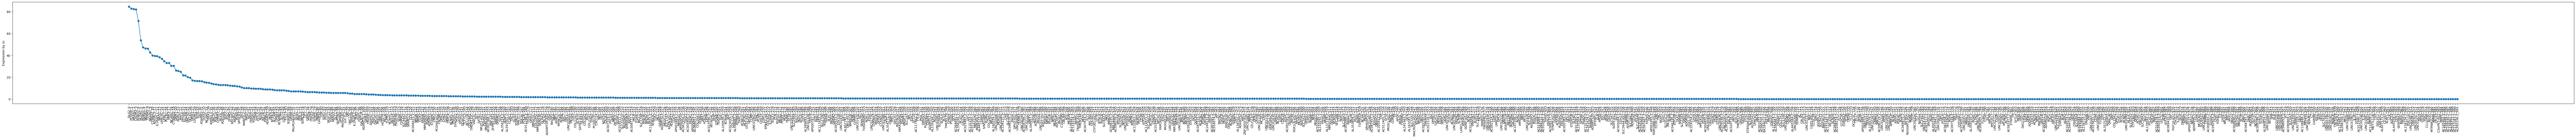

In [9]:
all_genes = list(df_expr.columns)
genes = np.array(genesT)
X = np.array(df_expr).T
X[np.isnan(X)]=0
ucls = cls = list(df_expr.index)
means = np.array([X[all_genes.index(gn)] if gn in all_genes else X[0]*0 for gn in genes]).T

mns = np.mean(means,axis=0) # mean expression of the genes across cell type/subtypes
igns = np.argsort(mns)[::-1]
import matplotlib.pylab as plt
plt.figure(figsize=(150,6))
plt.plot(mns[igns],'o-')
plt.ylabel('Expression by sc')
plt.xticks(np.arange(len(genes)),[gn+'_'+str(ign)for ign,gn in enumerate(genes[igns])],rotation='vertical');

In [10]:
# exclude_gns = genes[igns][mns[igns]>20].tolist()
exclude_gns = genes[igns][mns[igns]>20].tolist() + ['AC004551.1', 'AC004690.2', 'AC004852.2', 'AC006305.1',
       'AC007091.1', 'AC007319.1', 'AC007614.1', 'AC008127.1',
       'AC008786.1', 'AC008945.2', 'AC010997.3', 'AC011246.1',
       'AC011990.1', 'AC012405.1', 'AC012494.1', 'AC013265.1',
       'AC015631.1', 'AC016074.2', 'AC019068.1', 'AC020584.1',
       'AC020718.1', 'AC022126.1', 'AC025887.2', 'AC044798.3',
       'AC046195.2', 'AC048352.1', 'AC068051.1', 'AC068308.1',
       'AC068722.1', 'AC068787.2', 'AC068875.1', 'AC069410.1',
       'AC073365.1', 'AC073941.1', 'AC076968.2', 'AC079052.1',
       'AC079148.3', 'AC087477.2', 'AC090809.1', 'AC092110.1',
       'AC092114.1', 'AC092819.3', 'AC092924.2', 'AC093765.3',
       'AC096570.1', 'AC096576.3', 'AC096719.1', 'AC097512.1',
       'AC097515.1', 'AC097518.2', 'AC110023.1', 'AC110809.1',
       'AC112481.2', 'AC113383.1', 'AC114316.1', 'AC114485.1',
       'AC114971.1', 'AC117453.1', 'AC124254.2', 'AC126121.3',
       'AC132153.1', 'AC132803.1', 'AC231759.2', 'AC244131.2',
       'AL096709.1', 'AL109930.1', 'AL110292.1', 'AL122014.1',
       'AL133304.3', 'AL136441.1', 'AL136962.1', 'AL137139.2',
       'AL138701.2', 'AL138720.1', 'AL139042.1', 'AL139379.1',
       'AL157886.1', 'AL158154.3', 'AL163541.1', 'AL353604.1',
       'AL354771.1', 'AL356295.1', 'AL356488.2', 'AL359220.1',
       'AL391832.4', 'AL445123.2', 'AL445259.1', 'AL445584.2',
       'AL450338.2', 'AL590814.1', 'AL590867.1', 'AL591463.1',
       'AL591501.1', 'AL592156.2', 'AL627171.2', 'AL627316.1',
       'AC002066.1', 'AC002072.1', 'AC002383.1', 'AC005064.1', 
        'AC005400.1', 'AC007368.1','AC008415.1', 'AC008691.1', 
        'AC008771.1', 'AC010280.1','AC010478.1', 'AC016723.1', 
        'AC016766.1', 'AC018467.1','AC019211.1', 'AC019330.1',
        'AC023095.1', 'AC023590.1','AC036214.1', 'AC046195.1',
        'AC060765.1', 'AC061958.1','AC067956.1', 'AC087457.1', 
        'AC091826.2', 'AC093523.1','AC093765.2', 'AC097467.3',
        'AC104574.2', 'AC105402.3','AC105411.1', 'AC107208.1', 
        'AC117461.1', 'AC138646.1','AC159540.2','AJ006995.1',
        'AL139294.1', 'AL160254.1','AL161629.1', 'AL356124.1',
        'AL357522.1', 'AL390957.1','AL589693.1', 'AL596087.2',
        'AL807742.1','AP000787.1', 'AP000829.1','AP001993.1', 
        'AP002989.1', 'AP003121.1', 'AP003464.1','BX284613.2',
        'C3orf67-AS1','FAM160A1','FAM198B-AS1','METTL11B','MTRNR2L12'                                          
        ]  # I also appended the following non-coding genes as 'bed genes'

genesT = np.setdiff1d(genes,exclude_gns)
print("Excluded gene:",exclude_gns)

genesT

Excluded gene: ['DLG2', 'PCDH9', 'NRXN1', 'CADM2', 'ROBO2', 'NLGN1', 'ROBO1', 'NEGR1', 'TENM2', 'NKAIN2', 'CTNNA2', 'ADGRL3', 'IL1RAPL1', 'NRG1', 'LRRC4C', 'LRRC7', 'PLCB1', 'ANK3', 'NCAM2', 'CTNND2', 'GRM7', 'AGBL4', 'MAP2', 'EPHA6', 'KALRN', 'UNC5D', 'AC004551.1', 'AC004690.2', 'AC004852.2', 'AC006305.1', 'AC007091.1', 'AC007319.1', 'AC007614.1', 'AC008127.1', 'AC008786.1', 'AC008945.2', 'AC010997.3', 'AC011246.1', 'AC011990.1', 'AC012405.1', 'AC012494.1', 'AC013265.1', 'AC015631.1', 'AC016074.2', 'AC019068.1', 'AC020584.1', 'AC020718.1', 'AC022126.1', 'AC025887.2', 'AC044798.3', 'AC046195.2', 'AC048352.1', 'AC068051.1', 'AC068308.1', 'AC068722.1', 'AC068787.2', 'AC068875.1', 'AC069410.1', 'AC073365.1', 'AC073941.1', 'AC076968.2', 'AC079052.1', 'AC079148.3', 'AC087477.2', 'AC090809.1', 'AC092110.1', 'AC092114.1', 'AC092819.3', 'AC092924.2', 'AC093765.3', 'AC096570.1', 'AC096576.3', 'AC096719.1', 'AC097512.1', 'AC097515.1', 'AC097518.2', 'AC110023.1', 'AC110809.1', 'AC112481.2', 'AC11

array(['ABCA8', 'ABCG2', 'ABI3BP', 'ABO', 'ACOXL', 'ACTA2', 'ACVR1C',
       'ADAM12', 'ADAM2', 'ADAM23', 'ADAM28', 'ADAMTS17', 'ADAMTS18',
       'ADAMTS2', 'ADAMTS20', 'ADAMTS9', 'ADAMTS9-AS2', 'ADAMTSL1',
       'ADAMTSL3', 'ADARB2', 'ADCYAP1', 'ADGB', 'ADGRD1', 'ADGRF5',
       'ADGRG6', 'ADGRL4', 'ADGRV1', 'ADM', 'ADORA2A', 'ADRA1B', 'AEBP1',
       'AGBL1', 'ALCAM', 'ALDH1A1', 'AMIGO2', 'ANGPT1', 'ANLN', 'ANO2',
       'APBB1IP', 'APOD', 'APOE', 'AQP1', 'AQP4', 'ARHGAP10', 'ARHGAP15',
       'ASAH2', 'ATP10A', 'ATP10B', 'ATP2A3', 'ATP8B4', 'BAIAP3', 'BCAN',
       'BCAS1', 'BCL11B', 'BEND7', 'BEST3', 'BICC1', 'BLM', 'BLNK',
       'BMPR1B', 'BNC2', 'BTNL9', 'C10orf90', 'C11orf96', 'C1QL1',
       'C1QL3', 'C3', 'C4orf19', 'C7', 'CA8', 'CACNG5', 'CADM1', 'CADPS2',
       'CALB1', 'CALB2', 'CALCRL', 'CARMN', 'CASC6', 'CASR', 'CAV1',
       'CAV2', 'CBLN1', 'CBLN2', 'CBLN4', 'CCBE1', 'CCDC178', 'CCDC196',
       'CCDC26', 'CCDC39', 'CCK', 'CD163', 'CD247', 'CD36', 'CD3D',
       'CD

In [11]:
genesT.shape

(813,)

In [12]:
# check the classical BG marker asre still included
np.isin(np.array(['DRD1','DRD2','PDE10A','TAC1','PENK','CALB1']),genesT)

array([ True,  True,  True,  True,  True,  True])

### 2.  Get isoform for each gene and identify the longest isoform transcript

In [13]:
class geneInfo():
    def __init__(self,transcript_file ='.' + os.sep + 'human__genesUnspliced.fasta', 
                 biotype=None):
        self.transcript_file = transcript_file
        
        self.names,self.seqs = lt.fastaread(transcript_file)
        self.data = EnsemblRelease(release=108,species='human')
        self.biotype=biotype
    def load(self,gn_name):
        self.gn_name = gn_name
        if True:
            self.gns = self.data.genes_by_name(self.gn_name)
            self.gene = self.gns[0]
            if self.biotype is None:
                self.biotype = ''
                if np.any(['protein_coding' in t.biotype for t in self.gene.transcripts if (t.sequence is not None)]):
                    self.biotype = 'protein_coding'
            len_seqs = [len(t.sequence) for t in self.gene.transcripts if (t.sequence is not None) if (self.biotype in t.biotype)]

            self.gene_transcripts = [t for t in self.gene.transcripts if (t.sequence is not None) if (self.biotype in t.biotype)]
        else:
            len_seqs=[]
        self.exon_sequence =''
        self.intron_sequence =''
        self.full_sq = ''
        if len(len_seqs):
            # select longest transcript
            self.transcript = self.gene_transcripts[np.argmax(len_seqs)]
            self.full_sq = [sq for nm,sq in zip(self.names,self.seqs) if self.gene.id in nm][0]
            self.strand = int(self.gene.strand=='-')
            self.exon_interv = np.array(self.transcript.exon_intervals)-self.gene.start if self.strand==0 else self.gene.end-np.array(self.transcript.exon_intervals)[:,::-1]

            bp_exon = [e_ for st,ed in self.exon_interv for e_ in np.arange(st,ed)]
            bp_intron = np.setdiff1d(np.arange(0,self.gene.end-self.gene.start),bp_exon)
            self.intron_interv = []
            if len(bp_intron):
                inz = np.where(np.diff(bp_intron)!=1)[0]
                self.intron_interv = np.array([[bp_intron[0]]+list(bp_intron[inz+1]),list(bp_intron[inz])+[bp_intron[-1]]]).T
            self.exon_sequence = self.transcript.sequence
            if len(self.intron_interv):
                self.intron_sequence = 'N'.join([self.full_sq[st:ed] for st,ed in self.intron_interv])
    def get_full_sq(self,gn_name):
        self.gn_name = gn_name
        self.gns = self.data.genes_by_name(self.gn_name)
        self.gene = self.gns[0]
        self.full_sq = [sq for nm,sq in zip(self.names,self.seqs) if self.gene.id in nm][0] 
        return self.full_seq

In [14]:
geneInfo_inst = geneInfo(transcript_file = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'human__genesUnspliced.fasta',)

In [19]:
probe_fld = 'ProbesRNA_HumanBasalGangliaAllen690'

In [16]:
fld_sv = os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + f'{probe_fld}'
if not os.path.exists(fld_sv): os.makedirs(fld_sv, exist_ok = True)

bad_names=[]
for marker in tqdm(genesT, desc = 'getting exon and intron sequences', leave=False):

    geneInfo_inst.load(marker)
    names = [marker]
    seqs = [geneInfo_inst.exon_sequence]
    print(marker,len(geneInfo_inst.exon_sequence),len(geneInfo_inst.intron_sequence))
    if len(geneInfo_inst.exon_sequence)==0:
        bad_names.append(marker)
    
    file_name = fld_sv+os.sep+marker+'_exons.fasta'
    lt.fastawrite(file_name, names, seqs)

    seqs = [geneInfo_inst.intron_sequence]
    file_name = fld_sv+os.sep+marker+'_introns.fasta'
    lt.fastawrite(file_name, names, seqs)

getting exon and intron sequences:   0%|                                                                                               | 0/813 [00:00<?, ?it/s]INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\exx\AppData\Local\pyensembl\GRCh38\ensembl108\pyensembl\GRCh38\ensembl108\Cache\Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\exx\AppData\Local\pyensembl\GRCh38\ensembl108\pyensembl\GRCh38\ensembl108\Cache\Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
getting exon and intron sequences:   0%|▎                                                                                      | 3/813 [00:01<04:50,  2.79it/s]

ABCA8 6002 82140
ABCG2 4844 136650
ABI3BP 6737 237689
ABO 6359 36393


getting exon and intron sequences:   1%|▋                                                                                      | 7/813 [00:01<01:53,  7.10it/s]

ACOXL 4885 383204
ACTA2 1349 54924
ACVR1C 8853 93252
ADAM12 7941 368177


getting exon and intron sequences:   1%|█▏                                                                                    | 11/813 [00:01<01:16, 10.42it/s]

ADAM2 2610 91902
ADAM23 6334 171286
ADAM28 7082 57886
ADAMTS17 6329 364260


getting exon and intron sequences:   2%|█▌                                                                                    | 15/813 [00:02<00:59, 13.47it/s]

ADAMTS18 5833 181410
ADAMTS2 6783 227846
ADAMTS20 6358 192017
ADAMTS9 7624 164761
ADAMTS9-AS2 0 0


getting exon and intron sequences:   2%|██                                                                                    | 20/813 [00:02<00:54, 14.43it/s]

ADAMTSL1 7771 996644
ADAMTSL3 7299 378484
ADARB2 8475 551746


getting exon and intron sequences:   3%|██▌                                                                                   | 24/813 [00:02<00:47, 16.45it/s]

ADCYAP1 3346 3958
ADGB 5318 211212
ADGRD1 5390 182196
ADGRF5 5761 96680


getting exon and intron sequences:   3%|██▊                                                                                   | 26/813 [00:02<00:47, 16.55it/s]

ADGRG6 7026 137411
ADGRL4 3672 388704
ADGRV1 19557 615625
ADM 1889 437


getting exon and intron sequences:   4%|███▏                                                                                  | 30/813 [00:02<00:46, 16.94it/s]

ADORA2A 2736 21745
ADRA1B 2507 105426
AEBP1 4097 6140


getting exon and intron sequences:   4%|███▌                                                                                  | 34/813 [00:03<00:49, 15.73it/s]

AGBL1 12330 956990
ALCAM 4701 205305
ALDH1A1 2096 177687
AMIGO2 3763 490


getting exon and intron sequences:   5%|████                                                                                  | 38/813 [00:03<00:47, 16.42it/s]

ANGPT1 4353 244228
ANLN 4731 59262
ANO2 3720 410669
APBB1IP 2633 126843


getting exon and intron sequences:   5%|████▌                                                                                 | 43/813 [00:03<00:42, 17.97it/s]

APOD 862 14470
APOE 1166 2439
AQP1 2754 10913
AQP4 5200 8532


getting exon and intron sequences:   6%|████▊                                                                                 | 45/813 [00:03<00:45, 16.95it/s]

ARHGAP10 3270 337465
ARHGAP15 2968 674028
ASAH2 7171 89792


getting exon and intron sequences:   6%|█████▏                                                                                | 49/813 [00:04<00:43, 17.51it/s]

ATP10A 7434 180487
ATP10B 7565 281554
ATP2A3 4826 35789
ATP8B4 5688 318918


getting exon and intron sequences:   7%|█████▌                                                                                | 53/813 [00:04<00:42, 18.00it/s]

BAIAP3 4732 11104
BCAN 3297 14858
BCAS1 6112 127713
BCL11B 8528 94385
BEND7 6524 84008


getting exon and intron sequences:   7%|██████▏                                                                               | 59/813 [00:04<00:42, 17.59it/s]

BEST3 3419 52706
BICC1 5741 312842
BLM 5240 93601
BLNK 4344 78088


getting exon and intron sequences:   8%|██████▋                                                                               | 63/813 [00:04<00:43, 17.25it/s]

BMPR1B 5580 394925
BNC2 12808 448538
BTNL9 3457 17849
C10orf90 3471 370249


getting exon and intron sequences:   8%|██████▉                                                                               | 66/813 [00:04<00:38, 19.19it/s]

C11orf96 1242 0
C1QL1 1527 7084
C1QL3 2376 5770
C3 5231 47667


getting exon and intron sequences:   9%|███████▍                                                                              | 70/813 [00:05<00:40, 18.49it/s]

C4orf19 3643 165930
C7 5716 69452
CA8 5735 90261
CACNG5 10576 49063


getting exon and intron sequences:   9%|███████▊                                                                              | 74/813 [00:05<00:42, 17.52it/s]

CADM1 8675 327075
CADPS2 6065 562312
CALB1 2533 34344
CALB2 1454 30279


getting exon and intron sequences:  10%|████████▍                                                                             | 80/813 [00:05<00:33, 21.91it/s]

CALCRL 6112 100398
CARMN 0 0
CASC6 0 0
CASR 10062 97905
CAV1 2652 33535
CAV2 2953 218210


getting exon and intron sequences:  10%|████████▊                                                                             | 83/813 [00:05<00:35, 20.86it/s]

CBLN1 2442 1481
CBLN2 2747 99098
CBLN4 3154 5010
CCBE1 6403 260331


getting exon and intron sequences:  11%|█████████▍                                                                            | 89/813 [00:06<00:36, 19.58it/s]

CCDC178 3420 500301
CCDC196 1821 85161
CCDC26 0 0
CCDC39 3848 78255
CCK 1504 6860


getting exon and intron sequences:  11%|█████████▊                                                                            | 93/813 [00:06<00:37, 19.06it/s]

CD163 4268 28830
CD247 2274 85702
CD36 4598 305118
CD3D 701 2933
CD44 5431 88106


getting exon and intron sequences:  12%|██████████▎                                                                           | 97/813 [00:06<00:43, 16.33it/s]

CD96 4328 368716
CDH13 7876 1165812
CDH23 11138 407958


getting exon and intron sequences:  12%|██████████▌                                                                          | 101/813 [00:06<00:43, 16.54it/s]

CDH8 9316 380488
CDH9 3082 237482
CDK15 3719 101383
CDK18 3141 25071
CELF2-DT 0 0


getting exon and intron sequences:  13%|███████████▏                                                                         | 107/813 [00:07<00:39, 17.86it/s]

CER1 1231 1779
CFAP47 9941 455705
CFTR 6070 422807
CHAT 5296 53565


getting exon and intron sequences:  13%|███████████▍                                                                         | 109/813 [00:07<00:40, 17.24it/s]

CHI3L1 1747 6035
CHN2 3343 364427
CHODL 2545 363570
CHRM2 5971 145635


getting exon and intron sequences:  14%|███████████▊                                                                         | 113/813 [00:07<00:43, 16.16it/s]

CHRM3 9179 519714
CHRM5 5802 93161
CHRNA2 4037 16096
CHRNA3 3015 25233


getting exon and intron sequences:  14%|████████████▏                                                                        | 117/813 [00:07<00:43, 15.95it/s]

CHRNA7 6149 243440
CHST9 11379 267453
CLCF1 1705 8306
CLDN5 2548 1974


getting exon and intron sequences:  15%|████████████▊                                                                        | 122/813 [00:08<00:39, 17.56it/s]

CLIC6 4197 45041
CLMP 5032 120350
CMTM8 1169 130476
CNBD1 1653 747163


getting exon and intron sequences:  16%|█████████████▎                                                                       | 127/813 [00:08<00:38, 17.72it/s]

CNGB1 5657 83163
CNKSR3 21078 102104
CNR1 6200 20286
CNTN6 4065 307516


getting exon and intron sequences:  16%|█████████████▋                                                                       | 131/813 [00:08<00:37, 18.29it/s]

COCH 2860 17701
COL11A1 7327 225144
COL12A1 11725 110281
COL15A1 5422 122233
COL18A1 6586 102009


getting exon and intron sequences:  17%|██████████████                                                                       | 135/813 [00:08<00:38, 17.42it/s]

COL19A1 8740 337222
COL21A1 4173 333360
COL24A1 6834 420935
COL26A1 2978 193183


getting exon and intron sequences:  17%|██████████████▌                                                                      | 139/813 [00:09<00:37, 17.91it/s]

COL27A1 7813 149221
COL4A1 6540 151705
COL4A2 6446 200998
COL5A2 6829 186638


getting exon and intron sequences:  18%|██████████████▉                                                                      | 143/813 [00:09<00:36, 18.52it/s]

COL5A3 6207 44802
CORIN 4967 239161
CORT 914 1054
CPAMD8 6913 126992


getting exon and intron sequences:  18%|███████████████▎                                                                     | 147/813 [00:09<00:37, 17.70it/s]

CPLX3 2002 3175
CPNE4 5431 746443
CPNE9 2042 24060
CPXM2 3544 230529


getting exon and intron sequences:  19%|███████████████▊                                                                     | 151/813 [00:09<00:36, 18.14it/s]

CRABP1 738 7137
CRH 1288 801
CRHR2 3131 45069
CRNDE 0 0
CRYAB 2271 12889


getting exon and intron sequences:  19%|████████████████▍                                                                    | 157/813 [00:09<00:32, 20.05it/s]

CRYM 1482 62736
CST3 3286 8484
CTSH 2169 26358
CTSS 4074 31810
CTXND1 6893 49841


getting exon and intron sequences:  20%|█████████████████                                                                    | 163/813 [00:10<00:30, 21.32it/s]

CUL5 6171 92710
CUX2 6703 309707
CXCL14 1971 6632
CYP19A1 4403 126150
CYP1B1-AS1 0 0


getting exon and intron sequences:  20%|█████████████████▎                                                                   | 166/813 [00:10<00:33, 19.46it/s]

CYP26B1 4556 14073
DAB2 4537 86101
DACH1 5401 423848
DBH 2745 20232


getting exon and intron sequences:  21%|█████████████████▋                                                                   | 169/813 [00:10<00:32, 19.62it/s]

DCAF10 7906 59212
DCDC2C 2097 142346
DCLK1 8394 354352
DCN 6850 35890


getting exon and intron sequences:  21%|██████████████████▏                                                                  | 174/813 [00:10<00:35, 17.95it/s]

DDO 2130 21678
DDR2 10160 145890
DIAPH2 9203 911108
DIO2-AS1 0 0
DIO3 2102 1211


getting exon and intron sequences:  22%|██████████████████▌                                                                  | 178/813 [00:11<00:28, 22.31it/s]

DIRAS3 2392 3441
DISC1FP1 0 0
DLC1 7412 513854
DLG1 5972 250820


getting exon and intron sequences:  23%|███████████████████▏                                                                 | 184/813 [00:11<00:33, 18.57it/s]

DLK1 4657 7866
DMBX1 5050 21335
DNAH12 12145 238573
DNAH8 14663 300910


getting exon and intron sequences:  23%|███████████████████▍                                                                 | 186/813 [00:11<00:34, 18.26it/s]

DOCK5 10246 223198
DOCK8 7448 243004
DPYD-AS1 0 0
DRD1 4031 116
DRD2 2808 63285


getting exon and intron sequences:  24%|████████████████████                                                                 | 192/813 [00:11<00:33, 18.45it/s]

DST 24709 472237
EBF1 5405 398610
EBF3 5106 132730
ECEL1 2871 5153


getting exon and intron sequences:  24%|████████████████████▍                                                                | 196/813 [00:12<00:34, 17.85it/s]

EDIL3 4814 439522
EDNRB 4471 75584
EFEMP1 3024 55158
EFNB2 4995 40926


getting exon and intron sequences:  25%|████████████████████▉                                                                | 200/813 [00:12<00:33, 18.36it/s]

EGLN3 2849 535698
ELFN1 4228 77975
ELN 3452 38693
EMP1 5913 17309
EMX2OS 0 0


getting exon and intron sequences:  25%|█████████████████████▌                                                               | 206/813 [00:12<00:29, 20.79it/s]

ENO4 2878 59424
ENPP2 3271 113121
ENTHD1 2680 148146
EPB41L4A 4670 272224
EPHA3 5712 368817


getting exon and intron sequences:  26%|█████████████████████▊                                                               | 209/813 [00:12<00:31, 19.47it/s]

ERBIN 8544 154421
ERG 5034 276729
ETNPPL 2086 18932
EXPH5 10304 78034


getting exon and intron sequences:  26%|██████████████████████▍                                                              | 215/813 [00:13<00:31, 18.87it/s]

EYA1 4254 390358
EYA2 2612 291622
EYA4 5701 285932
F13A1 3828 173115


getting exon and intron sequences:  27%|██████████████████████▊                                                              | 218/813 [00:13<00:30, 19.36it/s]

FAM163A 2781 70130
FAM189A2 2906 65092
FAM9B 2103 269355
FAT1 14776 124178


getting exon and intron sequences:  27%|███████████████████████▎                                                             | 223/813 [00:13<00:31, 18.53it/s]

FAT3 19504 652178
FBN2 10927 390413
FER1L6-AS2 0 0
FGF10 6113 83348
FGF10-AS1 0 0


getting exon and intron sequences:  28%|███████████████████████▋                                                             | 226/813 [00:13<00:28, 20.33it/s]

FHAD1 5610 158185
FIBCD1 3650 33204
FLT1 7123 187705
FLT3 3826 93515
FMNL2 5630 309047


getting exon and intron sequences:  28%|████████████████████████▏                                                            | 231/813 [00:13<00:31, 18.19it/s]

FOXB1 2871 54626
FOXP1 7177 622128
FOXP2 6543 600918


getting exon and intron sequences:  29%|████████████████████████▌                                                            | 235/813 [00:14<00:33, 17.31it/s]

FREM1 7566 166313
FREM2 16122 183955
FRMD5 5059 319464
FRMD7 3203 47838


getting exon and intron sequences:  29%|████████████████████████▉                                                            | 239/813 [00:14<00:33, 17.15it/s]

FRMPD1 5465 90500
FRZB 2637 30730
FSTL5 4796 775326
FTH1 1203 6716


getting exon and intron sequences:  30%|█████████████████████████▌                                                           | 244/813 [00:14<00:30, 18.57it/s]

GABRG1 6758 81535
GAD2 5391 82517
GALNT18 2503 348635
GALR1 10749 17305


getting exon and intron sequences:  30%|█████████████████████████▊                                                           | 247/813 [00:14<00:30, 18.85it/s]

GATA3 3083 26742
GBX1 1818 24919
GDA 5367 137244
GDNF-AS1 0 0
GEM 2187 10914


getting exon and intron sequences:  31%|██████████████████████████▍                                                          | 253/813 [00:15<00:27, 20.68it/s]

GFAP 5501 8285
GFRA1 9161 210727
GINS3 2200 108869
GJA1 3083 11050
GLI2 7136 249907


getting exon and intron sequences:  31%|██████████████████████████▊                                                          | 256/813 [00:15<00:30, 18.20it/s]

GLI3 8405 294760
GLIS3 7684 516591
GLP1R 6682 35852
GLRA2 3208 199314


getting exon and intron sequences:  32%|███████████████████████████▎                                                         | 261/813 [00:15<00:28, 19.67it/s]

GLRA3 8697 183639
GNA14-AS1 0 0
GOSR1 6039 44199
GPC3 2336 449027


getting exon and intron sequences:  32%|███████████████████████████▌                                                         | 264/813 [00:15<00:29, 18.48it/s]

GPC4 4959 110435
GPM6B 3957 163748
GPR17 2598 4180
GPR6 1945 521
GPR88 3492 391


getting exon and intron sequences:  33%|████████████████████████████▎                                                        | 271/813 [00:16<00:30, 17.65it/s]

GREM2 4176 118407
GRIK1 3643 399474
GRIK3 9491 229512
GRM1 6846 403116


getting exon and intron sequences:  34%|████████████████████████████▌                                                        | 273/813 [00:16<00:34, 15.61it/s]

GRM3 4268 216707
GRM8 3850 810655
GRP 858 9760
GRXCR2 2005 76602


getting exon and intron sequences:  34%|█████████████████████████████▏                                                       | 279/813 [00:16<00:29, 18.16it/s]

HCRTR2 1936 174228
HDC 2405 21624
HHIP 9937 89190
HLA-E 2548 2144
HMGCS1 5350 20702


getting exon and intron sequences:  35%|█████████████████████████████▋                                                       | 284/813 [00:16<00:29, 17.88it/s]

HPGD 2920 30064
HPSE2 4326 774470
HS3ST4 3267 442460
HSPA1B 2517 0


getting exon and intron sequences:  36%|██████████████████████████████▏                                                      | 289/813 [00:17<00:27, 19.02it/s]

HSPB8 1861 51441
HTR2A 5415 60118
HTR3A 2331 12914
HTR7 3467 113752
HUNK 7680 163943


getting exon and intron sequences:  36%|██████████████████████████████▋                                                      | 293/813 [00:17<00:27, 19.10it/s]

ID2 2041 3579
IGF1 7277 78596
IGF2 5580 23702
IGFBP2 1414 30197


getting exon and intron sequences:  36%|██████████████████████████████▉                                                      | 296/813 [00:17<00:26, 19.46it/s]

IGFBP5 6239 17208
IGFBPL1 3566 14364
IL17RD 8698 71638
IL1R1 5183 110158
IL1RAP 5413 140297


getting exon and intron sequences:  37%|███████████████████████████████▋                                                     | 303/813 [00:17<00:26, 18.92it/s]

IL1RAPL2 3101 1198539
IL32 1198 15702
IL6R-AS1 0 0
IL7R 4584 22331
INSYN2A 4836 56334


getting exon and intron sequences:  38%|████████████████████████████████                                                     | 307/813 [00:18<00:27, 18.38it/s]

IQGAP2 5808 299074
ISL1 2394 8893
ITGA8 6547 199450
IVNS1ABP 4113 16786
KAZN-AS1 0 0


getting exon and intron sequences:  38%|████████████████████████████████▍                                                    | 310/813 [00:18<00:25, 19.57it/s]

KCNG1 3722 15730
KCNH5 11283 391300
KCNH8 5077 382070
KCNIP1 2249 380904


getting exon and intron sequences:  39%|████████████████████████████████▉                                                    | 315/813 [00:18<00:25, 19.35it/s]

KCNJ16 4190 77994
KCNJ5 6068 23741
KCNK10 7530 139280
KCNK13 2289 121571


getting exon and intron sequences:  39%|█████████████████████████████████▎                                                   | 319/813 [00:18<00:27, 18.01it/s]

KCNMB2 2552 568949
KCNS3 2397 481374
KCNT1 7123 86230
KIF1B 10855 160226


getting exon and intron sequences:  40%|█████████████████████████████████▊                                                   | 323/813 [00:18<00:27, 17.53it/s]

KIRREL3 3820 576298
KIT 5483 78053
KITLG 5737 82329
KL 5014 44710


getting exon and intron sequences:  40%|██████████████████████████████████▏                                                  | 327/813 [00:19<00:27, 17.90it/s]

KLB 6002 38605
KLHL4 5765 146886
KLRF1 1239 16292
KLRG2 2158 28829


getting exon and intron sequences:  41%|██████████████████████████████████▋                                                  | 332/813 [00:19<00:23, 20.10it/s]

LAMA3 10651 256192
LAMP5 1810 14361
LANCL1-AS1 0 0
LCK 2257 32675
LECT2 1033 31674


getting exon and intron sequences:  42%|███████████████████████████████████▎                                                 | 338/813 [00:19<00:22, 20.73it/s]

LEF1 3575 117847
LGALS1 528 3641
LGR5 4583 141946
LGR6 3649 122350
LHX1 3425 4406


getting exon and intron sequences:  42%|███████████████████████████████████▊                                                 | 342/813 [00:19<00:19, 23.93it/s]

LHX1-DT 0 0
LHX5-AS1 0 0
LHX8 2373 30735
LHX9 7865 15715
LINC00261 0 0
LINC00278 0 0
LINC00299 0 0
LINC00348 0 0
LINC00354 0 0


getting exon and intron sequences:  44%|█████████████████████████████████████                                                | 354/813 [00:19<00:11, 38.74it/s]

LINC00390 0 0
LINC00457 0 0
LINC00499 0 0
LINC00609 0 0
LINC00639 0 0
LINC00683 0 0
LINC00707 0 0
LINC00836 0 0
LINC00861 0 0
LINC00906 0 0
LINC00922 0 0
LINC01060 0 0


getting exon and intron sequences:  45%|██████████████████████████████████████▎                                              | 367/813 [00:20<00:09, 47.73it/s]

LINC01088 0 0
LINC01094 0 0
LINC01117 0 0
LINC01118 0 0
LINC01170 0 0
LINC01210 0 0
LINC01378 0 0
LINC01435 0 0
LINC01470 0 0
LINC01482 0 0
LINC01487 0 0
LINC01515 0 0


getting exon and intron sequences:  47%|███████████████████████████████████████▋                                             | 380/813 [00:20<00:08, 52.98it/s]

LINC01608 0 0
LINC01630 0 0
LINC01681 0 0
LINC01684 0 0
LINC01727 0 0
LINC01735 0 0
LINC01776 0 0
LINC01792 0 0
LINC01798 0 0
LINC01837 0 0
LINC01871 0 0
LINC01876 0 0


getting exon and intron sequences:  48%|█████████████████████████████████████████▏                                           | 394/813 [00:20<00:07, 57.36it/s]

LINC01885 0 0
LINC01902 0 0
LINC01934 0 0
LINC01951 0 0
LINC01956 0 0
LINC01967 0 0
LINC02008 0 0
LINC02046 0 0
LINC02055 0 0
LINC02082 0 0
LINC02112 0 0
LINC02137 0 0
LINC02197 0 0
LINC02315 0 0


getting exon and intron sequences:  50%|██████████████████████████████████████████▋                                          | 408/813 [00:20<00:06, 61.11it/s]

LINC02328 0 0
LINC02343 0 0
LINC02347 0 0
LINC02359 0 0
LINC02408 0 0
LINC02462 0 0
LINC02520 0 0
LINC02652 0 0
LINC02691 0 0
LINC02712 0 0
LINC02822 0 0
LMNTD1 1876 237405
LMX1A 3545 151311
LMX1B 6324 80787
LOXHD1 7208 173080
LPAR1 3818 161394


getting exon and intron sequences:  51%|███████████████████████████████████████████▍                                         | 415/813 [00:21<00:11, 36.18it/s]

LPAR6 3004 52139
LRAT 4901 121276
LRRC63 2441 62755
LTBP1 6502 446087


getting exon and intron sequences:  52%|███████████████████████████████████████████▉                                         | 420/813 [00:21<00:12, 30.29it/s]

LUC7L2 2783 80325
LUCAT1 0 0
LYPD1 3458 24837
LYPD6 4011 140146
LYPD6B 1719 175444


getting exon and intron sequences:  52%|████████████████████████████████████████████▎                                        | 424/813 [00:21<00:14, 26.89it/s]

LYVE1 3247 51481
M1AP 2544 87921
MACROD2-AS1 0 0
MAN2A1 6553 173166
MAP3K15 4879 150601


getting exon and intron sequences:  53%|████████████████████████████████████████████▋                                        | 428/813 [00:21<00:15, 24.96it/s]

MAP7 4536 204019
MARCKSL1 1546 849
MATN2 4133 163769
MBNL3 12302 108354


getting exon and intron sequences:  53%|█████████████████████████████████████████████▍                                       | 434/813 [00:22<00:17, 21.07it/s]

MBOAT1 4325 108472
MBP 9797 145061
MCC 8295 458440
MCHR2 3759 71974


getting exon and intron sequences:  54%|█████████████████████████████████████████████▋                                       | 437/813 [00:22<00:17, 20.98it/s]

MCOLN3 2953 27473
MCTP2 7724 244712
MCUB 2230 126287
MDFIC 5373 92454


getting exon and intron sequences:  54%|██████████████████████████████████████████████▎                                      | 443/813 [00:22<00:19, 19.09it/s]

MECOM 5732 574558
MEGF10 7606 167359
MEGF11 6212 352490
MEIKIN 1526 137194


getting exon and intron sequences:  56%|███████████████████████████████████████████████▎                                     | 452/813 [00:22<00:13, 26.76it/s]

MEIS1 5111 135316
MIR31HG 0 0
MIR34AHG 0 0
MIR3681HG 0 0
MIR4300HG 0 0
MIR4500HG 0 0
MIR646HG 0 0
MIR924HG 0 0
MKX 3846 69346


getting exon and intron sequences:  56%|███████████████████████████████████████████████▌                                     | 455/813 [00:23<00:14, 25.44it/s]

MOBP 3388 58897
MOG 2499 12877
MOXD1 2989 102442
MPPED1 3657 93001
MROH9 3102 126158


getting exon and intron sequences:  57%|████████████████████████████████████████████████▏                                    | 461/813 [00:23<00:15, 23.24it/s]

MT-ATP8 207 0
MT-ND4L 297 0
MT-ND6 525 0
MYCBP2 17482 267222


getting exon and intron sequences:  57%|████████████████████████████████████████████████▌                                    | 464/813 [00:23<00:16, 21.07it/s]

MYH11 6940 146995
MYO1B 5069 175165
MYO5B 9583 362831
MYRFL 3590 130304


getting exon and intron sequences:  57%|████████████████████████████████████████████████▊                                    | 467/813 [00:23<00:17, 19.45it/s]

N4BP2L2 9440 97033
NCAM1 6045 311164
NDN 1906 0
NDNF 2902 34509


getting exon and intron sequences:  58%|█████████████████████████████████████████████████▎                                   | 472/813 [00:24<00:18, 18.63it/s]

NDST4 3439 282688
NEB 26191 223141
NEK5 6051 89454
NGF 2997 49869


getting exon and intron sequences:  58%|█████████████████████████████████████████████████▋                                   | 475/813 [00:24<00:17, 18.97it/s]

NKG7 816 281
NOS1 12283 231774
NOTCH3 8680 33309
NPAS1 2100 23849
NPFFR2 1964 114442


getting exon and intron sequences:  59%|██████████████████████████████████████████████████▏                                  | 480/813 [00:24<00:17, 19.42it/s]

NPL 3027 38074
NPNT 4561 104702
NPR3 7457 95204
NPSR1 1634 218488


getting exon and intron sequences:  60%|██████████████████████████████████████████████████▊                                  | 486/813 [00:24<00:15, 21.00it/s]

NPTX2 2713 9875
NPY 705 6973
NR2E1 3244 19547
NR2F2 5287 9040
NR2F2-AS1 0 0


getting exon and intron sequences:  60%|███████████████████████████████████████████████████▏                                 | 489/813 [00:24<00:15, 20.81it/s]

NR4A2 3472 14446
NR5A2 4969 144844
NRGN 1210 6061
NRP2 6662 109497


getting exon and intron sequences:  61%|███████████████████████████████████████████████████▋                                 | 494/813 [00:25<00:17, 18.37it/s]

NTM 3190 963160
NTN1 5986 216510
NTNG1 6330 338593
NTNG2 4673 77802


getting exon and intron sequences:  61%|████████████████████████████████████████████████████                                 | 498/813 [00:25<00:17, 17.99it/s]

NTRK3 20018 377041
NTS 1239 7461
NXPH1 3265 316089
NXPH2 2709 108525


getting exon and intron sequences:  62%|████████████████████████████████████████████████████▌                                | 503/813 [00:25<00:15, 20.52it/s]

NXPH4 1805 7851
OAF 2262 17043
OBI1-AS1 0 0
ONECUT1 4352 31674
OPA1 6429 98268


getting exon and intron sequences:  62%|████████████████████████████████████████████████████▉                                | 506/813 [00:25<00:15, 19.83it/s]

OPALIN 3581 12567
OPN3 2628 84649
OPN4 2440 9512
OPRD1 9317 49782


getting exon and intron sequences:  63%|█████████████████████████████████████████████████████▍                               | 511/813 [00:26<00:15, 19.23it/s]

OPRK1 4954 20962
OPRM1 15143 221231
OSGIN2 4230 21814
OTOF 7214 94385


getting exon and intron sequences:  63%|█████████████████████████████████████████████████████▉                               | 516/813 [00:26<00:14, 20.56it/s]

OTP 2694 7309
OTX2 3011 13781
OTX2-AS1 0 0
OVCH1 4154 81083
P4HA3 2255 73596


getting exon and intron sequences:  64%|██████████████████████████████████████████████████████▎                              | 519/813 [00:26<00:15, 18.67it/s]

PAFAH1B1 5589 86826
PALM2AKAP2 9578 664615
PANCR 0 0
PARD3 6283 699505


getting exon and intron sequences:  64%|██████████████████████████████████████████████████████▊                              | 524/813 [00:26<00:15, 18.82it/s]

PAWR 8991 107000
PAX6 6944 26250
PAX7 6213 111815
PCAT1 0 0


getting exon and intron sequences:  65%|██████████████████████████████████████████████████████▉                              | 526/813 [00:26<00:15, 18.92it/s]

PCDH11Y 9039 732963
PCDH9-AS2 0 0
PDE10A 9334 651517
PDE11A 9305 475809


getting exon and intron sequences:  66%|███████████████████████████████████████████████████████▋                             | 533/813 [00:27<00:15, 17.64it/s]

PDE1A 5037 378368
PDE3A 12486 307575
PDE4C 5030 35219
PDGFD 4052 253144


getting exon and intron sequences:  66%|████████████████████████████████████████████████████████▏                            | 537/813 [00:27<00:15, 18.31it/s]

PDGFRA 6378 62609
PDYN 2725 12805
PENK 1251 8749
PEX5L 9089 233020


getting exon and intron sequences:  66%|████████████████████████████████████████████████████████▎                            | 539/813 [00:27<00:16, 17.11it/s]

PGM5 3626 199137
PIGC 2630 71267
PIGH 1394 16940
PIK3C2G 5013 400474


getting exon and intron sequences:  67%|████████████████████████████████████████████████████████▉                            | 545/813 [00:27<00:14, 18.16it/s]

PIP4K2A 3820 175913
PIRT 3457 12161
PITX2 3359 21347
PKP2 4361 101676
PKP4 5777 220170


getting exon and intron sequences:  68%|█████████████████████████████████████████████████████████▍                           | 549/813 [00:28<00:14, 18.12it/s]

PLEKHG1 7217 236581
PLEKHH2 6994 123762
PLP1 3132 15776
PLPP3 3273 147272


getting exon and intron sequences:  68%|█████████████████████████████████████████████████████████▊                           | 553/813 [00:28<00:14, 17.98it/s]

PLPP4 3458 131386
PLS3 3288 86414
PLSCR4 3233 55619
PMFBP1 3935 60805
PMP2 3524 3592


getting exon and intron sequences:  69%|██████████████████████████████████████████████████████████▎                          | 558/813 [00:28<00:13, 18.79it/s]

PNOC 1060 25312
PODXL 5986 51977
POU6F2 6123 509072
PPDPF 827 617
PPP1R17 1768 19476


getting exon and intron sequences:  69%|██████████████████████████████████████████████████████████▊                          | 563/813 [00:28<00:13, 17.92it/s]

PPP1R1C 3004 174158
PRKD1 3833 611603
PRKDC 13459 173693
PRLR 11581 170159


getting exon and intron sequences:  70%|███████████████████████████████████████████████████████████▍                         | 568/813 [00:29<00:12, 19.87it/s]

PROS1 3436 103530
PROX1 8498 49835
PROX1-AS1 0 0
PRSS12 4809 68168
PRSS3 920 47637


getting exon and intron sequences:  70%|███████████████████████████████████████████████████████████▊                         | 572/813 [00:29<00:12, 19.32it/s]

PRTG 12142 119485
PSD2 4526 44146
PSMD1 3852 112442
PSPC1 2435 105840


getting exon and intron sequences:  71%|████████████████████████████████████████████████████████████▎                        | 577/813 [00:29<00:11, 20.63it/s]

PTCD3 6681 29276
PTCH1 8662 65438
PTCSC3 0 0
PTGDS 812 5844
PTGER3 6982 188482


getting exon and intron sequences:  71%|████████████████████████████████████████████████████████████▋                        | 580/813 [00:29<00:12, 18.76it/s]

PTGFR 5429 231390
PTH2R 2752 492049
PTHLH 1891 12760
PTK2 5136 339215


getting exon and intron sequences:  72%|█████████████████████████████████████████████████████████████                        | 584/813 [00:30<00:12, 17.88it/s]

PTK2B 4719 143225
PTN 1599 114839
PTPRQ 8261 269878


getting exon and intron sequences:  72%|█████████████████████████████████████████████████████████████▍                       | 588/813 [00:30<00:13, 16.11it/s]

PTPRZ1 8103 180873
PVALB 595 18204
QKI 9384 155215
QRFPR 2339 50083


getting exon and intron sequences:  73%|█████████████████████████████████████████████████████████████▉                       | 593/813 [00:30<00:12, 18.17it/s]

RAB3B 12780 69968
RAMP1 857 52358
RANBP3L 4625 50589
RASGEF1C 2395 106033
RASGRF2-AS1 0 0
RASGRP1 5215 72273


getting exon and intron sequences:  74%|██████████████████████████████████████████████████████████████▌                      | 598/813 [00:30<00:11, 18.64it/s]

RASGRP3 4738 123706
RBM20 7293 187852
RBM47 5114 202500
RBM5 3177 26949


getting exon and intron sequences:  74%|███████████████████████████████████████████████████████████████                      | 603/813 [00:31<00:11, 18.11it/s]

RBM6 4010 156048
RBP4 1314 8748
RCBTB1 4008 49616
RELN 11708 506633


getting exon and intron sequences:  74%|███████████████████████████████████████████████████████████████▎                     | 605/813 [00:31<00:11, 18.00it/s]

RERGL 1147 238096
RGMA 11359 42584
RGS5 0 0
RGS6 6069 628049
RGS9 2736 124157


getting exon and intron sequences:  75%|███████████████████████████████████████████████████████████████▉                     | 612/813 [00:31<00:09, 21.61it/s]

RHOJ 3556 85842
RMRP 0 0
RMST 0 0
RNF220 3835 242700
ROR1 5858 401631


getting exon and intron sequences:  76%|████████████████████████████████████████████████████████████████▎                    | 615/813 [00:31<00:10, 19.60it/s]

ROR2 4360 382787
RORB 9581 186270
RPL36A 910 4425
RPRM 1425 0
RSPO1 2879 20669


getting exon and intron sequences:  76%|████████████████████████████████████████████████████████████████▉                    | 621/813 [00:31<00:09, 19.69it/s]

RSPO2 3084 181247
RSPO3 4815 75999
RTN4 4697 135745
RXFP1 3930 334148


getting exon and intron sequences:  77%|█████████████████████████████████████████████████████████████████▎                   | 625/813 [00:32<00:09, 19.15it/s]

RXFP2 3336 60544
S100A1 2621 1493
SAMD3 3690 217427
SATB1 7822 92432
SATB1-AS1 0 0


getting exon and intron sequences:  78%|█████████████████████████████████████████████████████████████████▉                   | 631/813 [00:32<00:09, 19.51it/s]

SCGN 1468 48124
SCN4B 4487 15028
SCN5A 8519 93138
SCN7A 7465 200469


getting exon and intron sequences:  78%|██████████████████████████████████████████████████████████████████▏                  | 633/813 [00:32<00:10, 17.76it/s]

SCTR 1854 83616
SDK1 10593 957199
SDS 1605 32258


getting exon and intron sequences:  78%|██████████████████████████████████████████████████████████████████▋                  | 638/813 [00:32<00:09, 18.54it/s]

SEC16B 4486 55886
SELENOP 2204 85312
SEMA3C 4874 174964
SEMA3D 6772 184749


getting exon and intron sequences:  79%|██████████████████████████████████████████████████████████████████▉                  | 640/813 [00:33<00:09, 17.61it/s]

SEMA3E 7273 278644
SEMA5A 11755 499309
SEMA5B 4933 114612


getting exon and intron sequences:  79%|███████████████████████████████████████████████████████████████████▎                 | 644/813 [00:33<00:09, 17.85it/s]

SENP5 6244 60623
SEPTIN7 4399 101791
SERPINA3 2660 9015
SERPINI2 1514 35552
SERTM1 3099 20721


getting exon and intron sequences:  80%|███████████████████████████████████████████████████████████████████▉                 | 650/813 [00:33<00:08, 18.53it/s]

SHISA6 7625 315230
SHISA8 1823 3711
SHOX2 3478 7041
SHROOM3 10891 337143
SIGLEC1 6960 18691


getting exon and intron sequences:  80%|████████████████████████████████████████████████████████████████████▍                | 654/813 [00:33<00:08, 18.17it/s]

SIK3 6364 248695
SIM1 8428 71495
SKAP1 1556 295289
SLC14A1 3917 61587


getting exon and intron sequences:  81%|████████████████████████████████████████████████████████████████████▊                | 658/813 [00:33<00:08, 18.70it/s]

SLC17A6 3665 37468
SLC17A7 2949 10021
SLC17A8 3984 61008
SLC18A2 3831 34521


getting exon and intron sequences:  81%|█████████████████████████████████████████████████████████████████████▏               | 662/813 [00:34<00:08, 18.54it/s]

SLC19A1 4991 74807
SLC1A3 4466 87289
SLC22A10 2638 41132
SLC22A25 8192 76981


getting exon and intron sequences:  82%|█████████████████████████████████████████████████████████████████████▋               | 666/813 [00:34<00:08, 17.50it/s]

SLC22A3 3234 100975
SLC24A4 10388 168528
SLC25A48 4804 309823
SLC26A3 2882 34896


getting exon and intron sequences:  83%|██████████████████████████████████████████████████████████████████████▎              | 672/813 [00:34<00:07, 19.95it/s]

SLC26A4 4737 52264
SLC26A4-AS1 0 0
SLC27A6 2863 492775
SLC30A3 2936 19204
SLC32A1 2550 2337


getting exon and intron sequences:  83%|██████████████████████████████████████████████████████████████████████▌              | 675/813 [00:34<00:07, 19.57it/s]

SLC38A11 5750 55432
SLC38A4 3983 63680
SLC44A1 10482 184082
SLC5A11 2745 63057


getting exon and intron sequences:  83%|██████████████████████████████████████████████████████████████████████▉              | 678/813 [00:34<00:06, 19.75it/s]

SLC5A7 5167 22312
SLC5A8 4009 50750
SLC6A11 4249 120277
SLC6A12 3332 21177


getting exon and intron sequences:  84%|███████████████████████████████████████████████████████████████████████▍             | 683/813 [00:35<00:06, 19.86it/s]

SLC6A3 3942 48718
SLC6A4 6604 35093
SLC7A10 1946 15250
SLC7A11 9645 68618


getting exon and intron sequences:  84%|███████████████████████████████████████████████████████████████████████▋             | 686/813 [00:35<00:06, 20.43it/s]

SLC7A2 7638 65860
SLCO1C1 3498 54570
SLCO2A1 4067 115429
SLCO5A1 8991 158950
SLIT2 8053 360639


getting exon and intron sequences:  85%|████████████████████████████████████████████████████████████████████████▏            | 691/813 [00:35<00:06, 19.00it/s]

SMARCAD1 5094 78610
SMOC2 3150 229156
SNTG2 1907 414873


getting exon and intron sequences:  85%|████████████████████████████████████████████████████████████████████████▋            | 695/813 [00:35<00:06, 16.95it/s]

SNX14 4391 85016
SNX22 3600 2172
SNX7 1736 97071
SOCS3 2734 566


getting exon and intron sequences:  86%|█████████████████████████████████████████████████████████████████████████▏           | 700/813 [00:36<00:06, 18.16it/s]

SORBS1 7348 242327
SORCS3 5575 618403
SOX1-OT 0 0
SOX10 3468 13272
SOX2 2512 0


getting exon and intron sequences:  87%|█████████████████████████████████████████████████████████████████████████▌           | 704/813 [00:36<00:06, 17.35it/s]

SOX5 7076 1025978
SOX6 9304 763853
SOX9-AS1 0 0
SP8 3626 982


getting exon and intron sequences:  87%|██████████████████████████████████████████████████████████████████████████▏          | 709/813 [00:36<00:05, 17.63it/s]

SPARCL1 2994 54743
SPATA22 1704 72137
SPOCK3 3061 498362
SRSF11 3959 43422


getting exon and intron sequences:  88%|██████████████████████████████████████████████████████████████████████████▋          | 714/813 [00:36<00:05, 19.39it/s]

SST 607 876
ST18 6413 343735
ST8SIA6-AS1 0 0
STAC 3067 164447
STEAP1B 2592 305581


getting exon and intron sequences:  88%|███████████████████████████████████████████████████████████████████████████          | 718/813 [00:37<00:05, 18.95it/s]

STK32A 5333 147571
STK32B 3535 445990
STON1 5614 63520
STRIT1 783 2675


getting exon and intron sequences:  89%|███████████████████████████████████████████████████████████████████████████▍         | 722/813 [00:37<00:04, 18.23it/s]

STXBP6 4190 236508
SULF1 5710 188603
SULF2 4915 125375
SV2C 10824 259744


getting exon and intron sequences:  89%|███████████████████████████████████████████████████████████████████████████▉         | 726/813 [00:37<00:04, 17.60it/s]

SVIL 8306 271352
SYNDIG1 2092 194898
SYNJ2 7402 109937
SYNPR 2607 386006


getting exon and intron sequences:  90%|████████████████████████████████████████████████████████████████████████████▏        | 729/813 [00:37<00:04, 19.86it/s]

SYNPR-AS1 0 0
SYT10 4461 61126
SYT2 7635 112231
SYT6 4472 60124


getting exon and intron sequences:  90%|████████████████████████████████████████████████████████████████████████████▋        | 734/813 [00:38<00:04, 19.42it/s]

SYTL4 6775 53584
TAC1 1061 7333
TAC3 804 18085
TAFA1 1979 539399


getting exon and intron sequences:  91%|█████████████████████████████████████████████████████████████████████████████▎       | 739/813 [00:38<00:03, 20.02it/s]

TAFA2 4045 566836
TAFA4 2229 219307
TARID 0 0
TBL1Y 2396 188906
TBR1 3806 5772


getting exon and intron sequences:  91%|█████████████████████████████████████████████████████████████████████████████▌       | 742/813 [00:38<00:03, 18.79it/s]

TBXAS1 2505 240786
TC2N 5158 82643
TCF7 3330 33864
TCF7L2 4076 213369


getting exon and intron sequences:  92%|█████████████████████████████████████████████████████████████████████████████▉       | 746/813 [00:38<00:03, 17.92it/s]

TESPA1 4188 32567
TF 20166 30451
TH 1910 5989
THSD4 9373 677075


getting exon and intron sequences:  92%|██████████████████████████████████████████████████████████████████████████████▍      | 750/813 [00:38<00:03, 16.16it/s]

THSD7B 6112 906088
TJP1 7950 261625
TLL2 6769 142569
TMEM123 3321 70734


getting exon and intron sequences:  93%|██████████████████████████████████████████████████████████████████████████████▊      | 754/813 [00:39<00:03, 17.36it/s]

TMEM132C 5176 435573
TMEM144 4872 48945
TMEM179 3348 127624
TMEM44 2490 43536
TNC 8500 90159


getting exon and intron sequences:  93%|███████████████████████████████████████████████████████████████████████████████▎     | 759/813 [00:39<00:02, 19.12it/s]

TNFAIP8L3 2262 46418
TNFRSF8 3760 77158
TOGARAM2 3548 92090
TOX 4076 309667


getting exon and intron sequences:  94%|███████████████████████████████████████████████████████████████████████████████▊     | 763/813 [00:39<00:02, 18.20it/s]

TOX2 2605 152166
TOX3 4959 106432
TRDN 4649 416125
TRGC2 0 0
TRH 1580 1669


getting exon and intron sequences:  95%|████████████████████████████████████████████████████████████████████████████████▍    | 769/813 [00:39<00:02, 21.03it/s]

TRHDE 11047 572463
TRHDE-AS1 0 0
TRHR 3694 31288
TRPC3 8401 69189
TRPC4 7979 229770


getting exon and intron sequences:  95%|████████████████████████████████████████████████████████████████████████████████▉    | 774/813 [00:40<00:02, 19.30it/s]

TRPC6 4691 416319
TRPC7 3570 149241
TRPM8 5646 96528
TSHZ1 5617 73579


getting exon and intron sequences:  96%|█████████████████████████████████████████████████████████████████████████████████▏   | 777/813 [00:40<00:01, 19.24it/s]

TSHZ2 12236 510738
TSIX 0 0
TSPAN18 4557 201410
TSPAN2 3216 38283


getting exon and intron sequences:  96%|█████████████████████████████████████████████████████████████████████████████████▋   | 781/813 [00:40<00:01, 17.88it/s]

TTC6 6562 439283
TTLL7 8452 125701
TXK 2908 64963
UBR2 7891 121631


getting exon and intron sequences:  97%|██████████████████████████████████████████████████████████████████████████████████   | 785/813 [00:40<00:01, 16.74it/s]

UGT8 3733 75727
UNC13C 9216 641321
UNC5C 9642 377075


getting exon and intron sequences:  97%|██████████████████████████████████████████████████████████████████████████████████▌  | 790/813 [00:41<00:01, 19.08it/s]

UST 4496 325471
VAX1 4494 5289
VCAN 12345 98354
VGF 2551 510
VIP 1581 7393


getting exon and intron sequences:  98%|███████████████████████████████████████████████████████████████████████████████████  | 794/813 [00:41<00:01, 18.12it/s]

VIPR2 3854 112850
VIT 2800 115319
VWA5B1 9143 59521
VWC2L 4638 163287


getting exon and intron sequences:  98%|███████████████████████████████████████████████████████████████████████████████████▌ | 799/813 [00:41<00:00, 19.27it/s]

VWDE 5220 67864
VWF 8830 167114
WDR49 3527 171790
WFS1 3662 29761
WIF1 1977 68711


getting exon and intron sequences:  99%|███████████████████████████████████████████████████████████████████████████████████▊ | 802/813 [00:41<00:00, 19.21it/s]

WLS 2716 131942
WNT5A 6042 18787
WWTR1 5037 214448
XACT 0 0
XIST 0 0


getting exon and intron sequences:  99%|████████████████████████████████████████████████████████████████████████████████████▎| 806/813 [00:41<00:00, 22.16it/s]

YLPM1 8195 87944
YME1L1 4191 40982
YPEL1 4297 33965
ZBTB7C 4949 379134


ZEB2 9583 147119
ZFPM2 4961 1208852
ZFPM2-AS1 0 0
ZNF385D-AS2 0 0
ZNF98 2338 139131


#### Remove the genes that do have zero exon sequences [i.e. potential non-coding RNA]

In [17]:
in_files = glob.glob(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep +  f'{probe_fld}' + os.sep + '*exons.fasta')
print(f'initial number of genes {len(in_files)}...')
for fl in in_files:
        names,seqs = lt.fastaread(fl)
        if len(''.join(seqs))==0:
            os.remove(fl)
            
in_files = glob.glob(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep +  f'{probe_fld}' + os.sep + '*exons.fasta')
len(in_files), in_files

initial number of genes 813...


(692,
 ['U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABCA8_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABCG2_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABI3BP_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABO_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ACOXL_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen

#### check the alternative name for the bad genes, using the human ensembl dataset

In [18]:
def get_official_name(bad_name):
    import urllib.request
    fp = urllib.request.urlopen("https://www.ncbi.nlm.nih.gov/gene/?term="+bad_name+r'%5Bgene%5D+Homo+sapiens')
    mybytes = fp.read()

    mystr = mybytes.decode("utf8")
    fp.close()

    tag = '    <title>'
    final_name = [ln.split(tag)[-1].split(' ')[0] for ln in mystr.split('\n') if tag in ln][0]
    return final_name
def get_alternative_names(bad_name):
    import urllib.request
    fp = urllib.request.urlopen("https://www.ncbi.nlm.nih.gov/gene/?term="+bad_name+r'%5Bgene%5D+Homo+sapiens')
    mybytes = fp.read()

    mystr = mybytes.decode("utf8")
    fp.close()
    tag = '    <title>'
    final_name = [ln.split(tag)[-1].split(' ')[0] for ln in mystr.split('\n') if tag in ln][0]
    try:
        alt_names = mystr.split("Also known as")[-1].split('<dd>')[1].split('</dd>')[0].split('; ')

    except:
        alt_names = []
    alt_names=[final_name]+alt_names
    return alt_names

### 3. Compute homology with unspliced genome

In [19]:
import sys,os,glob
sys.path.append(os.path.dirname(os.getcwd()) + os.sep +'package_and_utils' + os.sep + 'LibraryDesign3')
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
import tqdm


#### Construct the 12-basepair Hashtable for unspliced_genome 

- This will be used for score homology between two transcripts(sequences)

In [20]:
def get_ints(sq,word = 12,verbose=True):
    ints = []
    if len(sq)>=word:
        sq_ = sq.encode()# encode to bytes
        iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
        for i in iters:
            ints.append(ld.seq2Int(sq_[i:i+word]))
    return ints

folder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' 
transcript_file = folder+ os.sep + 'human__genesUnspliced.fasta'

if not os.path.exists(folder + os.sep + r'human__genesUnspliced12bp.pkl'):
    namesT,seqsT = lt.fastaread(transcript_file)
    
    from tqdm import tqdm
    intsT = [np.unique(get_ints(sq.upper(),verbose=False)) for sq in tqdm(seqsT)]
    pickle.dump(intsT,open(folder + os.sep + r'human__genesUnspliced12bp.pkl','wb'))
    
    np.save(folder + os.sep + r'names_transcriptome.npy',namesT) # Note, this is the full Ensemble name
else:
    print('human__genesUnspliced12bp.pkl -- already constructed')

human__genesUnspliced12bp.pkl -- already constructed


#### Compute the homology score using the 12bp hash-table

In [21]:
import sys,os,glob
sys.path.append(os.path.dirname(os.getcwd()) + os.sep +'package_and_utils' + os.sep + 'LibraryDesign3')
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm.auto import tqdm

In [ ]:
def get_ints(sq,word = 12,verbose=True):
    ints = []
    if len(sq)>=word:
        sq_ = sq.encode()# encode to bytes
        iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
        for i in iters:
            ints.append(ld.seq2Int(sq_[i:i+word]))
    return ints
def result_file(in_files,word=12,top_hits=500,data_dir = r'.\mm10_transcriptome',
                hast_table_nm = 'mouse_GRCm39_genesUnspliced12bp.pkl',
                transcriptome_fl_nm = 'names_transcriptome.npy'):
    """
    writes results of homology to file replacing each filename .fasta -> _isoResults.results
    This file contains names of sequences with high homology, pvalue assuming Bernoulli, 
    fraction of orginal transcript homology, fraction of target trancript homology
    """
    eps = np.finfo(np.float32).eps
    # try:
    def get_ints(sq,word = 12,verbose=True):
        ints = []
        if len(sq)>=word:
            sq_ = sq.encode()# encode to bytes
            iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
            for i in iters:
                ints.append(ld.seq2Int(sq_[i:i+word]))
        return ints
        
    folder = data_dir
    fl_ints = folder + os.sep + hast_table_nm
    ints_tr  = pickle.load(open(fl_ints,'rb')) # load in the hasttable, it is nested list 
    lens_tr = [len(int_) for int_ in ints_tr]
    names_tr = np.load(folder + os.sep + transcriptome_fl_nm ) # same length as ints_tr, it is the full name of transcripts for whom the hastable was calculated for.
    for fl in tqdm(in_files, desc = 'computing homology score'):
        fl_ = fl.replace('.fasta','_isoResults.results')
        if True: #not os.path.exists(fl_):
            sq_T = lt.fastaread(fl)[-1][0] # indexing -1 because the 1st item is name of the genes
            word=12
            lens_ = lens_tr
            ints__ = ints_tr
            names__ = names_tr
            intT = np.unique(get_ints(sq_T,word = word,verbose=False)[::word]) # encode the sequence into base word(12) and get the encoded values of the non overlapping 
                                                                               # sequence(i.e. take values at every word step)
                                                                               # then take the unique values 
            CT = np.array([np.in1d(intT,int_,assume_unique=True) for int_ in ints__]) # use those values to index the hash-table
            logprand = np.log(np.sum(CT[:,:]) + eps)-np.log(np.sum(lens_))-np.log(CT.shape[-1]) # a = total_homology_found
                                                                                          # b = total 12w seq in unspliced data
                                                                                          # c = total 12w seq in the seq being tested
                                                                                          # logprand = log(a/(b)*(c))
            
            from scipy.stats import binomtest
            pvalues = []
            for itr in np.arange(len(CT)):
                pvalue=1
                if lens_[itr]>0:
                    try:
                        result = binomtest(np.sum(CT[itr]), n=lens_[itr], p=np.exp(logprand+np.log(CT.shape[-1] + eps)), alternative='greater') # this is like testing how likly it is to 
                                                                                                                                          # have total of np.sum(CT[itr]) homologies from total of lens_[itr]
                                                                                                                                          # at probablity of exp(log(a/bc) + log(d))
                                                                                                                                          # where d= total number of sequence whose homelogy we want to test
                        pvalue = result.pvalue
                    except:
                        pass
                pvalues.append(pvalue)
            ibest = np.argsort(np.log(pvalues + eps))[:top_hits] # sort them tested homology by their p-value and take the top #top_hits
                                                           # i.e. len(np.argsort(np.log(pvalues))) == len(ints_tr), then we take the first top_hits
            
            result = [(names__[ib],pvalues[ib],np.mean(CT[ib]),np.sum(CT[ib])/lens_[ib]*word) for ib in ibest] # final result will be 
                                                                                                               # 1. name of full sequence whose 12w seq  have shown high homoogy,
                                                                                                               # 2. fraction of those 12w sequence that are homogous, fraction of orginal transcript homology?
                                                                                                               # 3. fraction of target trancript homology ?
            text = '\n'.join([','.join([str(e) for e in ln]) for ln in result])

            fid = open(fl_,'w')
            fid.write(text)
            fid.close()
    # except:
    #     print('Failed')
    #     pass

In [23]:
fld_sv = os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + f'{probe_fld}'
in_files = glob.glob(fld_sv+ os.sep + r'*exons.fasta') # only do the analysis for the exon sequences 
in_files = [fl for fl in in_files if 'auto' not in fl.lower()]
result_file(in_files,word=12,data_dir = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome',
                hast_table_nm = 'human__genesUnspliced12bp.pkl',
                transcriptome_fl_nm = 'names_transcriptome.npy')

computing homology score:   0%|          | 0/692 [00:00<?, ?it/s]

#### extract the full unspliced sequence for the top-100 gene in each cell type, if file does not exist

In [24]:
if not os.path.exists(os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'top_tr500.fasta'):
    # get the name of the top-100 gene in each cell type
    top100_gns = np.load(os.path.dirname(os.getcwd()) + os.sep + 'scRNA_seq' + os.sep  + 'top_100_gene_per_cell_type.npy')
    
    geneInfo_inst_ = geneInfo(transcript_file = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'human__genesUnspliced.fasta',)
    
    full_sqs_ls = []
    full_sq_nms_ls = []
    # get the full unspliced seq and name for each gene
    for gn in tqdm.tqdm(top100_gns,desc = 'geting the full seq and nm'):
            result = geneInfo_inst_.get_full_sq(gn)
            if result:
                full_sq_nm,full_sq = result
                full_sqs_ls.append(full_sq)
                full_sq_nms_ls.append(full_sq_nm)
            else:
                print(f'failed at {gn}...')
        
    
    lt.fastawrite(os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'top_tr500.fasta',
               full_sq_nms_ls,
               full_sqs_ls)
    
    print(f'got the full sequence for {len(full_sqs_ls)}/{len(top100_gns)} genes')
else:
    print('file exists....')

file exists....


### 4. further filter out the genes that have been identified as homologous, based on 


- the pval, 
- fraction of orginal transcript homology,and
- fraction of target trancript homology

- The the following threshold is computed as follows: 'keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.5)'

  **Note:** Here we are identifying the most homologous genes out of the `top_hit` homologous genes

In [16]:
names_top,seqs_top = lt.fastaread(os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'top_tr500.fasta')

In [17]:
transcript_file = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'human__genesUnspliced.fasta'
names_tr,seqs_tr = lt.fastaread(transcript_file)

- **Note**: ..

  - 

In [27]:
len(names_top)

3689

In [27]:
fls = glob.glob(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep +  f'{probe_fld}' + os.sep + '*_isoResults.results')
# names_tr_ = [nm.split('|')[-7] for nm in names_tr ] 
# names_top_ = [nm.split('|')[-7] for nm in names_top]

names_tr_ = [ nm.split('|')[-1] if nm.split('|')[-1] else nm.split('|')[0] for nm in names_tr] # simplified name but will gets the stable Ensembl gene ID, if simplified gene name does not exist 

names_top_ = [nm for nm in names_top ] # this is the simplified name, all the top100 and top500 contain simplified name


for fl in tqdm(fls):
    M = np.array([ln[:-1].split(',') for ln in open(fl,'r')]) # this gets the homology score results for the most 500 homologues genes recall: result is organized as 
                                                              # [gene full name,
                                                              # pval,
                                                              # fraction of orginal transcript homology,
                                                              # fraction of target trancript homology]
    pval,fr1,fr2=M[:,1:].astype(np.float32).T
    names_ = M[:,0]
    names_ = np.array([nm.split('|')[-1] if nm.split('|')[-1] else nm.split('|')[0] for nm in names_]) # get simplified name but will gets the stable Ensembl gene ID, if simplified gene name does not exist 

    keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.5)
    if False: #np.sum(keep)>1:
        print(fl)
        print(list(zip(names_[keep],pval[keep],fr1[keep],fr2[keep])))
        print()
    fl_save = fl.replace('_isoResults.results','_AutoIso.fasta')
    inds_iso = [names_tr_.index(nm) for nm in names_[keep]]
    names_new = [names_tr_[itr] for itr in inds_iso] # it is the  simplified name that is saved. 
    seqs_new = [seqs_tr[itr] for itr in inds_iso]
    lt.fastawrite(fl_save,names_new,seqs_new)

    inds_iso_top = [names_tr_.index(nm) for nm in names_[keep] if nm in names_top_]
    names_new = [names_tr_[itr] for itr in inds_iso_top]
    seqs_new = [seqs_tr[itr] for itr in inds_iso_top]
    lt.fastawrite(fl_save.replace('_AutoIso.fasta','_AutoIsoTop.fasta'),names_new,seqs_new)


  0%|          | 0/692 [00:00<?, ?it/s]

C:\Users\exx\AppData\Local\Temp\ipykernel_16068\136707469.py:20: RuntimeWarning: divide by zero encountered in log
  keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.5)


#### print out the result, to see to which gene sequence each gene is most homology to 

- the result will show the gene itself plus name of other genes that has been found to be very homogous to it [based on the threshodl,keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.5) ]

In [28]:
for fl in glob.glob(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep +  f'{probe_fld}' + os.sep + '*_AutoIso.fasta'):
    names,seqs = lt.fastaread(fl)
    print(os.path.basename(fl),names)

ABCA8_exons_AutoIso.fasta ['ABCA8']
ABCG2_exons_AutoIso.fasta ['ABCG2']
ABI3BP_exons_AutoIso.fasta ['ABI3BP']
ABO_exons_AutoIso.fasta ['ABO']
ACOXL_exons_AutoIso.fasta ['ACOXL']
ACTA2_exons_AutoIso.fasta ['ACTA2']
ACVR1C_exons_AutoIso.fasta ['ACVR1C']
ADAM12_exons_AutoIso.fasta ['ADAM12']
ADAM2_exons_AutoIso.fasta ['ADAM2', 'ADAM2']
ADAM23_exons_AutoIso.fasta ['ADAM23']
ADAM28_exons_AutoIso.fasta ['ADAM28']
ADAMTS17_exons_AutoIso.fasta ['ADAMTS17']
ADAMTS18_exons_AutoIso.fasta ['ADAMTS18']
ADAMTS2_exons_AutoIso.fasta ['ADAMTS2', 'ADAMTS2']
ADAMTS20_exons_AutoIso.fasta ['ADAMTS20']
ADAMTS9_exons_AutoIso.fasta ['ADAMTS9']
ADAMTSL1_exons_AutoIso.fasta ['ADAMTSL1']
ADAMTSL3_exons_AutoIso.fasta ['ADAMTSL3']
ADARB2_exons_AutoIso.fasta ['ADARB2']
ADCYAP1_exons_AutoIso.fasta ['ADCYAP1']
ADGB_exons_AutoIso.fasta ['ADGB']
ADGRD1_exons_AutoIso.fasta ['ADGRD1']
ADGRF5_exons_AutoIso.fasta ['ADGRF5']
ADGRG6_exons_AutoIso.fasta ['ADGRG6']
ADGRL4_exons_AutoIso.fasta ['ADGRL4']
ADGRV1_exons_AutoIso.fas

**Note**: The reason why for some genes the name is duplicated multiple times, is because the unspliced gene.fasta file also contains multiple duplicates for those genes. Maybe the unspliced gene file from Ensembl  was not clean enough.


In [29]:
np.sum(np.array(names_tr_) == 'HLA-A')

8

- Most of the gene displayed as homologus are duplicate of the genes themselve,
- High Homology genes
  
1. 'SPECC1L-ADORA2A', 'ADORA2A': Similary SPECC1L-ADORA2A is a read-through fusion transcript between SPECC1L and ADORA2A
2. 'ASAH2B', 'ASAH2'
3. 'HSBP1', 'CDH13'
4. 'CNTNAP3', 'CNTNAP3B'
5. 'CENPS-CORT', 'CORT': CENPS-CORT is a read-thorugh fusion transcript between CENPS and CORT, so it will have high homology with the two genes.
6. 'HLA-C', 'HLA-B'
7. 'HSPA1A', 'HSPA1B'
8. 'HYDIN2', 'HYDIN'
9. 'TF', 'SRPRB'
10. 'LUC7L2', 'FMC1-LUC7L2'
11. 'MTATP8P1', 'MT-ATP8'
12. 'MT-ND6', 'PCBD2', 'MTND6P4'
13. 'PCDH11X', 'PCDH11Y'
14. 'RPL36A', 'RPL36A-HNRNPH2'
15. 'SATB1', 'TBC1D5'
16. 'SEC16B', 'CRYZL2P-SEC16B'
17. 'SOX2', 'SOX2-OT'
18. 'STON1', 'STON1-GTF2A1L'
19. 'ZNF492', 'ZNF98'
 


-

In [29]:
len(exclude_gns),exclude_gns

(179,
 ['DLG2',
  'PCDH9',
  'NRXN1',
  'CADM2',
  'ROBO2',
  'NLGN1',
  'ROBO1',
  'NEGR1',
  'TENM2',
  'NKAIN2',
  'CTNNA2',
  'ADGRL3',
  'IL1RAPL1',
  'NRG1',
  'LRRC4C',
  'LRRC7',
  'PLCB1',
  'ANK3',
  'NCAM2',
  'CTNND2',
  'GRM7',
  'AGBL4',
  'MAP2',
  'EPHA6',
  'KALRN',
  'UNC5D',
  'AC004551.1',
  'AC004690.2',
  'AC004852.2',
  'AC006305.1',
  'AC007091.1',
  'AC007319.1',
  'AC007614.1',
  'AC008127.1',
  'AC008786.1',
  'AC008945.2',
  'AC010997.3',
  'AC011246.1',
  'AC011990.1',
  'AC012405.1',
  'AC012494.1',
  'AC013265.1',
  'AC015631.1',
  'AC016074.2',
  'AC019068.1',
  'AC020584.1',
  'AC020718.1',
  'AC022126.1',
  'AC025887.2',
  'AC044798.3',
  'AC046195.2',
  'AC048352.1',
  'AC068051.1',
  'AC068308.1',
  'AC068722.1',
  'AC068787.2',
  'AC068875.1',
  'AC069410.1',
  'AC073365.1',
  'AC073941.1',
  'AC076968.2',
  'AC079052.1',
  'AC079148.3',
  'AC087477.2',
  'AC090809.1',
  'AC092110.1',
  'AC092114.1',
  'AC092819.3',
  'AC092924.2',
  'AC093765.3',
 

In [30]:
high_homolgy_genes = [ 'SPECC1L-ADORA2A', 'ADORA2A', 'ASAH2B', 'ASAH2', 'HSBP1', 'CDH13', 'CNTNAP3', 'CNTNAP3B', 'CENPS-CORT', 'CORT',
                      'HLA-C', 'HLA-B', 'HSPA1A', 'HSPA1B', 'HYDIN2', 'HYDIN', 'TF', 'SRPRB', 'LUC7L2', 'FMC1-LUC7L2', 'MTATP8P1',
                      'MT-ATP8', 'MT-ND6', 'PCBD2', 'MTND6P4', 'PCDH11X', 'PCDH11Y', 'RPL36A', 'RPL36A-HNRNPH2', 'SATB1', 'TBC1D5', 
                      'SEC16B', 'CRYZL2P-SEC16B', 'SOX2', 'SOX2-OT', 'STON1', 'STON1-GTF2A1L','ZNF492', 'ZNF98'] 
high_homolgy_genes = high_homolgy_genes + exclude_gns # append the  bad gene to make sure they are not included in the final analysis
high_homolgy_genes

['SPECC1L-ADORA2A',
 'ADORA2A',
 'ASAH2B',
 'ASAH2',
 'HSBP1',
 'CDH13',
 'CNTNAP3',
 'CNTNAP3B',
 'CENPS-CORT',
 'CORT',
 'HLA-C',
 'HLA-B',
 'HSPA1A',
 'HSPA1B',
 'HYDIN2',
 'HYDIN',
 'TF',
 'SRPRB',
 'LUC7L2',
 'FMC1-LUC7L2',
 'MTATP8P1',
 'MT-ATP8',
 'MT-ND6',
 'PCBD2',
 'MTND6P4',
 'PCDH11X',
 'PCDH11Y',
 'RPL36A',
 'RPL36A-HNRNPH2',
 'SATB1',
 'TBC1D5',
 'SEC16B',
 'CRYZL2P-SEC16B',
 'SOX2',
 'SOX2-OT',
 'STON1',
 'STON1-GTF2A1L',
 'ZNF492',
 'ZNF98',
 'DLG2',
 'PCDH9',
 'NRXN1',
 'CADM2',
 'ROBO2',
 'NLGN1',
 'ROBO1',
 'NEGR1',
 'TENM2',
 'NKAIN2',
 'CTNNA2',
 'ADGRL3',
 'IL1RAPL1',
 'NRG1',
 'LRRC4C',
 'LRRC7',
 'PLCB1',
 'ANK3',
 'NCAM2',
 'CTNND2',
 'GRM7',
 'AGBL4',
 'MAP2',
 'EPHA6',
 'KALRN',
 'UNC5D',
 'AC004551.1',
 'AC004690.2',
 'AC004852.2',
 'AC006305.1',
 'AC007091.1',
 'AC007319.1',
 'AC007614.1',
 'AC008127.1',
 'AC008786.1',
 'AC008945.2',
 'AC010997.3',
 'AC011246.1',
 'AC011990.1',
 'AC012405.1',
 'AC012494.1',
 'AC013265.1',
 'AC015631.1',
 'AC016074.2',
 'AC0

In [33]:
len(high_homolgy_genes)

218

In [34]:
#### Save the genes excluded for later reference 
# np.save(r'U:\Lab\Bereket_public\Human_basal_ganglion_project\Human_Basal_ganglia_Gene_Probe_design\design_outputs\HumanBasalGanglia382_excluded_gn.npy',high_homolgy_genes)

### 5.  Design Probes

In [35]:
import sys,os,glob
sys.path.append(os.path.dirname(os.getcwd()) + os.sep +'package_and_utils' + os.sep + 'LibraryDesign3')
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm.auto import tqdm

In [36]:
# # specify the folder name that has the previous output
# probe_fld = 'ProbesRNA_HumanBasalGanglia800'
probe_fld

'ProbesRNA_HumanBasalGangliaAllen690'

##### Get the final list of exon files for which to design the probe
- Get the list of genes and exlude genes that have high homology or high abundence or have no exon sequence 

In [37]:
in_files = glob.glob(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep +  f'{probe_fld}' + os.sep + '*exons.fasta')
in_files = [fl for fl in in_files if ('auto' not in fl.lower()) & (os.path.basename(fl).split('.fasta')[0].split('_exons')[0] not in high_homolgy_genes)]
len(in_files), in_files

(676,
 ['U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABCA8_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABCG2_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABI3BP_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ABO_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen690\\ACOXL_exons.fasta',
  'U:\\Lab\\Bereket_public\\Human_basal_ganglion_project\\Human_Basal_ganglia_Gene_Probe_design\\design_outputs\\ProbesRNA_HumanBasalGangliaAllen

#### construct hash-table for 17bp for the whole genome and unspliced gene

##### 1. Hash table for unspliced gene

In [38]:
from tqdm import tqdm

folder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' 
if not os.path.exists(folder+ os.sep + r'human__genesUnspliced_17w.bin'):

    ct = ld.countTable(word=17,save_file= folder+ os.sep + r'human__genesUnspliced_17w.bin',
                   sparse=False)
    transcript_file = folder+ os.sep + 'human__genesUnspliced.fasta'
    names,seqs = lt.fastaread(transcript_file)
    for sq in tqdm(seqs):
        ct.consume(sq,verbose=False)
    ct.complete(verbose=True)
    ct.save()
else:
    print('file already exists....')




file already exists....


##### 2. hash table for whole genome 

In [39]:
from tqdm import tqdm
folder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome'
if not os.path.exists(folder+ os.sep + r'human_genome_T2T_17w.bin'):
    
    ct = ld.countTable(word=17,save_file= folder+ os.sep + r'human_genome_T2T_17w.bin',
                   sparse=False)
    genome_fl = os.path.dirname(os.getcwd()) + os.sep  + f'MarmosetGenomeTranscriptome{os.sep}marmoset_genome{os.sep}calJac4.fa{os.sep}calJac4.fa'
    names,seqs = lt.fastaread(genome_fl)
    for sq in tqdm(seqs):
        ct.consume(sq,verbose=False)
    ct.complete(verbose=True)
    ct.save()
        
    np.save(folder + os.sep + r'Human_names_genome.npy',names)
else:
    print('file already exists....')



file already exists....


##### Initialize probe_designer class (pb_designer) with design parameters

In [40]:
import LibraryDesigner as ld
import imp
imp.reload(ld)

main_fileFolder = os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome'  # 'U:\\Lab\\MERFISH_and_MERSCOPE\\Human_Basal_ganglia_Gene_Probe_design\\HumanGenomeTranscriptome'


in_file = str(in_files[0])
save_file = in_file.replace('.fasta','.pbr')
print(in_file)
transcriptome_fl = main_fileFolder + os.sep + r'human__genesUnspliced_17w.bin'
genome_fl = main_fileFolder + os.sep + r'human_genome_T2T_17w.bin'
rep_fl = main_fileFolder + os.sep + r'repetitive.fasta'
top_transcriptome_fl = main_fileFolder + os.sep + 'top_tr500.fasta'

iso_file_top = in_file.replace('.fasta','_AutoIsoTop.fasta')
iso_file = in_file.replace('.fasta','_AutoIso.fasta') 

dic_check={('genome','local_transcript'):150,
            ('transcriptome','local_transcript'):15,
            ('top_transcriptome','local_transcript_top'):4,
            'repetitive':3,'gc':[0.25,0.75],'tm':70}

pb_designer = ld.pb_reports_class(
    sequence_dic={'file':in_file,'use_revc':False,'use_kmer':True},
    map_dic={'transcriptome':{'file':transcriptome_fl,'use_revc':False,'use_kmer':True},
             'top_transcriptome':{'file':top_transcriptome_fl,'use_revc':False,'use_kmer':True},
             'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
          'repetitive':{'file':rep_fl,'use_revc':True,'use_kmer':True},
          'local_transcript':{'file':iso_file,'use_revc':False,'use_kmer':True},
            'local_transcript_top':{'file':iso_file_top,'use_revc':False,'use_kmer':True}},
          #'local_genome':{'file':local_genome_fl,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=save_file,
    params_dic={'word_size':17,'pb_len':40,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False},
    dic_check=dic_check)

pb_designer.computeOTmaps()
pb_designer.compute_pb_report(verbose=True)
pb_designer.perform_check_end()
pb_designer.plots()
pb_designer.save_csv(name=os.path.basename(in_file).split('.')[0])

C:\Users\exx\AppData\Local\Temp\ipykernel_16068\3589314426.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


U:\Lab\Bereket_public\Human_basal_ganglion_project\Human_Basal_ganglia_Gene_Probe_design\design_outputs\ProbesRNA_HumanBasalGangliaAllen690\ABCA8_exons.fasta
Setting attribute: map_transcriptome
Setting attribute: map_top_transcriptome
Mapping no. of seqs: 3689
Setting attribute: map_genome
Setting attribute: map_repetitive
Mapping no. of seqs: 67029
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Time(s): 1307.8379437923431
Dealing with sequence: 1 out of 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5962/5962 [02:18<00:00, 43.19it/s]


Time(s): 145.90087747573853
Picking non-overlaping sequences.
Time(s): 0.3069591522216797


##### Run  the probe_designer class (pb_designer) to design target probes for each gene of interest

In [42]:
from tqdm import tqdm
redo_pb_designer = True
for in_fileT in tqdm(in_files[:], desc = 'designing the final target probes'):
    in_file  = str(in_fileT)
    #modify input file
    pb_designer.sequence_dic['file'] = in_file
    #modify save file
    pb_designer.save_file = in_file.replace('.fasta','.pbr')
    pb_designer.params_dic = {'word_size':17,'pb_len':40,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False}

    iso_file_top = in_file.replace('.fasta','_AutoIsoTop.fasta')
    iso_file = in_file.replace('.fasta','_AutoIso.fasta') 
    for fl_ in [iso_file_top,iso_file]:
        if not os.path.exists(fl_):
            fid = open(fl_,'w')
            fid.close()

    #gene = os.path.basename(in_file).split('_')[0]
    dic_check={('genome','local_transcript'):150,
                ('transcriptome','local_transcript'):15,
                ('top_transcriptome','local_transcript_top'):4,
                'repetitive':3,'gc':[0.25,0.75],'tm':70}
    pb_designer.dic_check=dic_check

    if not os.path.exists(pb_designer.save_file) or redo_pb_designer:
        pb_designer.load_sequence_file_and_paramaters()
        #modify maps
        key='local_transcript'
        pb_designer.map_dic[key]['file'] = iso_file
        pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

        key='local_transcript_top'
        pb_designer.map_dic[key]['file'] = iso_file_top
        pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])

        #compute
        pb_designer.compute_pb_report()
        pb_designer.perform_check_end()
        pb_designer.plots()
        pb_designer.save_csv(name=os.path.basename(in_file).split('.')[0])

designing the final target probes:   0%|                                                                                               | 0/676 [00:00<?, ?it/s]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.119154453277588
Picking non-overlaping sequences.


designing the final target probes:   0%|▏                                                                                      | 1/676 [00:05<59:55,  5.33s/it]

Time(s): 0.2389843463897705
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.963635206222534
Picking non-overlaping sequences.
Time(s): 0.1770164966583252


designing the final target probes:   0%|▎                                                                                    | 2/676 [00:14<1:23:04,  7.40s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 52.16243124008179
Picking non-overlaping sequences.


designing the final target probes:   0%|▍                                                                                    | 3/676 [01:09<5:27:44, 29.22s/it]

Time(s): 0.2840003967285156
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 6.02834415435791
Picking non-overlaping sequences.


designing the final target probes:   1%|▌                                                                                    | 4/676 [01:17<3:52:20, 20.75s/it]

Time(s): 0.30499982833862305
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.7445900440216064
Picking non-overlaping sequences.
Time(s): 0.20099806785583496


designing the final target probes:   1%|▋                                                                                    | 5/676 [01:29<3:18:27, 17.75s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:   1%|▊                                                                                    | 6/676 [01:32<2:21:31, 12.67s/it]

Time(s): 1.3831608295440674
Picking non-overlaping sequences.
Time(s): 0.05499887466430664
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 8.49909496307373
Picking non-overlaping sequences.


designing the final target probes:   1%|▉                                                                                    | 7/676 [01:42<2:11:08, 11.76s/it]

Time(s): 0.3950068950653076
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 8.247581005096436
Picking non-overlaping sequences.


designing the final target probes:   1%|█                                                                                    | 8/676 [01:59<2:31:56, 13.65s/it]

Time(s): 0.30698204040527344
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:   1%|█▏                                                                                   | 9/676 [02:03<1:57:09, 10.54s/it]

Time(s): 2.2645175457000732
Picking non-overlaping sequences.
Time(s): 0.09300112724304199
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 18.938865900039673
Picking non-overlaping sequences.


designing the final target probes:   1%|█▏                                                                                  | 10/676 [02:25<2:34:40, 13.93s/it]

Time(s): 0.26799893379211426
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 7.062599182128906
Picking non-overlaping sequences.


designing the final target probes:   2%|█▎                                                                                  | 11/676 [02:34<2:17:27, 12.40s/it]

Time(s): 0.3289794921875
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 7.448878765106201
Picking non-overlaping sequences.
Time(s): 0.3140387535095215


designing the final target probes:   2%|█▍                                                                                  | 12/676 [02:49<2:28:31, 13.42s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.0989837646484375
Picking non-overlaping sequences.


designing the final target probes:   2%|█▌                                                                                  | 13/676 [02:57<2:08:27, 11.63s/it]

Time(s): 0.22301125526428223
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 6.061007261276245
Picking non-overlaping sequences.
Time(s): 0.20898818969726562


designing the final target probes:   2%|█▋                                                                                  | 14/676 [03:04<1:54:47, 10.40s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.095861434936523
Picking non-overlaping sequences.
Time(s): 0.18703413009643555


designing the final target probes:   2%|█▊                                                                                  | 15/676 [03:11<1:41:21,  9.20s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 6.388503789901733
Picking non-overlaping sequences.


designing the final target probes:   2%|█▉                                                                                  | 16/676 [03:19<1:37:44,  8.89s/it]

Time(s): 0.285966157913208
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 23.681503772735596
Picking non-overlaping sequences.


designing the final target probes:   3%|██                                                                                  | 17/676 [03:54<3:04:39, 16.81s/it]

Time(s): 0.2709989547729492
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 7.347223281860352
Picking non-overlaping sequences.


designing the final target probes:   3%|██▏                                                                                 | 18/676 [04:08<2:55:20, 15.99s/it]

Time(s): 0.25099849700927734
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 8.634166240692139
Picking non-overlaping sequences.


designing the final target probes:   3%|██▎                                                                                 | 19/676 [04:22<2:47:49, 15.33s/it]

Time(s): 0.35137009620666504
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.0966246128082275
Picking non-overlaping sequences.
Time(s): 0.12107014656066895


designing the final target probes:   3%|██▍                                                                                 | 20/676 [04:26<2:11:14, 12.00s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.967101097106934
Picking non-overlaping sequences.


designing the final target probes:   3%|██▌                                                                                 | 21/676 [04:32<1:51:17, 10.19s/it]

Time(s): 0.21600008010864258
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.377895832061768
Picking non-overlaping sequences.
Time(s): 0.15400075912475586


designing the final target probes:   3%|██▋                                                                                 | 22/676 [04:38<1:36:37,  8.86s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.52421760559082
Picking non-overlaping sequences.


designing the final target probes:   3%|██▊                                                                                 | 23/676 [04:45<1:30:00,  8.27s/it]

Time(s): 0.2480480670928955
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.51057767868042
Picking non-overlaping sequences.


designing the final target probes:   4%|██▉                                                                                 | 24/676 [04:52<1:25:34,  7.88s/it]

Time(s): 0.22201800346374512
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.223612070083618
Picking non-overlaping sequences.
Time(s): 0.13699889183044434


designing the final target probes:   4%|███                                                                                 | 25/676 [04:59<1:23:36,  7.71s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 51.66916584968567
Picking non-overlaping sequences.


designing the final target probes:   4%|███▏                                                                                | 26/676 [05:59<4:11:25, 23.21s/it]

Time(s): 0.8750364780426025
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:   4%|███▎                                                                                | 27/676 [06:02<3:05:31, 17.15s/it]

Time(s): 1.7810628414154053
Picking non-overlaping sequences.
Time(s): 0.06996321678161621
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.1815943717956543
Picking non-overlaping sequences.
Time(s): 0.09603214263916016


designing the final target probes:   4%|███▍                                                                                | 28/676 [06:04<2:18:51, 12.86s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.3095104694366455
Picking non-overlaping sequences.
Time(s): 0.15599775314331055


designing the final target probes:   4%|███▌                                                                                | 29/676 [06:08<1:49:38, 10.17s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 11.62642765045166
Picking non-overlaping sequences.


designing the final target probes:   4%|███▋                                                                                | 30/676 [06:31<2:28:43, 13.81s/it]

Time(s): 0.5360195636749268
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.8057878017425537
Picking non-overlaping sequences.
Time(s): 0.21099472045898438


designing the final target probes:   5%|███▊                                                                                | 31/676 [06:38<2:08:23, 11.94s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:   5%|███▉                                                                                | 32/676 [06:42<1:41:52,  9.49s/it]

Time(s): 1.6834521293640137
Picking non-overlaping sequences.
Time(s): 0.0839998722076416
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.8795175552368164
Picking non-overlaping sequences.
Time(s): 0.1439988613128662


designing the final target probes:   5%|████                                                                                | 33/676 [06:46<1:22:57,  7.74s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.267530679702759
Picking non-overlaping sequences.
Time(s): 0.19299912452697754


designing the final target probes:   5%|████▏                                                                               | 34/676 [06:51<1:14:13,  6.94s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 11.618154287338257
Picking non-overlaping sequences.


designing the final target probes:   5%|████▎                                                                               | 35/676 [07:04<1:34:22,  8.83s/it]

Time(s): 0.25999951362609863
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.872040271759033
Picking non-overlaping sequences.
Time(s): 0.14499282836914062


designing the final target probes:   5%|████▍                                                                               | 36/676 [07:10<1:25:04,  7.98s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:   5%|████▌                                                                               | 37/676 [07:14<1:12:13,  6.78s/it]

Time(s): 2.012195587158203
Picking non-overlaping sequences.
Time(s): 0.09402251243591309
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:   6%|████▊                                                                                 | 38/676 [07:15<54:40,  5.14s/it]

Time(s): 0.7035009860992432
Picking non-overlaping sequences.
Time(s): 0.03400015830993652
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:   6%|████▉                                                                                 | 39/676 [07:16<41:57,  3.95s/it]

Time(s): 0.8735184669494629
Picking non-overlaping sequences.
Time(s): 0.040988922119140625
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9515233039855957
Picking non-overlaping sequences.
Time(s): 0.10899996757507324


designing the final target probes:   6%|█████                                                                                 | 40/676 [07:19<36:41,  3.46s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.7790448665618896
Picking non-overlaping sequences.
Time(s): 0.21499991416931152


designing the final target probes:   6%|█████▏                                                                                | 41/676 [07:23<39:24,  3.72s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.2744996547698975
Picking non-overlaping sequences.
Time(s): 0.11300039291381836


designing the final target probes:   6%|█████▎                                                                                | 42/676 [07:28<41:33,  3.93s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2610023021698
Picking non-overlaping sequences.
Time(s): 0.11601662635803223


designing the final target probes:   6%|█████▍                                                                                | 43/676 [07:34<50:31,  4.79s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.504567623138428
Picking non-overlaping sequences.


designing the final target probes:   7%|█████▌                                                                                | 44/676 [07:42<59:53,  5.69s/it]

Time(s): 0.3040001392364502
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.692706823348999
Picking non-overlaping sequences.
Time(s): 0.43812131881713867


designing the final target probes:   7%|█████▌                                                                              | 45/676 [07:51<1:10:33,  6.71s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.2973103523254395
Picking non-overlaping sequences.
Time(s): 0.1639995574951172


designing the final target probes:   7%|█████▋                                                                              | 46/676 [07:56<1:03:09,  6.02s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.638570308685303
Picking non-overlaping sequences.


designing the final target probes:   7%|█████▊                                                                              | 47/676 [08:03<1:07:43,  6.46s/it]

Time(s): 0.2609987258911133
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 12.880645275115967
Picking non-overlaping sequences.
Time(s): 0.16099286079406738


designing the final target probes:   7%|█████▉                                                                              | 48/676 [08:17<1:31:31,  8.74s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.1476011276245117
Picking non-overlaping sequences.
Time(s): 0.11799860000610352


designing the final target probes:   7%|██████                                                                              | 49/676 [08:20<1:12:18,  6.92s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.8491005897521973
Picking non-overlaping sequences.


designing the final target probes:   7%|██████▏                                                                             | 50/676 [08:25<1:06:59,  6.42s/it]

Time(s): 0.22504568099975586
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.036030292510986
Picking non-overlaping sequences.


designing the final target probes:   8%|██████▎                                                                             | 51/676 [08:32<1:07:11,  6.45s/it]

Time(s): 0.3525960445404053
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.899479866027832
Picking non-overlaping sequences.


designing the final target probes:   8%|██████▍                                                                             | 52/676 [08:36<1:02:09,  5.98s/it]

Time(s): 0.23601865768432617
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.0096242427825928
Picking non-overlaping sequences.
Time(s): 0.11199522018432617


designing the final target probes:   8%|██████▋                                                                               | 53/676 [08:39<51:27,  4.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.554049491882324
Picking non-overlaping sequences.


designing the final target probes:   8%|██████▊                                                                               | 54/676 [08:45<54:33,  5.26s/it]

Time(s): 0.22198486328125
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.204983711242676
Picking non-overlaping sequences.
Time(s): 0.18600034713745117


designing the final target probes:   8%|██████▉                                                                               | 55/676 [08:50<51:57,  5.02s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.70747709274292
Picking non-overlaping sequences.
Time(s): 0.1849992275238037


designing the final target probes:   8%|███████                                                                               | 56/676 [08:53<47:32,  4.60s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.54551362991333
Picking non-overlaping sequences.


designing the final target probes:   8%|███████▎                                                                              | 57/676 [08:59<52:34,  5.10s/it]

Time(s): 0.21900177001953125
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 8.388618469238281
Picking non-overlaping sequences.


designing the final target probes:   9%|███████▏                                                                            | 58/676 [09:11<1:12:38,  7.05s/it]

Time(s): 0.48201608657836914
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 10.674554824829102
Picking non-overlaping sequences.
Time(s): 0.10899996757507324


designing the final target probes:   9%|███████▎                                                                            | 59/676 [09:23<1:26:20,  8.40s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.079592704772949
Picking non-overlaping sequences.
Time(s): 0.11004352569580078


designing the final target probes:   9%|███████▍                                                                            | 60/676 [09:27<1:12:53,  7.10s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:   9%|███████▊                                                                              | 61/676 [09:28<56:28,  5.51s/it]

Time(s): 0.7059719562530518
Picking non-overlaping sequences.
Time(s): 0.048999786376953125
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:   9%|███████▉                                                                              | 62/676 [09:30<43:12,  4.22s/it]

Time(s): 0.8159573078155518
Picking non-overlaping sequences.
Time(s): 0.06900429725646973
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:   9%|████████                                                                              | 63/676 [09:31<35:03,  3.43s/it]

Time(s): 1.317049264907837
Picking non-overlaping sequences.
Time(s): 0.0799705982208252
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.9265384674072266
Picking non-overlaping sequences.
Time(s): 0.16704225540161133


designing the final target probes:   9%|████████▏                                                                             | 64/676 [09:35<35:20,  3.47s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  10%|████████▎                                                                             | 65/676 [09:37<32:59,  3.24s/it]

Time(s): 2.0165579319000244
Picking non-overlaping sequences.
Time(s): 0.10999274253845215
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.2547075748443604
Picking non-overlaping sequences.
Time(s): 0.19098997116088867


designing the final target probes:  10%|████████▍                                                                             | 66/676 [09:42<35:38,  3.51s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.2926154136657715
Picking non-overlaping sequences.
Time(s): 0.19899940490722656


designing the final target probes:  10%|████████▌                                                                             | 67/676 [09:46<37:53,  3.73s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.663306713104248
Picking non-overlaping sequences.


designing the final target probes:  10%|████████▋                                                                             | 68/676 [09:52<46:15,  4.56s/it]

Time(s): 0.31699419021606445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 6.232667922973633
Picking non-overlaping sequences.


designing the final target probes:  10%|████████▊                                                                             | 69/676 [10:01<58:34,  5.79s/it]

Time(s): 0.34505677223205566
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.8574233055114746
Picking non-overlaping sequences.


designing the final target probes:  10%|████████▋                                                                           | 70/676 [10:10<1:08:47,  6.81s/it]

Time(s): 0.21654152870178223
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  11%|█████████                                                                             | 71/676 [10:13<57:11,  5.67s/it]

Time(s): 1.662522315979004
Picking non-overlaping sequences.
Time(s): 0.087005615234375
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 2
Dealing with sequence: 1 out of 1


designing the final target probes:  11%|█████████▏                                                                            | 72/676 [10:15<44:26,  4.41s/it]

Time(s): 0.922065019607544
Picking non-overlaping sequences.
Time(s): 0.09199786186218262
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 12.43229365348816
Picking non-overlaping sequences.


designing the final target probes:  11%|█████████                                                                           | 73/676 [10:28<1:12:18,  7.19s/it]

Time(s): 0.2785160541534424
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.863031387329102
Picking non-overlaping sequences.


designing the final target probes:  11%|█████████▏                                                                          | 74/676 [10:35<1:11:37,  7.14s/it]

Time(s): 0.35700201988220215
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  11%|█████████▌                                                                            | 75/676 [10:38<56:54,  5.68s/it]

Time(s): 1.5740008354187012
Picking non-overlaping sequences.
Time(s): 0.0989992618560791
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.7190086841583252
Picking non-overlaping sequences.
Time(s): 0.13799047470092773


designing the final target probes:  11%|█████████▋                                                                            | 76/676 [10:41<50:59,  5.10s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  11%|█████████▊                                                                            | 77/676 [10:44<41:56,  4.20s/it]

Time(s): 1.3985223770141602
Picking non-overlaping sequences.
Time(s): 0.08100438117980957
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.5259685516357422
Picking non-overlaping sequences.
Time(s): 0.09699726104736328


designing the final target probes:  12%|█████████▉                                                                            | 78/676 [10:46<36:09,  3.63s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8820347785949707
Picking non-overlaping sequences.
Time(s): 0.11700010299682617


designing the final target probes:  12%|██████████                                                                            | 79/676 [10:48<32:58,  3.31s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.7180423736572266
Picking non-overlaping sequences.


designing the final target probes:  12%|██████████▏                                                                           | 80/676 [10:53<37:49,  3.81s/it]

Time(s): 0.2589993476867676
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9870014190673828
Picking non-overlaping sequences.
Time(s): 0.12799954414367676


designing the final target probes:  12%|██████████▎                                                                           | 81/676 [10:59<42:07,  4.25s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  12%|██████████▍                                                                           | 82/676 [11:01<36:42,  3.71s/it]

Time(s): 1.0815255641937256
Picking non-overlaping sequences.
Time(s): 0.06899881362915039
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.183001756668091
Picking non-overlaping sequences.
Time(s): 0.14699912071228027


designing the final target probes:  12%|██████████▌                                                                           | 83/676 [11:05<36:47,  3.72s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  12%|██████████▋                                                                           | 84/676 [11:06<30:29,  3.09s/it]

Time(s): 0.991004228591919
Picking non-overlaping sequences.
Time(s): 0.05899858474731445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.5979998111724854
Picking non-overlaping sequences.
Time(s): 0.1605210304260254


designing the final target probes:  13%|██████████▊                                                                           | 85/676 [11:10<30:45,  3.12s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.4450457096099854
Picking non-overlaping sequences.
Time(s): 0.10499978065490723


designing the final target probes:  13%|██████████▉                                                                           | 86/676 [11:12<28:41,  2.92s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.7009220123291016
Picking non-overlaping sequences.
Time(s): 0.21301698684692383


designing the final target probes:  13%|███████████                                                                           | 87/676 [11:18<38:20,  3.91s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  13%|███████████▏                                                                          | 88/676 [11:20<30:21,  3.10s/it]

Time(s): 0.47763609886169434
Picking non-overlaping sequences.
Time(s): 0.028973102569580078
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3716089725494385
Picking non-overlaping sequences.


designing the final target probes:  13%|███████████▎                                                                          | 89/676 [11:24<33:50,  3.46s/it]

Time(s): 0.24311614036560059
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.600191593170166
Picking non-overlaping sequences.
Time(s): 0.17703747749328613


designing the final target probes:  13%|███████████▍                                                                          | 90/676 [11:30<41:12,  4.22s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 14.173829793930054
Picking non-overlaping sequences.


designing the final target probes:  13%|███████████▎                                                                        | 91/676 [11:47<1:19:01,  8.10s/it]

Time(s): 0.3377840518951416
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 6.14349889755249
Picking non-overlaping sequences.


designing the final target probes:  14%|███████████▍                                                                        | 92/676 [11:57<1:23:27,  8.58s/it]

Time(s): 0.37302589416503906
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.0396039485931396
Picking non-overlaping sequences.
Time(s): 0.12401795387268066


designing the final target probes:  14%|███████████▌                                                                        | 93/676 [12:02<1:12:39,  7.48s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.3549554347991943
Picking non-overlaping sequences.
Time(s): 0.13200640678405762


designing the final target probes:  14%|███████████▋                                                                        | 94/676 [12:05<1:01:57,  6.39s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9614059925079346
Picking non-overlaping sequences.
Time(s): 0.1179957389831543


designing the final target probes:  14%|████████████                                                                          | 95/676 [12:08<51:04,  5.27s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  14%|████████████▏                                                                         | 96/676 [12:09<38:46,  4.01s/it]

Time(s): 0.738999605178833
Picking non-overlaping sequences.
Time(s): 0.04602861404418945
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 6.824314594268799
Picking non-overlaping sequences.


designing the final target probes:  14%|████████████▎                                                                         | 97/676 [12:18<52:06,  5.40s/it]

Time(s): 0.4050297737121582
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.105015516281128
Picking non-overlaping sequences.


designing the final target probes:  14%|████████████▍                                                                         | 98/676 [12:26<59:29,  6.18s/it]

Time(s): 0.2330324649810791
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.47723388671875
Picking non-overlaping sequences.


designing the final target probes:  15%|████████████▌                                                                         | 99/676 [12:31<56:36,  5.89s/it]

Time(s): 0.21795868873596191
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  15%|████████████▌                                                                        | 100/676 [12:33<43:59,  4.58s/it]

Time(s): 1.133373498916626
Picking non-overlaping sequences.
Time(s): 0.06099963188171387
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.2700531482696533
Picking non-overlaping sequences.
Time(s): 0.12499880790710449


designing the final target probes:  15%|████████████▋                                                                        | 101/676 [12:38<46:12,  4.82s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  15%|████████████▊                                                                        | 102/676 [12:42<44:18,  4.63s/it]

Time(s): 1.5446193218231201
Picking non-overlaping sequences.
Time(s): 0.08700704574584961
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.7951197624206543
Picking non-overlaping sequences.


designing the final target probes:  15%|████████████▉                                                                        | 103/676 [12:47<46:04,  4.83s/it]

Time(s): 0.2739846706390381
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.472624778747559
Picking non-overlaping sequences.


designing the final target probes:  15%|████████████▊                                                                      | 104/676 [12:58<1:02:16,  6.53s/it]

Time(s): 0.3520317077636719
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.6039867401123047
Picking non-overlaping sequences.
Time(s): 0.1849994659423828


designing the final target probes:  16%|█████████████▏                                                                       | 105/676 [13:03<57:48,  6.07s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.266040325164795
Picking non-overlaping sequences.
Time(s): 0.12958669662475586


designing the final target probes:  16%|█████████████▎                                                                       | 106/676 [13:06<48:09,  5.07s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  16%|█████████████▏                                                                     | 107/676 [13:16<1:03:12,  6.67s/it]

Time(s): 9.858914852142334
Picking non-overlaping sequences.
Time(s): 0.11598372459411621
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.9451818466186523
Picking non-overlaping sequences.


designing the final target probes:  16%|█████████████▎                                                                     | 108/676 [13:22<1:02:37,  6.61s/it]

Time(s): 0.39696240425109863
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 6.417576789855957
Picking non-overlaping sequences.


designing the final target probes:  16%|█████████████▍                                                                     | 109/676 [13:31<1:08:57,  7.30s/it]

Time(s): 0.4610111713409424
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  16%|█████████████▊                                                                       | 110/676 [13:33<52:41,  5.59s/it]

Time(s): 0.9666998386383057
Picking non-overlaping sequences.
Time(s): 0.057001352310180664
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  16%|█████████████▉                                                                       | 111/676 [13:35<42:09,  4.48s/it]

Time(s): 1.5415358543395996
Picking non-overlaping sequences.
Time(s): 0.10752058029174805
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.373520851135254
Picking non-overlaping sequences.
Time(s): 0.16699838638305664


designing the final target probes:  17%|██████████████                                                                       | 112/676 [13:38<37:43,  4.01s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.8799991607666016
Picking non-overlaping sequences.
Time(s): 0.1959991455078125


designing the final target probes:  17%|██████████████▏                                                                      | 113/676 [13:42<37:26,  3.99s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  17%|██████████████▎                                                                      | 114/676 [13:43<30:54,  3.30s/it]

Time(s): 0.6840004920959473
Picking non-overlaping sequences.
Time(s): 0.04699897766113281
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  17%|██████████████▍                                                                      | 115/676 [13:48<35:44,  3.82s/it]

Time(s): 1.0313949584960938
Picking non-overlaping sequences.
Time(s): 0.06499838829040527
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.032000780105591
Picking non-overlaping sequences.
Time(s): 0.19600248336791992


designing the final target probes:  17%|██████████████▌                                                                      | 116/676 [13:53<37:07,  3.98s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 11.163096189498901
Picking non-overlaping sequences.


designing the final target probes:  17%|██████████████▎                                                                    | 117/676 [14:05<1:00:55,  6.54s/it]

Time(s): 1.2019824981689453
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.8450629711151123
Picking non-overlaping sequences.


designing the final target probes:  17%|██████████████▊                                                                      | 118/676 [14:10<55:29,  5.97s/it]

Time(s): 0.21900463104248047
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.7564945220947266
Picking non-overlaping sequences.
Time(s): 0.17899775505065918


designing the final target probes:  18%|██████████████▉                                                                      | 119/676 [14:16<56:29,  6.08s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9315104484558105
Picking non-overlaping sequences.
Time(s): 0.11300945281982422


designing the final target probes:  18%|███████████████                                                                      | 120/676 [14:19<48:06,  5.19s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.540905714035034
Picking non-overlaping sequences.


designing the final target probes:  18%|███████████████▏                                                                     | 121/676 [14:27<53:36,  5.80s/it]

Time(s): 0.29399776458740234
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 7.525036573410034
Picking non-overlaping sequences.


designing the final target probes:  18%|██████████████▉                                                                    | 122/676 [14:37<1:04:52,  7.03s/it]

Time(s): 0.4220006465911865
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 12.830756902694702
Picking non-overlaping sequences.
Time(s): 0.16698884963989258


designing the final target probes:  18%|███████████████                                                                    | 123/676 [14:51<1:26:02,  9.34s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.711205005645752
Picking non-overlaping sequences.
Time(s): 0.2120366096496582


designing the final target probes:  18%|███████████████▏                                                                   | 124/676 [14:57<1:15:30,  8.21s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.67272162437439
Picking non-overlaping sequences.


designing the final target probes:  18%|███████████████▎                                                                   | 125/676 [15:06<1:19:17,  8.63s/it]

Time(s): 0.3130006790161133
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.4550230503082275
Picking non-overlaping sequences.
Time(s): 0.14200353622436523


designing the final target probes:  19%|███████████████▍                                                                   | 126/676 [15:13<1:12:56,  7.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.581563711166382
Picking non-overlaping sequences.


designing the final target probes:  19%|███████████████▌                                                                   | 127/676 [15:22<1:17:11,  8.44s/it]

Time(s): 0.2709996700286865
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6469595432281494
Picking non-overlaping sequences.
Time(s): 0.14999866485595703


designing the final target probes:  19%|███████████████▋                                                                   | 128/676 [15:26<1:04:14,  7.03s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.2305238246917725
Picking non-overlaping sequences.


designing the final target probes:  19%|████████████████▏                                                                    | 129/676 [15:32<59:53,  6.57s/it]

Time(s): 0.24899840354919434
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3730006217956543
Picking non-overlaping sequences.


designing the final target probes:  19%|████████████████▎                                                                    | 130/676 [15:36<54:59,  6.04s/it]

Time(s): 0.2479994297027588
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3630340099334717
Picking non-overlaping sequences.
Time(s): 0.2089998722076416


designing the final target probes:  19%|████████████████▍                                                                    | 131/676 [15:42<53:46,  5.92s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.8473339080810547
Picking non-overlaping sequences.


designing the final target probes:  20%|████████████████▌                                                                    | 132/676 [15:48<53:29,  5.90s/it]

Time(s): 0.3080003261566162
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3550331592559814
Picking non-overlaping sequences.


designing the final target probes:  20%|████████████████▋                                                                    | 133/676 [15:52<49:22,  5.46s/it]

Time(s): 0.24300765991210938
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.9743316173553467
Picking non-overlaping sequences.
Time(s): 0.1999986171722412


designing the final target probes:  20%|████████████████▊                                                                    | 134/676 [15:57<47:48,  5.29s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.964001417160034
Picking non-overlaping sequences.


designing the final target probes:  20%|████████████████▉                                                                    | 135/676 [16:03<48:35,  5.39s/it]

Time(s): 0.2905144691467285
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.112518548965454
Picking non-overlaping sequences.
Time(s): 0.0690000057220459


designing the final target probes:  20%|█████████████████                                                                    | 136/676 [16:05<38:30,  4.28s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3745391368865967
Picking non-overlaping sequences.


designing the final target probes:  20%|█████████████████▏                                                                   | 137/676 [16:12<48:05,  5.35s/it]

Time(s): 0.21999382972717285
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  20%|█████████████████▎                                                                   | 138/676 [16:15<41:16,  4.60s/it]

Time(s): 1.1915349960327148
Picking non-overlaping sequences.
Time(s): 0.06698393821716309
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.1380350589752197
Picking non-overlaping sequences.
Time(s): 0.12299680709838867


designing the final target probes:  21%|█████████████████▍                                                                   | 139/676 [16:18<37:17,  4.17s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  21%|█████████████████▌                                                                   | 140/676 [16:19<28:39,  3.21s/it]

Time(s): 0.5170013904571533
Picking non-overlaping sequences.
Time(s): 0.028000831604003906
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  21%|█████████████████▋                                                                   | 141/676 [16:20<22:54,  2.57s/it]

Time(s): 0.8129990100860596
Picking non-overlaping sequences.
Time(s): 0.049997806549072266
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8350117206573486
Picking non-overlaping sequences.
Time(s): 0.10498809814453125


designing the final target probes:  21%|█████████████████▊                                                                   | 142/676 [16:23<22:02,  2.48s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  21%|█████████████████▉                                                                   | 143/676 [16:33<43:55,  4.94s/it]

Time(s): 10.267398834228516
Picking non-overlaping sequences.
Time(s): 0.08594655990600586
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  21%|██████████████████                                                                   | 144/676 [16:35<34:42,  3.91s/it]

Time(s): 0.8756346702575684
Picking non-overlaping sequences.
Time(s): 0.062033891677856445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.007002592086792
Picking non-overlaping sequences.
Time(s): 0.15399932861328125


designing the final target probes:  21%|██████████████████▏                                                                  | 145/676 [16:38<31:08,  3.52s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  22%|██████████████████▎                                                                  | 146/676 [16:39<26:05,  2.95s/it]

Time(s): 1.2706520557403564
Picking non-overlaping sequences.
Time(s): 0.07398509979248047
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.34801983833313
Picking non-overlaping sequences.
Time(s): 0.19300007820129395


designing the final target probes:  22%|██████████████████▍                                                                  | 147/676 [16:42<26:07,  2.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.94582200050354
Picking non-overlaping sequences.


designing the final target probes:  22%|██████████████████▌                                                                  | 148/676 [16:47<30:31,  3.47s/it]

Time(s): 0.2649989128112793
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.6950695514678955
Picking non-overlaping sequences.


designing the final target probes:  22%|██████████████████▋                                                                  | 149/676 [16:51<33:06,  3.77s/it]

Time(s): 0.3026421070098877
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.9176058769226074
Picking non-overlaping sequences.


designing the final target probes:  22%|██████████████████▊                                                                  | 150/676 [16:57<39:17,  4.48s/it]

Time(s): 0.25702452659606934
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  22%|██████████████████▉                                                                  | 151/676 [16:59<32:46,  3.75s/it]

Time(s): 1.1980421543121338
Picking non-overlaping sequences.
Time(s): 0.07300019264221191
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.627042770385742
Picking non-overlaping sequences.
Time(s): 0.159027099609375


designing the final target probes:  22%|███████████████████                                                                  | 152/676 [17:03<31:26,  3.60s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.6861939430236816
Picking non-overlaping sequences.
Time(s): 0.17203164100646973


designing the final target probes:  23%|███████████████████▏                                                                 | 153/676 [17:06<30:35,  3.51s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.5141446590423584
Picking non-overlaping sequences.
Time(s): 0.15700078010559082


designing the final target probes:  23%|███████████████████▎                                                                 | 154/676 [17:09<30:25,  3.50s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.881235122680664
Picking non-overlaping sequences.
Time(s): 0.20603203773498535


designing the final target probes:  23%|███████████████████▍                                                                 | 155/676 [17:14<33:16,  3.83s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  23%|███████████████████▌                                                                 | 156/676 [17:16<28:31,  3.29s/it]

Time(s): 1.4469854831695557
Picking non-overlaping sequences.
Time(s): 0.08399748802185059
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.206126928329468
Picking non-overlaping sequences.


designing the final target probes:  23%|███████████████████▋                                                                 | 157/676 [17:21<32:30,  3.76s/it]

Time(s): 0.29003334045410156
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  23%|███████████████████▊                                                                 | 158/676 [17:23<27:13,  3.15s/it]

Time(s): 1.131730079650879
Picking non-overlaping sequences.
Time(s): 0.0859839916229248
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.925635576248169
Picking non-overlaping sequences.


designing the final target probes:  24%|███████████████████▉                                                                 | 159/676 [17:30<38:32,  4.47s/it]

Time(s): 0.3369448184967041
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.056782245635986
Picking non-overlaping sequences.


designing the final target probes:  24%|████████████████████                                                                 | 160/676 [17:36<40:40,  4.73s/it]

Time(s): 0.24602651596069336
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  24%|████████████████████▏                                                                | 161/676 [17:37<32:32,  3.79s/it]

Time(s): 1.1979079246520996
Picking non-overlaping sequences.
Time(s): 0.06801176071166992
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.588664531707764
Picking non-overlaping sequences.


designing the final target probes:  24%|████████████████████▎                                                                | 162/676 [17:44<39:39,  4.63s/it]

Time(s): 0.4070148468017578
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.648816823959351
Picking non-overlaping sequences.


designing the final target probes:  24%|████████████████████▍                                                                | 163/676 [17:54<55:11,  6.45s/it]

Time(s): 0.4170048236846924
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  24%|████████████████████▌                                                                | 164/676 [17:58<47:26,  5.56s/it]

Time(s): 1.5056042671203613
Picking non-overlaping sequences.
Time(s): 0.0780172348022461
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  24%|████████████████████▋                                                                | 165/676 [18:08<58:18,  6.85s/it]

Time(s): 9.6103675365448
Picking non-overlaping sequences.
Time(s): 0.07199954986572266
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.585839748382568
Picking non-overlaping sequences.


designing the final target probes:  25%|████████████████████▊                                                                | 166/676 [18:15<58:31,  6.89s/it]

Time(s): 0.3450288772583008
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3960514068603516
Picking non-overlaping sequences.


designing the final target probes:  25%|████████████████████▉                                                                | 167/676 [18:20<54:54,  6.47s/it]

Time(s): 0.264068603515625
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.8474857807159424
Picking non-overlaping sequences.
Time(s): 0.17499685287475586


designing the final target probes:  25%|█████████████████████                                                                | 168/676 [18:24<47:37,  5.63s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.742764949798584
Picking non-overlaping sequences.
Time(s): 0.19299602508544922


designing the final target probes:  25%|█████████████████████▎                                                               | 169/676 [18:27<41:26,  4.90s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 6.943521738052368
Picking non-overlaping sequences.


designing the final target probes:  25%|█████████████████████▍                                                               | 170/676 [18:35<49:31,  5.87s/it]

Time(s): 0.43903255462646484
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 7.9303765296936035
Picking non-overlaping sequences.


designing the final target probes:  25%|█████████████████████▌                                                               | 171/676 [18:45<58:20,  6.93s/it]

Time(s): 0.4760704040527344
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.30574369430542
Picking non-overlaping sequences.


designing the final target probes:  25%|█████████████████████▋                                                               | 172/676 [18:52<58:55,  7.02s/it]

Time(s): 0.3190312385559082
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.150754690170288
Picking non-overlaping sequences.


designing the final target probes:  26%|█████████████████████▊                                                               | 173/676 [18:58<56:42,  6.76s/it]

Time(s): 0.24699616432189941
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2939326763153076
Picking non-overlaping sequences.
Time(s): 0.12400150299072266


designing the final target probes:  26%|█████████████████████▉                                                               | 174/676 [19:01<47:05,  5.63s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  26%|██████████████████████                                                               | 175/676 [19:03<38:23,  4.60s/it]

Time(s): 1.7790398597717285
Picking non-overlaping sequences.
Time(s): 0.09999346733093262
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 18.385660886764526
Picking non-overlaping sequences.


designing the final target probes:  26%|█████████████████████▌                                                             | 176/676 [19:25<1:21:54,  9.83s/it]

Time(s): 0.9868340492248535
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.174189329147339
Picking non-overlaping sequences.
Time(s): 0.17199921607971191


designing the final target probes:  26%|█████████████████████▋                                                             | 177/676 [19:32<1:13:06,  8.79s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.9250004291534424
Picking non-overlaping sequences.
Time(s): 0.15200138092041016


designing the final target probes:  26%|█████████████████████▊                                                             | 178/676 [19:36<1:01:08,  7.37s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  26%|██████████████████████▌                                                              | 179/676 [19:38<47:44,  5.76s/it]

Time(s): 1.649519681930542
Picking non-overlaping sequences.
Time(s): 0.08500051498413086
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.70749831199646
Picking non-overlaping sequences.
Time(s): 0.16099286079406738


designing the final target probes:  27%|██████████████████████▋                                                              | 180/676 [19:42<45:03,  5.45s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.601125478744507
Picking non-overlaping sequences.
Time(s): 0.1569993495941162


designing the final target probes:  27%|██████████████████████▊                                                              | 181/676 [19:46<40:57,  4.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.723954200744629
Picking non-overlaping sequences.
Time(s): 0.09803462028503418


designing the final target probes:  27%|██████████████████████▉                                                              | 182/676 [19:49<34:46,  4.22s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 12.277473211288452
Picking non-overlaping sequences.
Time(s): 0.16700005531311035


designing the final target probes:  27%|███████████████████████                                                              | 183/676 [20:02<56:23,  6.86s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  27%|███████████████████████▏                                                             | 184/676 [20:05<46:47,  5.71s/it]

Time(s): 1.6860010623931885
Picking non-overlaping sequences.
Time(s): 0.10102367401123047
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2646312713623047
Picking non-overlaping sequences.
Time(s): 0.17459988594055176


designing the final target probes:  27%|███████████████████████▎                                                             | 185/676 [20:08<40:23,  4.94s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8715527057647705
Picking non-overlaping sequences.
Time(s): 0.13199281692504883


designing the final target probes:  28%|███████████████████████▍                                                             | 186/676 [20:10<34:22,  4.21s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3260912895202637
Picking non-overlaping sequences.


designing the final target probes:  28%|███████████████████████▌                                                             | 187/676 [20:15<33:55,  4.16s/it]

Time(s): 0.27300119400024414
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  28%|███████████████████████▋                                                             | 188/676 [20:17<28:41,  3.53s/it]

Time(s): 1.531294345855713
Picking non-overlaping sequences.
Time(s): 0.0969994068145752
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8555583953857422
Picking non-overlaping sequences.
Time(s): 0.10703635215759277


designing the final target probes:  28%|███████████████████████▊                                                             | 189/676 [20:19<26:39,  3.29s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  28%|███████████████████████▉                                                             | 190/676 [20:22<24:07,  2.98s/it]

Time(s): 1.4080665111541748
Picking non-overlaping sequences.
Time(s): 0.08998727798461914
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.752405881881714
Picking non-overlaping sequences.
Time(s): 0.18959808349609375


designing the final target probes:  28%|████████████████████████                                                             | 191/676 [20:26<28:08,  3.48s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.196052312850952
Picking non-overlaping sequences.
Time(s): 0.18996524810791016


designing the final target probes:  28%|████████████████████████▏                                                            | 192/676 [20:31<32:05,  3.98s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.598276615142822
Picking non-overlaping sequences.


designing the final target probes:  29%|████████████████████████▎                                                            | 193/676 [20:37<36:21,  4.52s/it]

Time(s): 0.3303234577178955
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.7984211444854736
Picking non-overlaping sequences.
Time(s): 0.18007755279541016


designing the final target probes:  29%|████████████████████████▍                                                            | 194/676 [20:42<36:37,  4.56s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  29%|████████████████████████▌                                                            | 195/676 [20:44<30:15,  3.77s/it]

Time(s): 1.159050703048706
Picking non-overlaping sequences.
Time(s): 0.07100129127502441
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.281965017318726
Picking non-overlaping sequences.


designing the final target probes:  29%|████████████████████████▋                                                            | 196/676 [20:50<35:59,  4.50s/it]

Time(s): 0.43603038787841797
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.4180920124053955
Picking non-overlaping sequences.
Time(s): 0.17100000381469727


designing the final target probes:  29%|████████████████████████▊                                                            | 197/676 [20:54<34:28,  4.32s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5525352954864502
Picking non-overlaping sequences.
Time(s): 0.09600090980529785


designing the final target probes:  29%|████████████████████████▉                                                            | 198/676 [20:57<31:27,  3.95s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.365899085998535
Picking non-overlaping sequences.


designing the final target probes:  29%|█████████████████████████                                                            | 199/676 [21:02<35:10,  4.42s/it]

Time(s): 0.24200224876403809
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.2831509113311768
Picking non-overlaping sequences.
Time(s): 0.16099858283996582


designing the final target probes:  30%|█████████████████████████▏                                                           | 200/676 [21:07<34:31,  4.35s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6340723037719727
Picking non-overlaping sequences.
Time(s): 0.10101938247680664


designing the final target probes:  30%|█████████████████████████▎                                                           | 201/676 [21:09<30:55,  3.91s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6264429092407227
Picking non-overlaping sequences.
Time(s): 0.11600971221923828


designing the final target probes:  30%|█████████████████████████▍                                                           | 202/676 [21:12<26:51,  3.40s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.2289631366729736
Picking non-overlaping sequences.
Time(s): 0.12899994850158691


designing the final target probes:  30%|█████████████████████████▌                                                           | 203/676 [21:14<24:10,  3.07s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 8.681093692779541
Picking non-overlaping sequences.


designing the final target probes:  30%|█████████████████████████▋                                                           | 204/676 [21:24<40:39,  5.17s/it]

Time(s): 0.5440008640289307
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 11.35497498512268
Picking non-overlaping sequences.


designing the final target probes:  30%|█████████████████████████▏                                                         | 205/676 [21:41<1:07:11,  8.56s/it]

Time(s): 0.8150374889373779
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 15.189444065093994
Picking non-overlaping sequences.


designing the final target probes:  30%|█████████████████████████▎                                                         | 206/676 [21:59<1:30:57, 11.61s/it]

Time(s): 0.3957667350769043
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.4546728134155273
Picking non-overlaping sequences.


designing the final target probes:  31%|█████████████████████████▍                                                         | 207/676 [22:04<1:14:53,  9.58s/it]

Time(s): 0.22902369499206543
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.9312663078308105
Picking non-overlaping sequences.
Time(s): 0.17899084091186523


designing the final target probes:  31%|█████████████████████████▌                                                         | 208/676 [22:08<1:01:17,  7.86s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  31%|██████████████████████████▎                                                          | 209/676 [22:10<48:33,  6.24s/it]

Time(s): 1.962235927581787
Picking non-overlaping sequences.
Time(s): 0.1119990348815918
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.9580368995666504
Picking non-overlaping sequences.


designing the final target probes:  31%|██████████████████████████▍                                                          | 210/676 [22:16<46:08,  5.94s/it]

Time(s): 0.24599909782409668
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.1772236824035645
Picking non-overlaping sequences.
Time(s): 0.1329669952392578


designing the final target probes:  31%|██████████████████████████▌                                                          | 211/676 [22:19<39:51,  5.14s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.436063051223755
Picking non-overlaping sequences.
Time(s): 0.1850109100341797


designing the final target probes:  31%|██████████████████████████▋                                                          | 212/676 [22:24<40:05,  5.18s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  32%|██████████████████████████▊                                                          | 213/676 [22:27<34:25,  4.46s/it]

Time(s): 1.6295301914215088
Picking non-overlaping sequences.
Time(s): 0.08499908447265625
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.35953688621521
Picking non-overlaping sequences.


designing the final target probes:  32%|██████████████████████████▉                                                          | 214/676 [22:35<42:27,  5.51s/it]

Time(s): 0.31800079345703125
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.8006813526153564
Picking non-overlaping sequences.


designing the final target probes:  32%|███████████████████████████                                                          | 215/676 [22:43<48:12,  6.27s/it]

Time(s): 0.28104639053344727
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.58333945274353
Picking non-overlaping sequences.


designing the final target probes:  32%|███████████████████████████▏                                                         | 216/676 [22:50<49:05,  6.40s/it]

Time(s): 0.29500579833984375
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 9.340425968170166
Picking non-overlaping sequences.


designing the final target probes:  32%|██████████████████████████▋                                                        | 217/676 [23:01<1:00:27,  7.90s/it]

Time(s): 0.6589181423187256
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.873000383377075
Picking non-overlaping sequences.


designing the final target probes:  32%|███████████████████████████▍                                                         | 218/676 [23:06<53:33,  7.02s/it]

Time(s): 0.20299887657165527
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.70869779586792
Picking non-overlaping sequences.
Time(s): 0.12700295448303223


designing the final target probes:  32%|███████████████████████████▌                                                         | 219/676 [23:09<43:32,  5.72s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.7945525646209717
Picking non-overlaping sequences.
Time(s): 0.16903233528137207


designing the final target probes:  33%|███████████████████████████▋                                                         | 220/676 [23:12<38:19,  5.04s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  33%|███████████████████████████▊                                                         | 221/676 [23:14<30:48,  4.06s/it]

Time(s): 1.329258680343628
Picking non-overlaping sequences.
Time(s): 0.09200191497802734
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.5289719104766846
Picking non-overlaping sequences.
Time(s): 0.15700435638427734


designing the final target probes:  33%|███████████████████████████▉                                                         | 222/676 [23:20<35:58,  4.75s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  33%|████████████████████████████                                                         | 223/676 [23:22<29:12,  3.87s/it]

Time(s): 0.6940016746520996
Picking non-overlaping sequences.
Time(s): 0.05399966239929199
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.5805509090423584
Picking non-overlaping sequences.


designing the final target probes:  33%|████████████████████████████▏                                                        | 224/676 [23:26<30:04,  3.99s/it]

Time(s): 0.24000191688537598
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.88200044631958
Picking non-overlaping sequences.
Time(s): 0.17099976539611816


designing the final target probes:  33%|████████████████████████████▎                                                        | 225/676 [23:30<29:55,  3.98s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  33%|████████████████████████████▍                                                        | 226/676 [23:34<28:35,  3.81s/it]

Time(s): 1.3450040817260742
Picking non-overlaping sequences.
Time(s): 0.0840005874633789
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.354535818099976
Picking non-overlaping sequences.


designing the final target probes:  34%|████████████████████████████▌                                                        | 227/676 [23:40<34:30,  4.61s/it]

Time(s): 0.36299705505371094
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  34%|████████████████████████████▋                                                        | 228/676 [23:42<28:50,  3.86s/it]

Time(s): 1.6560029983520508
Picking non-overlaping sequences.
Time(s): 0.10599875450134277
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.9200026988983154
Picking non-overlaping sequences.
Time(s): 0.06099867820739746


designing the final target probes:  34%|████████████████████████████▊                                                        | 229/676 [23:44<23:10,  3.11s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.6435205936431885
Picking non-overlaping sequences.
Time(s): 0.16799616813659668


designing the final target probes:  34%|████████████████████████████▉                                                        | 230/676 [23:47<23:35,  3.17s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  34%|█████████████████████████████                                                        | 231/676 [23:49<19:49,  2.67s/it]

Time(s): 1.0929975509643555
Picking non-overlaping sequences.
Time(s): 0.06800103187561035
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 11.01164722442627
Picking non-overlaping sequences.
Time(s): 0.1719987392425537


designing the final target probes:  34%|█████████████████████████████▏                                                       | 232/676 [24:00<39:21,  5.32s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.412521600723267
Picking non-overlaping sequences.


designing the final target probes:  34%|█████████████████████████████▎                                                       | 233/676 [24:05<39:15,  5.32s/it]

Time(s): 0.277998685836792
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  35%|█████████████████████████████▍                                                       | 234/676 [24:07<31:39,  4.30s/it]

Time(s): 1.0905203819274902
Picking non-overlaping sequences.
Time(s): 0.06999874114990234
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.5621628761291504
Picking non-overlaping sequences.
Time(s): 0.1139981746673584


designing the final target probes:  35%|█████████████████████████████▌                                                       | 235/676 [24:09<26:34,  3.61s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.559037208557129
Picking non-overlaping sequences.


designing the final target probes:  35%|█████████████████████████████▋                                                       | 236/676 [24:15<30:05,  4.10s/it]

Time(s): 0.2500333786010742
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.705641508102417
Picking non-overlaping sequences.


designing the final target probes:  35%|█████████████████████████████▊                                                       | 237/676 [24:22<37:06,  5.07s/it]

Time(s): 0.33800172805786133
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.087056636810303
Picking non-overlaping sequences.


designing the final target probes:  35%|█████████████████████████████▉                                                       | 238/676 [24:30<42:47,  5.86s/it]

Time(s): 0.26503586769104004
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.78312611579895
Picking non-overlaping sequences.
Time(s): 0.19256806373596191


designing the final target probes:  35%|██████████████████████████████                                                       | 239/676 [24:35<41:02,  5.64s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  36%|██████████████████████████████▏                                                      | 240/676 [24:37<33:42,  4.64s/it]

Time(s): 1.6220946311950684
Picking non-overlaping sequences.
Time(s): 0.09801459312438965
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.426079750061035
Picking non-overlaping sequences.


designing the final target probes:  36%|██████████████████████████████▎                                                      | 241/676 [24:42<35:25,  4.89s/it]

Time(s): 0.3630483150482178
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.989673614501953
Picking non-overlaping sequences.


designing the final target probes:  36%|██████████████████████████████▍                                                      | 242/676 [24:46<32:46,  4.53s/it]

Time(s): 0.23403215408325195
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  36%|██████████████████████████████▌                                                      | 243/676 [24:49<29:52,  4.14s/it]

Time(s): 1.2100279331207275
Picking non-overlaping sequences.
Time(s): 0.07504987716674805
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.5625689029693604
Picking non-overlaping sequences.
Time(s): 0.15964365005493164


designing the final target probes:  36%|██████████████████████████████▋                                                      | 244/676 [24:53<29:16,  4.07s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.0586013793945312
Picking non-overlaping sequences.
Time(s): 0.1309971809387207


designing the final target probes:  36%|██████████████████████████████▊                                                      | 245/676 [24:56<27:06,  3.77s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  36%|██████████████████████████████▉                                                      | 246/676 [24:58<22:50,  3.19s/it]

Time(s): 1.31298828125
Picking non-overlaping sequences.
Time(s): 0.07099294662475586
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.9929814338684082
Picking non-overlaping sequences.
Time(s): 0.05900120735168457


designing the final target probes:  37%|███████████████████████████████                                                      | 247/676 [25:00<18:47,  2.63s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7920007705688477
Picking non-overlaping sequences.
Time(s): 0.10700273513793945


designing the final target probes:  37%|███████████████████████████████▏                                                     | 248/676 [25:02<17:44,  2.49s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.1386172771453857
Picking non-overlaping sequences.
Time(s): 0.14999938011169434


designing the final target probes:  37%|███████████████████████████████▎                                                     | 249/676 [25:05<18:41,  2.63s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9426939487457275
Picking non-overlaping sequences.
Time(s): 0.11999940872192383


designing the final target probes:  37%|███████████████████████████████▍                                                     | 250/676 [25:09<22:05,  3.11s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.9012839794158936
Picking non-overlaping sequences.


designing the final target probes:  37%|███████████████████████████████▌                                                     | 251/676 [25:16<30:53,  4.36s/it]

Time(s): 0.2930135726928711
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.4870028495788574
Picking non-overlaping sequences.
Time(s): 0.1910412311553955


designing the final target probes:  37%|███████████████████████████████▋                                                     | 252/676 [25:21<32:06,  4.54s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.2640857696533203
Picking non-overlaping sequences.
Time(s): 0.13002967834472656


designing the final target probes:  37%|███████████████████████████████▊                                                     | 253/676 [25:25<30:22,  4.31s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.111715316772461
Picking non-overlaping sequences.
Time(s): 0.1359875202178955


designing the final target probes:  38%|███████████████████████████████▉                                                     | 254/676 [25:33<38:48,  5.52s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  38%|████████████████████████████████                                                     | 255/676 [25:35<31:03,  4.43s/it]

Time(s): 0.5469977855682373
Picking non-overlaping sequences.
Time(s): 0.039999961853027344
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  38%|████████████████████████████████▏                                                    | 256/676 [25:37<25:11,  3.60s/it]

Time(s): 1.1159977912902832
Picking non-overlaping sequences.
Time(s): 0.07800579071044922
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.1790482997894287
Picking non-overlaping sequences.
Time(s): 0.06499910354614258


designing the final target probes:  38%|████████████████████████████████▎                                                    | 257/676 [25:39<21:42,  3.11s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.4010605812072754
Picking non-overlaping sequences.
Time(s): 0.08394956588745117


designing the final target probes:  38%|████████████████████████████████▍                                                    | 258/676 [25:41<19:15,  2.76s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.931773662567139
Picking non-overlaping sequences.


designing the final target probes:  38%|████████████████████████████████▌                                                    | 259/676 [25:47<26:10,  3.77s/it]

Time(s): 0.4209580421447754
Setting attribute: map_local_transcript
Mapping no. of seqs: 7
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 7
Dealing with sequence: 1 out of 1
Time(s): 1.3085510730743408
Picking non-overlaping sequences.
Time(s): 0.10894918441772461


designing the final target probes:  38%|████████████████████████████████▋                                                    | 260/676 [25:49<22:16,  3.21s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.9218664169311523
Picking non-overlaping sequences.
Time(s): 0.20600557327270508


designing the final target probes:  39%|████████████████████████████████▊                                                    | 261/676 [25:52<22:38,  3.27s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.626058578491211
Picking non-overlaping sequences.
Time(s): 0.13298940658569336


designing the final target probes:  39%|████████████████████████████████▉                                                    | 262/676 [25:54<20:25,  2.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 12.713325262069702
Picking non-overlaping sequences.
Time(s): 0.17999696731567383


designing the final target probes:  39%|█████████████████████████████████                                                    | 263/676 [26:11<48:59,  7.12s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.7520010471343994
Picking non-overlaping sequences.
Time(s): 0.1439979076385498


designing the final target probes:  39%|█████████████████████████████████▏                                                   | 264/676 [26:17<46:38,  6.79s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  39%|█████████████████████████████████▎                                                   | 265/676 [26:19<36:50,  5.38s/it]

Time(s): 1.0490427017211914
Picking non-overlaping sequences.
Time(s): 0.07199454307556152
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.946037769317627
Picking non-overlaping sequences.


designing the final target probes:  39%|█████████████████████████████████▍                                                   | 266/676 [26:23<33:49,  4.95s/it]

Time(s): 0.36118459701538086
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  39%|█████████████████████████████████▌                                                   | 267/676 [26:25<27:18,  4.01s/it]

Time(s): 1.2739486694335938
Picking non-overlaping sequences.
Time(s): 0.08499979972839355
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8318679332733154
Picking non-overlaping sequences.
Time(s): 0.15199732780456543


designing the final target probes:  40%|█████████████████████████████████▋                                                   | 268/676 [26:28<24:12,  3.56s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.917586088180542
Picking non-overlaping sequences.


designing the final target probes:  40%|█████████████████████████████████▊                                                   | 269/676 [26:33<26:56,  3.97s/it]

Time(s): 0.3175668716430664
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  40%|█████████████████████████████████▉                                                   | 270/676 [26:34<21:58,  3.25s/it]

Time(s): 1.124901294708252
Picking non-overlaping sequences.
Time(s): 0.08001518249511719
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.702519416809082
Picking non-overlaping sequences.


designing the final target probes:  40%|██████████████████████████████████                                                   | 271/676 [26:39<24:57,  3.70s/it]

Time(s): 0.30299997329711914
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.9081451892852783
Picking non-overlaping sequences.


designing the final target probes:  40%|██████████████████████████████████▏                                                  | 272/676 [26:43<25:15,  3.75s/it]

Time(s): 0.3059992790222168
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  40%|██████████████████████████████████▎                                                  | 273/676 [26:44<20:11,  3.01s/it]

Time(s): 0.7930464744567871
Picking non-overlaping sequences.
Time(s): 0.06402754783630371
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.4996650218963623
Picking non-overlaping sequences.


designing the final target probes:  41%|██████████████████████████████████▍                                                  | 274/676 [26:48<22:39,  3.38s/it]

Time(s): 0.2649807929992676
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.852663516998291
Picking non-overlaping sequences.
Time(s): 0.13299560546875


designing the final target probes:  41%|██████████████████████████████████▌                                                  | 275/676 [26:51<20:25,  3.06s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.473701238632202
Picking non-overlaping sequences.


designing the final target probes:  41%|██████████████████████████████████▋                                                  | 276/676 [26:56<24:40,  3.70s/it]

Time(s): 0.3560450077056885
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.5761280059814453
Picking non-overlaping sequences.
Time(s): 0.17702627182006836


designing the final target probes:  41%|██████████████████████████████████▊                                                  | 277/676 [26:59<23:46,  3.57s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.7310919761657715
Picking non-overlaping sequences.


designing the final target probes:  41%|██████████████████████████████████▉                                                  | 278/676 [27:03<23:38,  3.56s/it]

Time(s): 0.2129971981048584
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9847023487091064
Picking non-overlaping sequences.
Time(s): 0.11001110076904297


designing the final target probes:  41%|███████████████████████████████████                                                  | 279/676 [27:11<32:26,  4.90s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  41%|███████████████████████████████████▏                                                 | 280/676 [27:13<27:08,  4.11s/it]

Time(s): 0.6871509552001953
Picking non-overlaping sequences.
Time(s): 0.05401039123535156
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.4400248527526855
Picking non-overlaping sequences.
Time(s): 0.15301227569580078


designing the final target probes:  42%|███████████████████████████████████▎                                                 | 281/676 [27:16<24:48,  3.77s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.6016461849212646
Picking non-overlaping sequences.
Time(s): 0.17796897888183594


designing the final target probes:  42%|███████████████████████████████████▍                                                 | 282/676 [27:19<23:41,  3.61s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.1322410106658936
Picking non-overlaping sequences.
Time(s): 0.1990034580230713


designing the final target probes:  42%|███████████████████████████████████▌                                                 | 283/676 [27:24<25:18,  3.86s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  42%|███████████████████████████████████▋                                                 | 284/676 [27:25<21:12,  3.25s/it]

Time(s): 1.2931666374206543
Picking non-overlaping sequences.
Time(s): 0.08298206329345703
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.3107151985168457
Picking non-overlaping sequences.


designing the final target probes:  42%|███████████████████████████████████▊                                                 | 285/676 [27:30<23:50,  3.66s/it]

Time(s): 0.22001171112060547
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.1236298084259033
Picking non-overlaping sequences.
Time(s): 0.13700008392333984


designing the final target probes:  42%|███████████████████████████████████▉                                                 | 286/676 [27:33<22:07,  3.40s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.807704210281372
Picking non-overlaping sequences.
Time(s): 0.13299942016601562


designing the final target probes:  42%|████████████████████████████████████                                                 | 287/676 [27:35<19:45,  3.05s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.739166498184204
Picking non-overlaping sequences.


designing the final target probes:  43%|████████████████████████████████████▏                                                | 288/676 [27:43<29:19,  4.53s/it]

Time(s): 0.45803308486938477
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.01104998588562
Picking non-overlaping sequences.
Time(s): 0.20600461959838867


designing the final target probes:  43%|████████████████████████████████████▎                                                | 289/676 [27:48<31:04,  4.82s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  43%|████████████████████████████████████▍                                                | 290/676 [27:52<28:38,  4.45s/it]

Time(s): 1.1435768604278564
Picking non-overlaping sequences.
Time(s): 0.09099650382995605
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9559776782989502
Picking non-overlaping sequences.
Time(s): 0.13499689102172852


designing the final target probes:  43%|████████████████████████████████████▌                                                | 291/676 [27:55<25:41,  4.00s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.6657655239105225
Picking non-overlaping sequences.


designing the final target probes:  43%|████████████████████████████████████▋                                                | 292/676 [27:58<24:08,  3.77s/it]

Time(s): 0.20700573921203613
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.509700059890747
Picking non-overlaping sequences.


designing the final target probes:  43%|████████████████████████████████████▊                                                | 293/676 [28:02<24:56,  3.91s/it]

Time(s): 0.21299290657043457
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  43%|████████████████████████████████████▉                                                | 294/676 [28:04<20:39,  3.25s/it]

Time(s): 1.056997537612915
Picking non-overlaping sequences.
Time(s): 0.07200431823730469
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  44%|█████████████████████████████████████                                                | 295/676 [28:07<20:06,  3.17s/it]

Time(s): 1.3980369567871094
Picking non-overlaping sequences.
Time(s): 0.0859975814819336
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  44%|█████████████████████████████████████▏                                               | 296/676 [28:10<19:03,  3.01s/it]

Time(s): 1.1845414638519287
Picking non-overlaping sequences.
Time(s): 0.07703208923339844
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 12.139246702194214
Picking non-overlaping sequences.
Time(s): 0.20998382568359375


designing the final target probes:  44%|█████████████████████████████████████▎                                               | 297/676 [28:23<38:21,  6.07s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.255776643753052
Picking non-overlaping sequences.


designing the final target probes:  44%|█████████████████████████████████████▍                                               | 298/676 [28:30<39:32,  6.28s/it]

Time(s): 0.37104225158691406
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9300358295440674
Picking non-overlaping sequences.
Time(s): 0.12900233268737793


designing the final target probes:  44%|█████████████████████████████████████▌                                               | 299/676 [28:35<37:26,  5.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.825075149536133
Picking non-overlaping sequences.
Time(s): 0.16499018669128418


designing the final target probes:  44%|█████████████████████████████████████▋                                               | 300/676 [28:39<34:29,  5.50s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.8091347217559814
Picking non-overlaping sequences.
Time(s): 0.1939985752105713


designing the final target probes:  45%|█████████████████████████████████████▊                                               | 301/676 [28:43<30:39,  4.91s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3556015491485596
Picking non-overlaping sequences.
Time(s): 0.1560354232788086


designing the final target probes:  45%|█████████████████████████████████████▉                                               | 302/676 [28:46<26:46,  4.29s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.850641965866089
Picking non-overlaping sequences.
Time(s): 0.1800062656402588


designing the final target probes:  45%|██████████████████████████████████████                                               | 303/676 [28:49<24:56,  4.01s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.728041887283325
Picking non-overlaping sequences.


designing the final target probes:  45%|██████████████████████████████████████▏                                              | 304/676 [28:53<24:28,  3.95s/it]

Time(s): 0.21600103378295898
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  45%|██████████████████████████████████████▎                                              | 305/676 [28:54<19:27,  3.15s/it]

Time(s): 0.6590054035186768
Picking non-overlaping sequences.
Time(s): 0.09257745742797852
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  45%|██████████████████████████████████████▍                                              | 306/676 [28:56<16:15,  2.64s/it]

Time(s): 1.0789539813995361
Picking non-overlaping sequences.
Time(s): 0.08900022506713867
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.817840337753296
Picking non-overlaping sequences.


designing the final target probes:  45%|██████████████████████████████████████▌                                              | 307/676 [29:01<22:05,  3.59s/it]

Time(s): 0.30500006675720215
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  46%|██████████████████████████████████████▋                                              | 308/676 [29:03<18:06,  2.95s/it]

Time(s): 0.9339625835418701
Picking non-overlaping sequences.
Time(s): 0.05398845672607422
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  46%|██████████████████████████████████████▊                                              | 309/676 [29:04<15:13,  2.49s/it]

Time(s): 1.0253651142120361
Picking non-overlaping sequences.
Time(s): 0.06499981880187988
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  46%|██████████████████████████████████████▉                                              | 310/676 [29:05<12:08,  1.99s/it]

Time(s): 0.47300076484680176
Picking non-overlaping sequences.
Time(s): 0.04099917411804199
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6265292167663574
Picking non-overlaping sequences.
Time(s): 0.12499761581420898


designing the final target probes:  46%|███████████████████████████████████████                                              | 311/676 [29:08<13:00,  2.14s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.2590007781982422
Picking non-overlaping sequences.
Time(s): 0.023999452590942383


designing the final target probes:  46%|███████████████████████████████████████▏                                             | 312/676 [29:09<11:05,  1.83s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.0855205059051514
Picking non-overlaping sequences.
Time(s): 0.14599919319152832


designing the final target probes:  46%|███████████████████████████████████████▎                                             | 313/676 [29:12<13:22,  2.21s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  46%|███████████████████████████████████████▍                                             | 314/676 [29:15<14:18,  2.37s/it]

Time(s): 1.6179685592651367
Picking non-overlaping sequences.
Time(s): 0.11599874496459961
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5890014171600342
Picking non-overlaping sequences.
Time(s): 0.11101245880126953


designing the final target probes:  47%|███████████████████████████████████████▌                                             | 315/676 [29:17<14:21,  2.39s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.0590004920959473
Picking non-overlaping sequences.
Time(s): 0.10300159454345703


designing the final target probes:  47%|███████████████████████████████████████▋                                             | 316/676 [29:18<12:33,  2.09s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.4215476512908936
Picking non-overlaping sequences.


designing the final target probes:  47%|███████████████████████████████████████▊                                             | 317/676 [29:22<15:59,  2.67s/it]

Time(s): 0.28499913215637207
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  47%|███████████████████████████████████████▉                                             | 318/676 [29:24<14:05,  2.36s/it]

Time(s): 0.8405156135559082
Picking non-overlaping sequences.
Time(s): 0.05700111389160156
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  47%|████████████████████████████████████████                                             | 319/676 [29:27<14:21,  2.41s/it]

Time(s): 1.5925145149230957
Picking non-overlaping sequences.
Time(s): 0.10899877548217773
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.7649972438812256
Picking non-overlaping sequences.
Time(s): 0.18500161170959473


designing the final target probes:  47%|████████████████████████████████████████▏                                            | 320/676 [29:30<16:06,  2.71s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.253509998321533
Picking non-overlaping sequences.
Time(s): 0.18551898002624512


designing the final target probes:  47%|████████████████████████████████████████▎                                            | 321/676 [29:34<18:26,  3.12s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8095142841339111
Picking non-overlaping sequences.
Time(s): 0.14299941062927246


designing the final target probes:  48%|████████████████████████████████████████▍                                            | 322/676 [29:37<18:51,  3.20s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.3979995250701904
Picking non-overlaping sequences.
Time(s): 0.10699963569641113


designing the final target probes:  48%|████████████████████████████████████████▌                                            | 323/676 [29:40<18:01,  3.07s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3766841888427734
Picking non-overlaping sequences.
Time(s): 0.16657257080078125


designing the final target probes:  48%|████████████████████████████████████████▋                                            | 324/676 [29:43<18:15,  3.11s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  48%|████████████████████████████████████████▊                                            | 325/676 [29:45<15:41,  2.68s/it]

Time(s): 1.2079980373382568
Picking non-overlaping sequences.
Time(s): 0.07996916770935059
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.123094320297241
Picking non-overlaping sequences.
Time(s): 0.19298911094665527


designing the final target probes:  48%|████████████████████████████████████████▉                                            | 326/676 [29:51<20:57,  3.59s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  48%|█████████████████████████████████████████                                            | 327/676 [29:53<19:07,  3.29s/it]

Time(s): 1.760094165802002
Picking non-overlaping sequences.
Time(s): 0.09900069236755371
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.0750322341918945
Picking non-overlaping sequences.
Time(s): 0.12903261184692383


designing the final target probes:  49%|█████████████████████████████████████████▏                                           | 328/676 [29:56<18:00,  3.11s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  49%|█████████████████████████████████████████▎                                           | 329/676 [29:58<15:25,  2.67s/it]

Time(s): 0.9239718914031982
Picking non-overlaping sequences.
Time(s): 0.05399775505065918
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.5890192985534668
Picking non-overlaping sequences.
Time(s): 0.1230158805847168


designing the final target probes:  49%|█████████████████████████████████████████▍                                           | 330/676 [30:00<14:46,  2.56s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  49%|█████████████████████████████████████████▌                                           | 331/676 [30:02<13:37,  2.37s/it]

Time(s): 1.2563483715057373
Picking non-overlaping sequences.
Time(s): 0.07300114631652832
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.1991829872131348
Picking non-overlaping sequences.
Time(s): 0.20403695106506348


designing the final target probes:  49%|█████████████████████████████████████████▋                                           | 332/676 [30:06<17:10,  3.00s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3070147037506104
Picking non-overlaping sequences.
Time(s): 0.1629655361175537


designing the final target probes:  49%|█████████████████████████████████████████▊                                           | 333/676 [30:10<17:43,  3.10s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.05476713180542
Picking non-overlaping sequences.
Time(s): 0.14200472831726074


designing the final target probes:  49%|█████████████████████████████████████████▉                                           | 334/676 [30:13<18:17,  3.21s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.7805333137512207
Picking non-overlaping sequences.
Time(s): 0.11799740791320801


designing the final target probes:  50%|██████████████████████████████████████████                                           | 335/676 [30:15<15:10,  2.67s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9310905933380127
Picking non-overlaping sequences.
Time(s): 0.12599992752075195


designing the final target probes:  50%|██████████████████████████████████████████▏                                          | 336/676 [30:18<15:30,  2.74s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 14.810926675796509
Picking non-overlaping sequences.


designing the final target probes:  50%|██████████████████████████████████████████▎                                          | 337/676 [30:34<38:08,  6.75s/it]

Time(s): 0.5180008411407471
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9258296489715576
Picking non-overlaping sequences.
Time(s): 0.153961181640625


designing the final target probes:  50%|██████████████████████████████████████████▌                                          | 338/676 [30:36<31:06,  5.52s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.624109268188477
Picking non-overlaping sequences.


designing the final target probes:  50%|██████████████████████████████████████████▋                                          | 339/676 [30:42<32:02,  5.70s/it]

Time(s): 0.32596850395202637
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.7743396759033203
Picking non-overlaping sequences.


designing the final target probes:  50%|██████████████████████████████████████████▊                                          | 340/676 [30:48<32:17,  5.77s/it]

Time(s): 0.2899739742279053
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.995394229888916
Picking non-overlaping sequences.
Time(s): 0.14699816703796387


designing the final target probes:  50%|██████████████████████████████████████████▉                                          | 341/676 [30:51<27:20,  4.90s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5899982452392578
Picking non-overlaping sequences.
Time(s): 0.11100530624389648


designing the final target probes:  51%|███████████████████████████████████████████                                          | 342/676 [30:53<22:32,  4.05s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.047328472137451
Picking non-overlaping sequences.


designing the final target probes:  51%|███████████████████████████████████████████▏                                         | 343/676 [30:59<25:38,  4.62s/it]

Time(s): 0.3540961742401123
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.1746220588684082
Picking non-overlaping sequences.
Time(s): 0.09699869155883789


designing the final target probes:  51%|███████████████████████████████████████████▎                                         | 344/676 [31:02<21:50,  3.95s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.6810386180877686
Picking non-overlaping sequences.


designing the final target probes:  51%|███████████████████████████████████████████▍                                         | 345/676 [31:05<21:02,  3.81s/it]

Time(s): 0.25400638580322266
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.2120394706726074
Picking non-overlaping sequences.


designing the final target probes:  51%|███████████████████████████████████████████▌                                         | 346/676 [31:12<26:08,  4.75s/it]

Time(s): 0.24400019645690918
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.8420097827911377
Picking non-overlaping sequences.


designing the final target probes:  51%|███████████████████████████████████████████▋                                         | 347/676 [31:18<28:42,  5.24s/it]

Time(s): 0.28902769088745117
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.2070846557617188
Picking non-overlaping sequences.


designing the final target probes:  51%|███████████████████████████████████████████▊                                         | 348/676 [31:24<29:05,  5.32s/it]

Time(s): 0.30099940299987793
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  52%|███████████████████████████████████████████▉                                         | 349/676 [31:26<23:49,  4.37s/it]

Time(s): 0.8150005340576172
Picking non-overlaping sequences.
Time(s): 0.06099963188171387
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.62318754196167
Picking non-overlaping sequences.
Time(s): 0.19399142265319824


designing the final target probes:  52%|████████████████████████████████████████████                                         | 350/676 [31:30<22:23,  4.12s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9319984912872314
Picking non-overlaping sequences.
Time(s): 0.15800046920776367


designing the final target probes:  52%|████████████████████████████████████████████▏                                        | 351/676 [31:32<19:54,  3.67s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.7550384998321533
Picking non-overlaping sequences.
Time(s): 0.13403820991516113


designing the final target probes:  52%|████████████████████████████████████████████▎                                        | 352/676 [31:35<17:59,  3.33s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 8
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 8
Dealing with sequence: 1 out of 1
Time(s): 1.303032398223877
Picking non-overlaping sequences.
Time(s): 0.10699748992919922


designing the final target probes:  52%|████████████████████████████████████████████▍                                        | 353/676 [31:37<15:46,  2.93s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.5613460540771484
Picking non-overlaping sequences.
Time(s): 0.13401269912719727


designing the final target probes:  52%|████████████████████████████████████████████▌                                        | 354/676 [31:39<15:01,  2.80s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9890930652618408
Picking non-overlaping sequences.
Time(s): 0.14398717880249023


designing the final target probes:  53%|████████████████████████████████████████████▋                                        | 355/676 [31:42<15:20,  2.87s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.582927942276001
Picking non-overlaping sequences.
Time(s): 0.11600160598754883


designing the final target probes:  53%|████████████████████████████████████████████▊                                        | 356/676 [31:45<14:35,  2.73s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  53%|████████████████████████████████████████████▉                                        | 357/676 [31:45<10:54,  2.05s/it]

Time(s): 0.16503071784973145
Picking non-overlaping sequences.
Time(s): 0.017985820770263672
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 8.914240837097168
Picking non-overlaping sequences.


designing the final target probes:  53%|█████████████████████████████████████████████                                        | 358/676 [31:56<25:18,  4.78s/it]

Time(s): 0.6759989261627197
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 2
Dealing with sequence: 1 out of 1
Time(s): 3.7390944957733154
Picking non-overlaping sequences.


designing the final target probes:  53%|█████████████████████████████████████████████▏                                       | 359/676 [32:02<26:49,  5.08s/it]

Time(s): 0.2650010585784912
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.654189109802246
Picking non-overlaping sequences.
Time(s): 0.18900465965270996


designing the final target probes:  53%|█████████████████████████████████████████████▎                                       | 360/676 [32:06<25:11,  4.78s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 5.588746070861816
Picking non-overlaping sequences.


designing the final target probes:  53%|█████████████████████████████████████████████▍                                       | 361/676 [32:14<29:39,  5.65s/it]

Time(s): 0.4230082035064697
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.023667573928833
Picking non-overlaping sequences.
Time(s): 0.1349942684173584


designing the final target probes:  54%|█████████████████████████████████████████████▌                                       | 362/676 [32:17<25:24,  4.85s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.856363296508789
Picking non-overlaping sequences.


designing the final target probes:  54%|█████████████████████████████████████████████▋                                       | 363/676 [32:23<27:16,  5.23s/it]

Time(s): 0.4455852508544922
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.998708486557007
Picking non-overlaping sequences.


designing the final target probes:  54%|█████████████████████████████████████████████▊                                       | 364/676 [32:28<27:15,  5.24s/it]

Time(s): 0.23601078987121582
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.9539985656738281
Picking non-overlaping sequences.
Time(s): 0.09499669075012207


designing the final target probes:  54%|█████████████████████████████████████████████▉                                       | 365/676 [32:30<21:42,  4.19s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  54%|██████████████████████████████████████████████                                       | 366/676 [32:32<17:43,  3.43s/it]

Time(s): 1.3159780502319336
Picking non-overlaping sequences.
Time(s): 0.0959935188293457
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6166553497314453
Picking non-overlaping sequences.
Time(s): 0.10999941825866699


designing the final target probes:  54%|██████████████████████████████████████████████▏                                      | 367/676 [32:34<16:17,  3.16s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 11.290781736373901
Picking non-overlaping sequences.


designing the final target probes:  54%|██████████████████████████████████████████████▎                                      | 368/676 [32:47<31:17,  6.10s/it]

Time(s): 0.7606141567230225
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.7540440559387207
Picking non-overlaping sequences.


designing the final target probes:  55%|██████████████████████████████████████████████▍                                      | 369/676 [32:51<27:19,  5.34s/it]

Time(s): 0.21303963661193848
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.4630117416381836
Picking non-overlaping sequences.
Time(s): 0.09602499008178711


designing the final target probes:  55%|██████████████████████████████████████████████▌                                      | 370/676 [32:53<22:03,  4.33s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  55%|██████████████████████████████████████████████▋                                      | 371/676 [32:53<16:23,  3.23s/it]

Time(s): 0.3880124092102051
Picking non-overlaping sequences.
Time(s): 0.029003620147705078
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 15.105737447738647
Picking non-overlaping sequences.


designing the final target probes:  55%|██████████████████████████████████████████████▊                                      | 372/676 [33:10<37:14,  7.35s/it]

Time(s): 0.4069685935974121
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.476688385009766
Picking non-overlaping sequences.


designing the final target probes:  55%|██████████████████████████████████████████████▉                                      | 373/676 [33:16<34:27,  6.82s/it]

Time(s): 0.3320345878601074
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  55%|███████████████████████████████████████████████                                      | 374/676 [33:17<26:11,  5.20s/it]

Time(s): 1.022554636001587
Picking non-overlaping sequences.
Time(s): 0.0670015811920166
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.120009183883667
Picking non-overlaping sequences.
Time(s): 0.07299971580505371


designing the final target probes:  55%|███████████████████████████████████████████████▏                                     | 375/676 [33:19<20:49,  4.15s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5471534729003906
Picking non-overlaping sequences.
Time(s): 0.1210012435913086


designing the final target probes:  56%|███████████████████████████████████████████████▎                                     | 376/676 [33:21<17:37,  3.53s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2325878143310547
Picking non-overlaping sequences.
Time(s): 0.17400479316711426


designing the final target probes:  56%|███████████████████████████████████████████████▍                                     | 377/676 [33:24<16:41,  3.35s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.6364083290100098
Picking non-overlaping sequences.


designing the final target probes:  56%|███████████████████████████████████████████████▌                                     | 378/676 [33:29<18:44,  3.77s/it]

Time(s): 0.31403017044067383
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7379684448242188
Picking non-overlaping sequences.
Time(s): 0.062010765075683594


designing the final target probes:  56%|███████████████████████████████████████████████▋                                     | 379/676 [33:31<15:57,  3.23s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.4150166511535645
Picking non-overlaping sequences.
Time(s): 0.10199570655822754


designing the final target probes:  56%|███████████████████████████████████████████████▊                                     | 380/676 [33:33<14:01,  2.84s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  56%|███████████████████████████████████████████████▉                                     | 381/676 [33:33<10:46,  2.19s/it]

Time(s): 0.353039026260376
Picking non-overlaping sequences.
Time(s): 0.032000064849853516
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.598189115524292
Picking non-overlaping sequences.
Time(s): 0.10496211051940918


designing the final target probes:  57%|████████████████████████████████████████████████                                     | 382/676 [33:35<10:25,  2.13s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.5620479583740234
Picking non-overlaping sequences.


designing the final target probes:  57%|████████████████████████████████████████████████▏                                    | 383/676 [33:39<11:51,  2.43s/it]

Time(s): 0.22605323791503906
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.7390291690826416
Picking non-overlaping sequences.
Time(s): 0.1230466365814209


designing the final target probes:  57%|████████████████████████████████████████████████▎                                    | 384/676 [33:41<11:31,  2.37s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3015286922454834
Picking non-overlaping sequences.
Time(s): 0.1810302734375


designing the final target probes:  57%|████████████████████████████████████████████████▍                                    | 385/676 [33:44<12:40,  2.61s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  57%|████████████████████████████████████████████████▌                                    | 386/676 [33:45<10:22,  2.14s/it]

Time(s): 0.6365959644317627
Picking non-overlaping sequences.
Time(s): 0.04403066635131836
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.323599338531494
Picking non-overlaping sequences.


designing the final target probes:  57%|████████████████████████████████████████████████▋                                    | 387/676 [33:49<13:41,  2.84s/it]

Time(s): 0.2550022602081299
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.700019121170044
Picking non-overlaping sequences.
Time(s): 0.12802934646606445


designing the final target probes:  57%|████████████████████████████████████████████████▊                                    | 388/676 [33:57<20:58,  4.37s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.096344470977783
Picking non-overlaping sequences.


designing the final target probes:  58%|████████████████████████████████████████████████▉                                    | 389/676 [34:03<23:16,  4.86s/it]

Time(s): 0.23601579666137695
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.051039457321167
Picking non-overlaping sequences.


designing the final target probes:  58%|█████████████████████████████████████████████████                                    | 390/676 [34:09<23:52,  5.01s/it]

Time(s): 0.22699666023254395
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.1459991931915283
Picking non-overlaping sequences.
Time(s): 0.14799976348876953


designing the final target probes:  58%|█████████████████████████████████████████████████▏                                   | 391/676 [34:12<21:38,  4.56s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 8.880746841430664
Picking non-overlaping sequences.


designing the final target probes:  58%|█████████████████████████████████████████████████▎                                   | 392/676 [34:24<31:31,  6.66s/it]

Time(s): 0.8109924793243408
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  58%|█████████████████████████████████████████████████▍                                   | 393/676 [34:25<24:19,  5.16s/it]

Time(s): 0.6519970893859863
Picking non-overlaping sequences.
Time(s): 0.04700422286987305
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  58%|█████████████████████████████████████████████████▌                                   | 394/676 [34:29<21:29,  4.57s/it]

Time(s): 1.5932931900024414
Picking non-overlaping sequences.
Time(s): 0.10500240325927734
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  58%|█████████████████████████████████████████████████▋                                   | 395/676 [34:31<18:32,  3.96s/it]

Time(s): 1.3346936702728271
Picking non-overlaping sequences.
Time(s): 0.09099483489990234
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.918001651763916
Picking non-overlaping sequences.
Time(s): 0.05599808692932129


designing the final target probes:  59%|█████████████████████████████████████████████████▊                                   | 396/676 [34:33<14:55,  3.20s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  59%|█████████████████████████████████████████████████▉                                   | 397/676 [34:34<12:11,  2.62s/it]

Time(s): 0.9995191097259521
Picking non-overlaping sequences.
Time(s): 0.0690011978149414
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9781584739685059
Picking non-overlaping sequences.
Time(s): 0.13399982452392578


designing the final target probes:  59%|██████████████████████████████████████████████████                                   | 398/676 [34:36<11:48,  2.55s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.103886604309082
Picking non-overlaping sequences.
Time(s): 0.21301746368408203


designing the final target probes:  59%|██████████████████████████████████████████████████▏                                  | 399/676 [34:40<13:29,  2.92s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8020343780517578
Picking non-overlaping sequences.
Time(s): 0.14999699592590332


designing the final target probes:  59%|██████████████████████████████████████████████████▎                                  | 400/676 [34:42<12:37,  2.74s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  59%|██████████████████████████████████████████████████▍                                  | 401/676 [34:44<11:19,  2.47s/it]

Time(s): 1.3200101852416992
Picking non-overlaping sequences.
Time(s): 0.09803533554077148
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  59%|██████████████████████████████████████████████████▌                                  | 402/676 [34:46<10:14,  2.24s/it]

Time(s): 1.2571680545806885
Picking non-overlaping sequences.
Time(s): 0.07307624816894531
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.705976247787476
Picking non-overlaping sequences.


designing the final target probes:  60%|██████████████████████████████████████████████████▋                                  | 403/676 [34:51<14:30,  3.19s/it]

Time(s): 0.32700395584106445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.35689377784729
Picking non-overlaping sequences.
Time(s): 0.1670382022857666


designing the final target probes:  60%|██████████████████████████████████████████████████▊                                  | 404/676 [34:54<13:58,  3.08s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 6.42018723487854
Picking non-overlaping sequences.


designing the final target probes:  60%|██████████████████████████████████████████████████▉                                  | 405/676 [35:02<20:11,  4.47s/it]

Time(s): 0.5610063076019287
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9472434520721436
Picking non-overlaping sequences.
Time(s): 0.15003156661987305


designing the final target probes:  60%|███████████████████████████████████████████████████                                  | 406/676 [35:04<17:27,  3.88s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.283458948135376
Picking non-overlaping sequences.


designing the final target probes:  60%|███████████████████████████████████████████████████▏                                 | 407/676 [35:08<17:24,  3.88s/it]

Time(s): 0.21499037742614746
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.232020616531372
Picking non-overlaping sequences.
Time(s): 0.0919947624206543


designing the final target probes:  60%|███████████████████████████████████████████████████▎                                 | 408/676 [35:10<14:18,  3.20s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.3991031646728516
Picking non-overlaping sequences.
Time(s): 0.09600639343261719


designing the final target probes:  61%|███████████████████████████████████████████████████▍                                 | 409/676 [35:12<12:16,  2.76s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7956366539001465
Picking non-overlaping sequences.
Time(s): 0.1360034942626953


designing the final target probes:  61%|███████████████████████████████████████████████████▌                                 | 410/676 [35:14<11:37,  2.62s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  61%|███████████████████████████████████████████████████▋                                 | 411/676 [35:15<10:11,  2.31s/it]

Time(s): 1.1029939651489258
Picking non-overlaping sequences.
Time(s): 0.07800078392028809
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.5798771381378174
Picking non-overlaping sequences.


designing the final target probes:  61%|███████████████████████████████████████████████████▊                                 | 412/676 [35:19<11:43,  2.67s/it]

Time(s): 0.218001127243042
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.1725990772247314
Picking non-overlaping sequences.


designing the final target probes:  61%|███████████████████████████████████████████████████▉                                 | 413/676 [35:26<16:48,  3.84s/it]

Time(s): 0.34600329399108887
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.4165165424346924
Picking non-overlaping sequences.


designing the final target probes:  61%|████████████████████████████████████████████████████                                 | 414/676 [35:33<21:23,  4.90s/it]

Time(s): 0.23400425910949707
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 14.27111554145813
Picking non-overlaping sequences.


designing the final target probes:  61%|████████████████████████████████████████████████████▏                                | 415/676 [35:49<35:49,  8.24s/it]

Time(s): 0.3430209159851074
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.3410403728485107
Picking non-overlaping sequences.


designing the final target probes:  62%|████████████████████████████████████████████████████▎                                | 416/676 [35:53<30:13,  6.98s/it]

Time(s): 0.28000831604003906
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.032001256942749
Picking non-overlaping sequences.


designing the final target probes:  62%|████████████████████████████████████████████████████▍                                | 417/676 [35:57<26:01,  6.03s/it]

Time(s): 0.23000717163085938
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.662066221237183
Picking non-overlaping sequences.


designing the final target probes:  62%|████████████████████████████████████████████████████▌                                | 418/676 [36:05<29:09,  6.78s/it]

Time(s): 0.43200206756591797
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.5520689487457275
Picking non-overlaping sequences.


designing the final target probes:  62%|████████████████████████████████████████████████████▋                                | 419/676 [36:13<30:40,  7.16s/it]

Time(s): 0.3665344715118408
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.7749619483947754
Picking non-overlaping sequences.


designing the final target probes:  62%|████████████████████████████████████████████████████▊                                | 420/676 [36:19<28:07,  6.59s/it]

Time(s): 0.2079927921295166
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 6.049845933914185
Picking non-overlaping sequences.


designing the final target probes:  62%|████████████████████████████████████████████████████▉                                | 421/676 [36:27<30:02,  7.07s/it]

Time(s): 0.5050268173217773
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.5321788787841797
Picking non-overlaping sequences.
Time(s): 0.19996428489685059


designing the final target probes:  62%|█████████████████████████████████████████████████████                                | 422/676 [36:30<25:12,  5.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.2747015953063965
Picking non-overlaping sequences.
Time(s): 0.16602492332458496


designing the final target probes:  63%|█████████████████████████████████████████████████████▏                               | 423/676 [36:34<22:23,  5.31s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.5369083881378174
Picking non-overlaping sequences.


designing the final target probes:  63%|█████████████████████████████████████████████████████▎                               | 424/676 [36:41<24:19,  5.79s/it]

Time(s): 0.2635772228240967
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.3311138153076172
Picking non-overlaping sequences.
Time(s): 0.10296320915222168


designing the final target probes:  63%|█████████████████████████████████████████████████████▍                               | 425/676 [36:43<19:52,  4.75s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  63%|█████████████████████████████████████████████████████▌                               | 426/676 [36:44<15:07,  3.63s/it]

Time(s): 0.6684529781341553
Picking non-overlaping sequences.
Time(s): 0.05299854278564453
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.589141845703125
Picking non-overlaping sequences.


designing the final target probes:  63%|█████████████████████████████████████████████████████▋                               | 427/676 [36:51<18:25,  4.44s/it]

Time(s): 0.35208606719970703
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7511751651763916
Picking non-overlaping sequences.
Time(s): 0.145979642868042


designing the final target probes:  63%|█████████████████████████████████████████████████████▊                               | 428/676 [36:54<16:30,  3.99s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.2625916004180908
Picking non-overlaping sequences.
Time(s): 0.09355854988098145


designing the final target probes:  63%|█████████████████████████████████████████████████████▉                               | 429/676 [36:55<13:47,  3.35s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  64%|██████████████████████████████████████████████████████                               | 430/676 [36:56<10:54,  2.66s/it]

Time(s): 0.6740014553070068
Picking non-overlaping sequences.
Time(s): 0.0590207576751709
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3019838333129883
Picking non-overlaping sequences.
Time(s): 0.15603137016296387


designing the final target probes:  64%|██████████████████████████████████████████████████████▏                              | 431/676 [37:00<11:49,  2.90s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8545897006988525
Picking non-overlaping sequences.
Time(s): 0.1600332260131836


designing the final target probes:  64%|██████████████████████████████████████████████████████▎                              | 432/676 [37:03<12:12,  3.00s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6770029067993164
Picking non-overlaping sequences.
Time(s): 0.11296319961547852


designing the final target probes:  64%|██████████████████████████████████████████████████████▍                              | 433/676 [37:06<11:27,  2.83s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6679706573486328
Picking non-overlaping sequences.
Time(s): 0.11103415489196777


designing the final target probes:  64%|██████████████████████████████████████████████████████▌                              | 434/676 [37:08<10:39,  2.64s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.0686659812927246
Picking non-overlaping sequences.
Time(s): 0.1640007495880127


designing the final target probes:  64%|██████████████████████████████████████████████████████▋                              | 435/676 [37:11<11:05,  2.76s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.741424798965454
Picking non-overlaping sequences.
Time(s): 0.18796277046203613


designing the final target probes:  64%|██████████████████████████████████████████████████████▊                              | 436/676 [37:15<12:57,  3.24s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.3181517124176025
Picking non-overlaping sequences.


designing the final target probes:  65%|██████████████████████████████████████████████████████▉                              | 437/676 [37:20<14:36,  3.67s/it]

Time(s): 0.24199151992797852
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.15797758102417
Picking non-overlaping sequences.


designing the final target probes:  65%|███████████████████████████████████████████████████████                              | 438/676 [37:24<15:22,  3.88s/it]

Time(s): 0.2989921569824219
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.436873435974121
Picking non-overlaping sequences.
Time(s): 0.11299252510070801


designing the final target probes:  65%|███████████████████████████████████████████████████████▏                             | 439/676 [37:26<13:12,  3.35s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6420009136199951
Picking non-overlaping sequences.
Time(s): 0.14100146293640137


designing the final target probes:  65%|███████████████████████████████████████████████████████▎                             | 440/676 [37:30<13:10,  3.35s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  65%|███████████████████████████████████████████████████████▍                             | 441/676 [37:32<12:22,  3.16s/it]

Time(s): 1.6376571655273438
Picking non-overlaping sequences.
Time(s): 0.11401033401489258
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.561063528060913
Picking non-overlaping sequences.
Time(s): 0.11899852752685547


designing the final target probes:  65%|███████████████████████████████████████████████████████▌                             | 442/676 [37:35<11:22,  2.92s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.4829106330871582
Picking non-overlaping sequences.
Time(s): 0.10810971260070801


designing the final target probes:  66%|███████████████████████████████████████████████████████▋                             | 443/676 [37:37<10:22,  2.67s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.701531171798706
Picking non-overlaping sequences.
Time(s): 0.1300048828125


designing the final target probes:  66%|███████████████████████████████████████████████████████▊                             | 444/676 [37:39<09:51,  2.55s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5686249732971191
Picking non-overlaping sequences.
Time(s): 0.13503527641296387


designing the final target probes:  66%|███████████████████████████████████████████████████████▉                             | 445/676 [37:41<09:08,  2.38s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  66%|████████████████████████████████████████████████████████                             | 446/676 [37:42<07:23,  1.93s/it]

Time(s): 0.5810492038726807
Picking non-overlaping sequences.
Time(s): 0.033972978591918945
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.1400458812713623
Picking non-overlaping sequences.
Time(s): 0.21098637580871582


designing the final target probes:  66%|████████████████████████████████████████████████████████▏                            | 447/676 [37:46<09:38,  2.52s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.1101155281066895
Picking non-overlaping sequences.


designing the final target probes:  66%|████████████████████████████████████████████████████████▎                            | 448/676 [37:52<14:06,  3.71s/it]

Time(s): 0.274036169052124
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  66%|████████████████████████████████████████████████████████▍                            | 449/676 [37:54<11:14,  2.97s/it]

Time(s): 0.45999670028686523
Picking non-overlaping sequences.
Time(s): 0.03596854209899902
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.8730015754699707
Picking non-overlaping sequences.
Time(s): 0.07399225234985352


designing the final target probes:  67%|████████████████████████████████████████████████████████▌                            | 450/676 [37:55<09:12,  2.45s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.2525944709777832
Picking non-overlaping sequences.
Time(s): 0.1080014705657959


designing the final target probes:  67%|████████████████████████████████████████████████████████▋                            | 451/676 [37:57<08:35,  2.29s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8595585823059082
Picking non-overlaping sequences.
Time(s): 0.13903594017028809


designing the final target probes:  67%|████████████████████████████████████████████████████████▊                            | 452/676 [38:02<11:25,  3.06s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 6.133249044418335
Picking non-overlaping sequences.


designing the final target probes:  67%|████████████████████████████████████████████████████████▉                            | 453/676 [38:11<17:56,  4.83s/it]

Time(s): 0.483029842376709
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.795684099197388
Picking non-overlaping sequences.


designing the final target probes:  67%|█████████████████████████████████████████████████████████                            | 454/676 [38:17<19:22,  5.24s/it]

Time(s): 0.37299633026123047
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.436021327972412
Picking non-overlaping sequences.
Time(s): 0.12900114059448242


designing the final target probes:  67%|█████████████████████████████████████████████████████████▏                           | 455/676 [38:19<15:50,  4.30s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.7045774459838867
Picking non-overlaping sequences.


designing the final target probes:  67%|█████████████████████████████████████████████████████████▎                           | 456/676 [38:23<16:08,  4.40s/it]

Time(s): 0.3450016975402832
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.0709755420684814
Picking non-overlaping sequences.
Time(s): 0.14202356338500977


designing the final target probes:  68%|█████████████████████████████████████████████████████████▍                           | 457/676 [38:26<14:22,  3.94s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  68%|█████████████████████████████████████████████████████████▌                           | 458/676 [38:27<10:56,  3.01s/it]

Time(s): 0.42296624183654785
Picking non-overlaping sequences.
Time(s): 0.04903221130371094
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.931029558181763
Picking non-overlaping sequences.


designing the final target probes:  68%|█████████████████████████████████████████████████████████▋                           | 459/676 [38:33<13:59,  3.87s/it]

Time(s): 0.4209864139556885
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8705172538757324
Picking non-overlaping sequences.
Time(s): 0.1399993896484375


designing the final target probes:  68%|█████████████████████████████████████████████████████████▊                           | 460/676 [38:35<12:20,  3.43s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  68%|█████████████████████████████████████████████████████████▉                           | 461/676 [38:46<20:09,  5.63s/it]

Time(s): 10.067239046096802
Picking non-overlaping sequences.
Time(s): 0.1109921932220459
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  68%|██████████████████████████████████████████████████████████                           | 462/676 [38:48<15:50,  4.44s/it]

Time(s): 1.154517650604248
Picking non-overlaping sequences.
Time(s): 0.08799934387207031
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.0089919567108154
Picking non-overlaping sequences.


designing the final target probes:  68%|██████████████████████████████████████████████████████████▏                          | 463/676 [38:52<14:58,  4.22s/it]

Time(s): 0.27500152587890625
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.742155075073242
Picking non-overlaping sequences.


designing the final target probes:  69%|██████████████████████████████████████████████████████████▎                          | 464/676 [38:56<15:19,  4.34s/it]

Time(s): 0.29604363441467285
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  69%|██████████████████████████████████████████████████████████▍                          | 465/676 [38:57<11:30,  3.27s/it]

Time(s): 0.34553980827331543
Picking non-overlaping sequences.
Time(s): 0.03499007225036621
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.8256566524505615
Picking non-overlaping sequences.


designing the final target probes:  69%|██████████████████████████████████████████████████████████▌                          | 466/676 [39:01<11:55,  3.41s/it]

Time(s): 0.2490534782409668
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.18705415725708
Picking non-overlaping sequences.
Time(s): 0.1789999008178711


designing the final target probes:  69%|██████████████████████████████████████████████████████████▋                          | 467/676 [39:04<11:44,  3.37s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  69%|██████████████████████████████████████████████████████████▊                          | 468/676 [39:07<11:12,  3.23s/it]

Time(s): 1.1612133979797363
Picking non-overlaping sequences.
Time(s): 0.0780034065246582
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  69%|██████████████████████████████████████████████████████████▉                          | 469/676 [39:08<09:19,  2.70s/it]

Time(s): 0.8615472316741943
Picking non-overlaping sequences.
Time(s): 0.09599661827087402
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.418020009994507
Picking non-overlaping sequences.
Time(s): 0.19000983238220215


designing the final target probes:  70%|███████████████████████████████████████████████████████████                          | 470/676 [39:12<10:40,  3.11s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.1134326457977295
Picking non-overlaping sequences.
Time(s): 0.1260054111480713


designing the final target probes:  70%|███████████████████████████████████████████████████████████▏                         | 471/676 [39:16<11:13,  3.29s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  70%|███████████████████████████████████████████████████████████▎                         | 472/676 [39:18<09:24,  2.77s/it]

Time(s): 0.6855244636535645
Picking non-overlaping sequences.
Time(s): 0.05599832534790039
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.417001724243164
Picking non-overlaping sequences.


designing the final target probes:  70%|███████████████████████████████████████████████████████████▍                         | 473/676 [39:22<11:11,  3.31s/it]

Time(s): 0.24399685859680176
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.4394686222076416
Picking non-overlaping sequences.


designing the final target probes:  70%|███████████████████████████████████████████████████████████▌                         | 474/676 [39:27<12:53,  3.83s/it]

Time(s): 0.2500033378601074
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 2
Dealing with sequence: 1 out of 1
Time(s): 0.27416253089904785
Picking non-overlaping sequences.


designing the final target probes:  70%|███████████████████████████████████████████████████████████▋                         | 475/676 [39:28<09:53,  2.95s/it]

Time(s): 0.028977155685424805
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.936645746231079
Picking non-overlaping sequences.


designing the final target probes:  70%|███████████████████████████████████████████████████████████▊                         | 476/676 [39:34<12:17,  3.69s/it]

Time(s): 0.4170198440551758
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  71%|███████████████████████████████████████████████████████████▉                         | 477/676 [39:35<10:11,  3.08s/it]

Time(s): 0.971036434173584
Picking non-overlaping sequences.
Time(s): 0.07500195503234863
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.577786684036255
Picking non-overlaping sequences.
Time(s): 0.566056489944458


designing the final target probes:  71%|████████████████████████████████████████████████████████████                         | 478/676 [39:42<13:52,  4.20s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  71%|████████████████████████████████████████████████████████████▏                        | 479/676 [39:43<10:45,  3.28s/it]

Time(s): 0.4269599914550781
Picking non-overlaping sequences.
Time(s): 0.0390324592590332
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.999696969985962
Picking non-overlaping sequences.
Time(s): 0.1930074691772461


designing the final target probes:  71%|████████████████████████████████████████████████████████████▎                        | 480/676 [39:46<10:15,  3.14s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  71%|████████████████████████████████████████████████████████████▍                        | 481/676 [39:48<09:02,  2.78s/it]

Time(s): 1.0409550666809082
Picking non-overlaping sequences.
Time(s): 0.0709998607635498
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.195012331008911
Picking non-overlaping sequences.
Time(s): 0.1710343360900879


designing the final target probes:  71%|████████████████████████████████████████████████████████████▌                        | 482/676 [39:51<09:12,  2.85s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9726521968841553
Picking non-overlaping sequences.
Time(s): 0.13397502899169922


designing the final target probes:  71%|████████████████████████████████████████████████████████████▋                        | 483/676 [39:54<08:56,  2.78s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.18023681640625
Picking non-overlaping sequences.


designing the final target probes:  72%|████████████████████████████████████████████████████████████▊                        | 484/676 [39:58<10:18,  3.22s/it]

Time(s): 0.229996919631958
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.158083438873291
Picking non-overlaping sequences.
Time(s): 0.16995716094970703


designing the final target probes:  72%|████████████████████████████████████████████████████████████▉                        | 485/676 [40:01<10:11,  3.20s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  72%|█████████████████████████████████████████████████████████████                        | 486/676 [40:03<08:51,  2.80s/it]

Time(s): 1.377004623413086
Picking non-overlaping sequences.
Time(s): 0.09899473190307617
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.7242674827575684
Picking non-overlaping sequences.
Time(s): 0.14304471015930176


designing the final target probes:  72%|█████████████████████████████████████████████████████████████▏                       | 487/676 [40:06<08:41,  2.76s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.6639833450317383
Picking non-overlaping sequences.
Time(s): 0.04598855972290039


designing the final target probes:  72%|█████████████████████████████████████████████████████████████▎                       | 488/676 [40:07<07:15,  2.32s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6380248069763184
Picking non-overlaping sequences.
Time(s): 0.13597941398620605


designing the final target probes:  72%|█████████████████████████████████████████████████████████████▍                       | 489/676 [40:09<07:00,  2.25s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.35686182975769
Picking non-overlaping sequences.


designing the final target probes:  72%|█████████████████████████████████████████████████████████████▌                       | 490/676 [40:18<13:41,  4.42s/it]

Time(s): 0.4310302734375
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  73%|█████████████████████████████████████████████████████████████▋                       | 491/676 [40:21<12:14,  3.97s/it]

Time(s): 0.5929992198944092
Picking non-overlaping sequences.
Time(s): 0.05100226402282715
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.732671022415161
Picking non-overlaping sequences.


designing the final target probes:  73%|█████████████████████████████████████████████████████████████▊                       | 492/676 [40:27<13:41,  4.47s/it]

Time(s): 0.3300478458404541
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.7841525077819824
Picking non-overlaping sequences.
Time(s): 0.1960010528564453


designing the final target probes:  73%|█████████████████████████████████████████████████████████████▉                       | 493/676 [40:34<16:19,  5.35s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  73%|██████████████████████████████████████████████████████████████                       | 494/676 [40:38<14:18,  4.72s/it]

Time(s): 1.2989740371704102
Picking non-overlaping sequences.
Time(s): 0.10999536514282227
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6220526695251465
Picking non-overlaping sequences.
Time(s): 0.1479947566986084


designing the final target probes:  73%|██████████████████████████████████████████████████████████████▏                      | 495/676 [40:40<12:33,  4.16s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6337006092071533
Picking non-overlaping sequences.
Time(s): 0.13497638702392578


designing the final target probes:  73%|██████████████████████████████████████████████████████████████▎                      | 496/676 [40:44<12:04,  4.03s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.9189045429229736
Picking non-overlaping sequences.


designing the final target probes:  74%|██████████████████████████████████████████████████████████████▍                      | 497/676 [40:51<14:45,  4.94s/it]

Time(s): 0.2519965171813965
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.197216033935547
Picking non-overlaping sequences.
Time(s): 0.14700031280517578


designing the final target probes:  74%|██████████████████████████████████████████████████████████████▌                      | 498/676 [40:57<15:31,  5.23s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.086020231246948
Picking non-overlaping sequences.


designing the final target probes:  74%|██████████████████████████████████████████████████████████████▋                      | 499/676 [41:05<17:31,  5.94s/it]

Time(s): 0.47301268577575684
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  74%|██████████████████████████████████████████████████████████████▊                      | 500/676 [41:07<13:45,  4.69s/it]

Time(s): 0.758000373840332
Picking non-overlaping sequences.
Time(s): 0.04899954795837402
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  74%|██████████████████████████████████████████████████████████████▉                      | 501/676 [41:09<11:26,  3.92s/it]

Time(s): 1.3623199462890625
Picking non-overlaping sequences.
Time(s): 0.10299873352050781
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.4389986991882324
Picking non-overlaping sequences.
Time(s): 0.10899877548217773


designing the final target probes:  74%|███████████████████████████████████████████████████████████████                      | 502/676 [41:11<09:54,  3.41s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.355963945388794
Picking non-overlaping sequences.
Time(s): 0.20199871063232422


designing the final target probes:  74%|███████████████████████████████████████████████████████████████▏                     | 503/676 [41:14<09:49,  3.41s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.2954728603363037
Picking non-overlaping sequences.
Time(s): 0.1770000457763672


designing the final target probes:  75%|███████████████████████████████████████████████████████████████▎                     | 504/676 [41:18<10:02,  3.50s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8820018768310547
Picking non-overlaping sequences.
Time(s): 0.1730198860168457


designing the final target probes:  75%|███████████████████████████████████████████████████████████████▍                     | 505/676 [41:22<10:43,  3.77s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6391210556030273
Picking non-overlaping sequences.
Time(s): 0.13502788543701172


designing the final target probes:  75%|███████████████████████████████████████████████████████████████▌                     | 506/676 [41:25<09:59,  3.53s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.3050000667572021
Picking non-overlaping sequences.
Time(s): 0.1040194034576416


designing the final target probes:  75%|███████████████████████████████████████████████████████████████▊                     | 507/676 [41:27<08:22,  2.97s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7460591793060303
Picking non-overlaping sequences.
Time(s): 0.16003990173339844


designing the final target probes:  75%|███████████████████████████████████████████████████████████████▉                     | 508/676 [41:30<08:02,  2.87s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.7805511951446533
Picking non-overlaping sequences.
Time(s): 0.09003925323486328


designing the final target probes:  75%|████████████████████████████████████████████████████████████████                     | 509/676 [41:31<06:45,  2.43s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.1472995281219482
Picking non-overlaping sequences.
Time(s): 0.16800379753112793


designing the final target probes:  75%|████████████████████████████████████████████████████████████████▏                    | 510/676 [41:34<06:53,  2.49s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.071628093719482
Picking non-overlaping sequences.


designing the final target probes:  76%|████████████████████████████████████████████████████████████████▎                    | 511/676 [41:39<08:47,  3.20s/it]

Time(s): 0.30504941940307617
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.403015613555908
Picking non-overlaping sequences.


designing the final target probes:  76%|████████████████████████████████████████████████████████████████▍                    | 512/676 [41:44<10:13,  3.74s/it]

Time(s): 0.31803464889526367
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  76%|████████████████████████████████████████████████████████████████▌                    | 513/676 [41:46<08:46,  3.23s/it]

Time(s): 0.9329314231872559
Picking non-overlaping sequences.
Time(s): 0.059995174407958984
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 15.798280715942383
Picking non-overlaping sequences.


designing the final target probes:  76%|████████████████████████████████████████████████████████████████▋                    | 514/676 [42:10<25:32,  9.46s/it]

Time(s): 0.3889598846435547
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.9039692878723145
Picking non-overlaping sequences.
Time(s): 0.06600022315979004


designing the final target probes:  76%|████████████████████████████████████████████████████████████████▊                    | 515/676 [42:12<19:55,  7.43s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  76%|████████████████████████████████████████████████████████████████▉                    | 516/676 [42:14<15:33,  5.84s/it]

Time(s): 1.1949985027313232
Picking non-overlaping sequences.
Time(s): 0.09699845314025879
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.15915584564209
Picking non-overlaping sequences.
Time(s): 0.17200469970703125


designing the final target probes:  76%|█████████████████████████████████████████████████████████████████                    | 517/676 [42:17<13:15,  5.00s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.060838460922241
Picking non-overlaping sequences.


designing the final target probes:  77%|█████████████████████████████████████████████████████████████████▏                   | 518/676 [42:22<12:46,  4.85s/it]

Time(s): 0.2539968490600586
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.328857421875
Picking non-overlaping sequences.


designing the final target probes:  77%|█████████████████████████████████████████████████████████████████▎                   | 519/676 [42:28<13:18,  5.08s/it]

Time(s): 0.3114638328552246
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.535216569900513
Picking non-overlaping sequences.


designing the final target probes:  77%|█████████████████████████████████████████████████████████████████▍                   | 520/676 [42:38<17:14,  6.63s/it]

Time(s): 0.48204708099365234
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.589054822921753
Picking non-overlaping sequences.
Time(s): 0.15699481964111328


designing the final target probes:  77%|█████████████████████████████████████████████████████████████████▌                   | 521/676 [42:42<15:18,  5.92s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.6721980571746826
Picking non-overlaping sequences.


designing the final target probes:  77%|█████████████████████████████████████████████████████████████████▋                   | 522/676 [42:46<13:21,  5.21s/it]

Time(s): 0.22899913787841797
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9581727981567383
Picking non-overlaping sequences.
Time(s): 0.1670064926147461


designing the final target probes:  77%|█████████████████████████████████████████████████████████████████▊                   | 523/676 [42:48<11:15,  4.41s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  78%|█████████████████████████████████████████████████████████████████▉                   | 524/676 [42:50<09:05,  3.59s/it]

Time(s): 1.2300434112548828
Picking non-overlaping sequences.
Time(s): 0.07400012016296387
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  78%|██████████████████████████████████████████████████████████████████                   | 525/676 [42:51<07:06,  2.82s/it]

Time(s): 0.6672267913818359
Picking non-overlaping sequences.
Time(s): 0.04799962043762207
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  78%|██████████████████████████████████████████████████████████████████▏                  | 526/676 [42:53<06:19,  2.53s/it]

Time(s): 1.440591812133789
Picking non-overlaping sequences.
Time(s): 0.10000038146972656
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.5347352027893066
Picking non-overlaping sequences.


designing the final target probes:  78%|██████████████████████████████████████████████████████████████████▎                  | 527/676 [42:58<08:30,  3.42s/it]

Time(s): 0.2760009765625
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  78%|██████████████████████████████████████████████████████████████████▍                  | 528/676 [43:00<07:12,  2.92s/it]

Time(s): 1.044954538345337
Picking non-overlaping sequences.
Time(s): 0.08600330352783203
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6130223274230957
Picking non-overlaping sequences.
Time(s): 0.12961196899414062


designing the final target probes:  78%|██████████████████████████████████████████████████████████████████▌                  | 529/676 [43:02<06:31,  2.66s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.823489189147949
Picking non-overlaping sequences.


designing the final target probes:  78%|██████████████████████████████████████████████████████████████████▋                  | 530/676 [43:09<09:40,  3.97s/it]

Time(s): 0.40399861335754395
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.303581476211548
Picking non-overlaping sequences.


designing the final target probes:  79%|██████████████████████████████████████████████████████████████████▊                  | 531/676 [43:14<09:58,  4.13s/it]

Time(s): 0.24454092979431152
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.881566047668457
Picking non-overlaping sequences.


designing the final target probes:  79%|██████████████████████████████████████████████████████████████████▉                  | 532/676 [43:18<10:03,  4.19s/it]

Time(s): 0.22100377082824707
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.6326513290405273
Picking non-overlaping sequences.


designing the final target probes:  79%|███████████████████████████████████████████████████████████████████                  | 533/676 [43:23<10:30,  4.41s/it]

Time(s): 0.29999423027038574
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  79%|███████████████████████████████████████████████████████████████████▏                 | 534/676 [43:25<09:11,  3.88s/it]

Time(s): 0.9762330055236816
Picking non-overlaping sequences.
Time(s): 0.05399751663208008
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.703587532043457
Picking non-overlaping sequences.
Time(s): 0.14299535751342773


designing the final target probes:  79%|███████████████████████████████████████████████████████████████████▎                 | 535/676 [43:28<08:21,  3.56s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6927769184112549
Picking non-overlaping sequences.
Time(s): 0.12200546264648438


designing the final target probes:  79%|███████████████████████████████████████████████████████████████████▍                 | 536/676 [43:30<07:19,  3.14s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  79%|███████████████████████████████████████████████████████████████████▌                 | 537/676 [43:32<06:14,  2.69s/it]

Time(s): 1.265967845916748
Picking non-overlaping sequences.
Time(s): 0.08901762962341309
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6000564098358154
Picking non-overlaping sequences.
Time(s): 0.12895703315734863


designing the final target probes:  80%|███████████████████████████████████████████████████████████████████▋                 | 538/676 [43:34<05:45,  2.50s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5295708179473877
Picking non-overlaping sequences.
Time(s): 0.11802935600280762


designing the final target probes:  80%|███████████████████████████████████████████████████████████████████▊                 | 539/676 [43:36<05:20,  2.34s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.0376479625701904
Picking non-overlaping sequences.
Time(s): 0.1700141429901123


designing the final target probes:  80%|███████████████████████████████████████████████████████████████████▉                 | 540/676 [43:39<05:35,  2.46s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8855597972869873
Picking non-overlaping sequences.
Time(s): 0.14606142044067383


designing the final target probes:  80%|████████████████████████████████████████████████████████████████████                 | 541/676 [43:42<05:46,  2.57s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  80%|████████████████████████████████████████████████████████████████████▏                | 542/676 [43:44<05:15,  2.35s/it]

Time(s): 1.158998727798462
Picking non-overlaping sequences.
Time(s): 0.0969996452331543
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.153001070022583
Picking non-overlaping sequences.


designing the final target probes:  80%|████████████████████████████████████████████████████████████████████▎                | 543/676 [43:48<06:19,  2.85s/it]

Time(s): 0.3400452136993408
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.2958507537841797
Picking non-overlaping sequences.
Time(s): 0.10799670219421387


designing the final target probes:  80%|████████████████████████████████████████████████████████████████████▍                | 544/676 [43:49<05:40,  2.58s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.9750890731811523
Picking non-overlaping sequences.


designing the final target probes:  81%|████████████████████████████████████████████████████████████████████▌                | 545/676 [43:55<07:16,  3.33s/it]

Time(s): 0.3879990577697754
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9126851558685303
Picking non-overlaping sequences.
Time(s): 0.17499756813049316


designing the final target probes:  81%|████████████████████████████████████████████████████████████████████▋                | 546/676 [43:58<07:15,  3.35s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  81%|████████████████████████████████████████████████████████████████████▊                | 547/676 [44:00<06:10,  2.87s/it]

Time(s): 1.1716065406799316
Picking non-overlaping sequences.
Time(s): 0.0890045166015625
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8620169162750244
Picking non-overlaping sequences.
Time(s): 0.1659996509552002


designing the final target probes:  81%|████████████████████████████████████████████████████████████████████▉                | 548/676 [44:02<05:48,  2.72s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  81%|█████████████████████████████████████████████████████████████████████                | 549/676 [44:05<05:52,  2.78s/it]

Time(s): 1.1679599285125732
Picking non-overlaping sequences.
Time(s): 0.08499598503112793
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  81%|█████████████████████████████████████████████████████████████████████▏               | 550/676 [44:07<05:13,  2.49s/it]

Time(s): 1.194044828414917
Picking non-overlaping sequences.
Time(s): 0.08499956130981445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.1496777534484863
Picking non-overlaping sequences.
Time(s): 0.14099550247192383


designing the final target probes:  82%|█████████████████████████████████████████████████████████████████████▎               | 551/676 [44:08<04:33,  2.19s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.3655312061309814
Picking non-overlaping sequences.


designing the final target probes:  82%|█████████████████████████████████████████████████████████████████████▍               | 552/676 [44:11<05:05,  2.47s/it]

Time(s): 0.2230069637298584
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5675203800201416
Picking non-overlaping sequences.
Time(s): 0.13700008392333984


designing the final target probes:  82%|█████████████████████████████████████████████████████████████████████▌               | 553/676 [44:14<04:59,  2.44s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.647351980209351
Picking non-overlaping sequences.


designing the final target probes:  82%|█████████████████████████████████████████████████████████████████████▋               | 554/676 [44:20<07:33,  3.71s/it]

Time(s): 0.4289991855621338
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 2
Dealing with sequence: 1 out of 1


designing the final target probes:  82%|█████████████████████████████████████████████████████████████████████▊               | 555/676 [44:23<06:44,  3.34s/it]

Time(s): 1.2159886360168457
Picking non-overlaping sequences.
Time(s): 0.07800912857055664
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.0380308628082275
Picking non-overlaping sequences.
Time(s): 0.15204286575317383


designing the final target probes:  82%|█████████████████████████████████████████████████████████████████████▉               | 556/676 [44:26<06:14,  3.12s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6036343574523926
Picking non-overlaping sequences.
Time(s): 0.12460803985595703


designing the final target probes:  82%|██████████████████████████████████████████████████████████████████████               | 557/676 [44:28<05:33,  2.81s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  83%|██████████████████████████████████████████████████████████████████████▏              | 558/676 [44:30<05:17,  2.69s/it]

Time(s): 1.771219253540039
Picking non-overlaping sequences.
Time(s): 0.1190028190612793
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  83%|██████████████████████████████████████████████████████████████████████▎              | 559/676 [44:32<04:49,  2.47s/it]

Time(s): 1.4449889659881592
Picking non-overlaping sequences.
Time(s): 0.09701085090637207
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  83%|██████████████████████████████████████████████████████████████████████▍              | 560/676 [44:34<04:33,  2.36s/it]

Time(s): 1.6030256748199463
Picking non-overlaping sequences.
Time(s): 0.10501480102539062
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.559023857116699
Picking non-overlaping sequences.


designing the final target probes:  83%|██████████████████████████████████████████████████████████████████████▌              | 561/676 [44:37<04:59,  2.60s/it]

Time(s): 0.22304415702819824
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 0.8296632766723633
Picking non-overlaping sequences.
Time(s): 0.10097193717956543


designing the final target probes:  83%|██████████████████████████████████████████████████████████████████████▋              | 562/676 [44:38<04:07,  2.17s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.9498629570007324
Picking non-overlaping sequences.


designing the final target probes:  83%|██████████████████████████████████████████████████████████████████████▊              | 563/676 [44:44<05:50,  3.10s/it]

Time(s): 0.4270007610321045
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.057957410812378
Picking non-overlaping sequences.


designing the final target probes:  83%|██████████████████████████████████████████████████████████████████████▉              | 564/676 [44:48<06:18,  3.38s/it]

Time(s): 0.22342252731323242
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  84%|███████████████████████████████████████████████████████████████████████              | 565/676 [44:50<05:24,  2.92s/it]

Time(s): 1.3844964504241943
Picking non-overlaping sequences.
Time(s): 0.10402560234069824
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6730380058288574
Picking non-overlaping sequences.
Time(s): 0.12600135803222656


designing the final target probes:  84%|███████████████████████████████████████████████████████████████████████▏             | 566/676 [44:53<05:25,  2.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.046137571334839
Picking non-overlaping sequences.


designing the final target probes:  84%|███████████████████████████████████████████████████████████████████████▎             | 567/676 [44:58<06:50,  3.76s/it]

Time(s): 0.31566548347473145
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.602102518081665
Picking non-overlaping sequences.


designing the final target probes:  84%|███████████████████████████████████████████████████████████████████████▍             | 568/676 [45:06<08:40,  4.82s/it]

Time(s): 0.2930028438568115
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.039005756378174
Picking non-overlaping sequences.
Time(s): 0.1799938678741455


designing the final target probes:  84%|███████████████████████████████████████████████████████████████████████▌             | 569/676 [45:09<07:52,  4.42s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  84%|███████████████████████████████████████████████████████████████████████▋             | 570/676 [45:21<12:00,  6.79s/it]

Time(s): 11.217466354370117
Picking non-overlaping sequences.
Time(s): 0.08798027038574219
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  84%|███████████████████████████████████████████████████████████████████████▊             | 571/676 [45:24<09:56,  5.68s/it]

Time(s): 0.9119946956634521
Picking non-overlaping sequences.
Time(s): 0.09099960327148438
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9601380825042725
Picking non-overlaping sequences.
Time(s): 0.14500045776367188


designing the final target probes:  85%|███████████████████████████████████████████████████████████████████████▉             | 572/676 [45:28<08:37,  4.97s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  85%|████████████████████████████████████████████████████████████████████████             | 573/676 [45:30<06:57,  4.06s/it]

Time(s): 1.494062900543213
Picking non-overlaping sequences.
Time(s): 0.10900354385375977
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  85%|████████████████████████████████████████████████████████████████████████▏            | 574/676 [45:31<05:28,  3.22s/it]

Time(s): 0.7369785308837891
Picking non-overlaping sequences.
Time(s): 0.0739893913269043
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  85%|████████████████████████████████████████████████████████████████████████▎            | 575/676 [45:33<04:37,  2.74s/it]

Time(s): 1.1383543014526367
Picking non-overlaping sequences.
Time(s): 0.08702850341796875
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.1761434078216553
Picking non-overlaping sequences.


designing the final target probes:  85%|████████████████████████████████████████████████████████████████████████▍            | 576/676 [45:38<06:02,  3.62s/it]

Time(s): 0.25153040885925293
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.539032220840454
Picking non-overlaping sequences.
Time(s): 0.20199847221374512


designing the final target probes:  85%|████████████████████████████████████████████████████████████████████████▌            | 577/676 [45:48<08:55,  5.41s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8645243644714355
Picking non-overlaping sequences.
Time(s): 0.13501787185668945


designing the final target probes:  86%|████████████████████████████████████████████████████████████████████████▋            | 578/676 [45:51<07:53,  4.83s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.502833604812622
Picking non-overlaping sequences.


designing the final target probes:  86%|████████████████████████████████████████████████████████████████████████▊            | 579/676 [46:05<11:58,  7.41s/it]

Time(s): 0.3129897117614746
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.752520322799683
Picking non-overlaping sequences.


designing the final target probes:  86%|████████████████████████████████████████████████████████████████████████▉            | 580/676 [46:18<14:33,  9.10s/it]

Time(s): 0.3670015335083008
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9460575580596924
Picking non-overlaping sequences.
Time(s): 0.13700056076049805


designing the final target probes:  86%|█████████████████████████████████████████████████████████████████████████            | 581/676 [46:21<11:44,  7.41s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.4914946556091309
Picking non-overlaping sequences.
Time(s): 0.12499761581420898


designing the final target probes:  86%|█████████████████████████████████████████████████████████████████████████▏           | 582/676 [46:23<09:08,  5.83s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  86%|█████████████████████████████████████████████████████████████████████████▎           | 583/676 [46:25<07:01,  4.53s/it]

Time(s): 0.8529951572418213
Picking non-overlaping sequences.
Time(s): 0.0660099983215332
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8100011348724365
Picking non-overlaping sequences.
Time(s): 0.159013032913208


designing the final target probes:  86%|█████████████████████████████████████████████████████████████████████████▍           | 584/676 [46:30<07:19,  4.78s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.1130032539367676
Picking non-overlaping sequences.
Time(s): 0.18499755859375


designing the final target probes:  87%|█████████████████████████████████████████████████████████████████████████▌           | 585/676 [46:34<06:45,  4.46s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.3189988136291504
Picking non-overlaping sequences.


designing the final target probes:  87%|█████████████████████████████████████████████████████████████████████████▋           | 586/676 [46:35<05:00,  3.34s/it]

Time(s): 0.05000019073486328
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.303992986679077
Picking non-overlaping sequences.


designing the final target probes:  87%|█████████████████████████████████████████████████████████████████████████▊           | 587/676 [46:40<05:57,  4.02s/it]

Time(s): 0.2590010166168213
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  87%|█████████████████████████████████████████████████████████████████████████▉           | 588/676 [46:44<05:43,  3.91s/it]

Time(s): 1.7075014114379883
Picking non-overlaping sequences.
Time(s): 0.09800004959106445
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.131000280380249
Picking non-overlaping sequences.
Time(s): 0.08899950981140137


designing the final target probes:  87%|██████████████████████████████████████████████████████████████████████████           | 589/676 [46:46<04:57,  3.42s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3419973850250244
Picking non-overlaping sequences.
Time(s): 0.166001558303833


designing the final target probes:  87%|██████████████████████████████████████████████████████████████████████████▏          | 590/676 [46:49<04:49,  3.37s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.6130306720733643
Picking non-overlaping sequences.
Time(s): 0.11699962615966797


designing the final target probes:  87%|██████████████████████████████████████████████████████████████████████████▎          | 591/676 [46:52<04:34,  3.23s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  88%|██████████████████████████████████████████████████████████████████████████▍          | 592/676 [46:53<03:31,  2.51s/it]

Time(s): 0.3139991760253906
Picking non-overlaping sequences.
Time(s): 0.03300046920776367
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.8789997100830078
Picking non-overlaping sequences.
Time(s): 0.16000032424926758


designing the final target probes:  88%|██████████████████████████████████████████████████████████████████████████▌          | 593/676 [46:57<03:48,  2.75s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.6150479316711426
Picking non-overlaping sequences.
Time(s): 0.20600175857543945


designing the final target probes:  88%|██████████████████████████████████████████████████████████████████████████▋          | 594/676 [47:01<04:36,  3.37s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.321791648864746
Picking non-overlaping sequences.
Time(s): 0.16099977493286133


designing the final target probes:  88%|██████████████████████████████████████████████████████████████████████████▊          | 595/676 [47:05<04:48,  3.56s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.085867404937744
Picking non-overlaping sequences.


designing the final target probes:  88%|██████████████████████████████████████████████████████████████████████████▉          | 596/676 [47:13<06:23,  4.80s/it]

Time(s): 0.42600440979003906
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.955127477645874
Picking non-overlaping sequences.


designing the final target probes:  88%|███████████████████████████████████████████████████████████████████████████          | 597/676 [47:20<07:04,  5.38s/it]

Time(s): 0.3200104236602783
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  88%|███████████████████████████████████████████████████████████████████████████▏         | 598/676 [47:23<06:09,  4.74s/it]

Time(s): 1.0453269481658936
Picking non-overlaping sequences.
Time(s): 0.06898331642150879
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.507521152496338
Picking non-overlaping sequences.


designing the final target probes:  89%|███████████████████████████████████████████████████████████████████████████▎         | 599/676 [47:28<06:06,  4.76s/it]

Time(s): 0.2559940814971924
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.183964490890503
Picking non-overlaping sequences.
Time(s): 0.09651541709899902


designing the final target probes:  89%|███████████████████████████████████████████████████████████████████████████▍         | 600/676 [47:32<05:58,  4.72s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3255722522735596
Picking non-overlaping sequences.
Time(s): 0.17101287841796875


designing the final target probes:  89%|███████████████████████████████████████████████████████████████████████████▌         | 601/676 [47:36<05:25,  4.34s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.4670467376708984
Picking non-overlaping sequences.


designing the final target probes:  89%|███████████████████████████████████████████████████████████████████████████▋         | 602/676 [47:40<05:20,  4.34s/it]

Time(s): 0.29600048065185547
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.870002031326294
Picking non-overlaping sequences.
Time(s): 0.13899683952331543


designing the final target probes:  89%|███████████████████████████████████████████████████████████████████████████▊         | 603/676 [47:43<04:34,  3.76s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.685047149658203
Picking non-overlaping sequences.


designing the final target probes:  89%|███████████████████████████████████████████████████████████████████████████▉         | 604/676 [47:46<04:22,  3.64s/it]

Time(s): 0.2310011386871338
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  89%|████████████████████████████████████████████████████████████████████████████         | 605/676 [47:47<03:18,  2.79s/it]

Time(s): 0.43400049209594727
Picking non-overlaping sequences.
Time(s): 0.037999868392944336
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  90%|████████████████████████████████████████████████████████████████████████████▏        | 606/676 [47:48<02:33,  2.19s/it]

Time(s): 0.38352298736572266
Picking non-overlaping sequences.
Time(s): 0.02899909019470215
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  90%|████████████████████████████████████████████████████████████████████████████▎        | 607/676 [47:50<02:44,  2.38s/it]

Time(s): 0.8355233669281006
Picking non-overlaping sequences.
Time(s): 0.06999969482421875
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8450191020965576
Picking non-overlaping sequences.
Time(s): 0.1390089988708496


designing the final target probes:  90%|████████████████████████████████████████████████████████████████████████████▍        | 608/676 [47:55<03:27,  3.05s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  90%|████████████████████████████████████████████████████████████████████████████▌        | 609/676 [47:57<03:02,  2.73s/it]

Time(s): 1.0025196075439453
Picking non-overlaping sequences.
Time(s): 0.07000613212585449
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  90%|████████████████████████████████████████████████████████████████████████████▋        | 610/676 [47:59<02:52,  2.62s/it]

Time(s): 1.0800154209136963
Picking non-overlaping sequences.
Time(s): 0.07699847221374512
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.668036699295044
Picking non-overlaping sequences.
Time(s): 0.1470017433166504


designing the final target probes:  90%|████████████████████████████████████████████████████████████████████████████▊        | 611/676 [48:02<02:41,  2.48s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  91%|████████████████████████████████████████████████████████████████████████████▉        | 612/676 [48:05<02:50,  2.66s/it]

Time(s): 1.1299653053283691
Picking non-overlaping sequences.
Time(s): 0.0780029296875
Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.1895296573638916
Picking non-overlaping sequences.
Time(s): 0.17699813842773438


designing the final target probes:  91%|█████████████████████████████████████████████████████████████████████████████        | 613/676 [48:08<03:00,  2.87s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.3565235137939453
Picking non-overlaping sequences.
Time(s): 0.10800004005432129


designing the final target probes:  91%|█████████████████████████████████████████████████████████████████████████████▏       | 614/676 [48:10<02:40,  2.59s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.757521152496338
Picking non-overlaping sequences.
Time(s): 0.13100147247314453


designing the final target probes:  91%|█████████████████████████████████████████████████████████████████████████████▎       | 615/676 [48:13<02:54,  2.86s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.807558536529541
Picking non-overlaping sequences.
Time(s): 0.14600014686584473


designing the final target probes:  91%|█████████████████████████████████████████████████████████████████████████████▍       | 616/676 [48:16<02:48,  2.82s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  91%|█████████████████████████████████████████████████████████████████████████████▌       | 617/676 [48:17<02:16,  2.31s/it]

Time(s): 0.7510421276092529
Picking non-overlaping sequences.
Time(s): 0.06600642204284668
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.093683481216431
Picking non-overlaping sequences.


designing the final target probes:  91%|█████████████████████████████████████████████████████████████████████████████▋       | 618/676 [48:27<04:19,  4.48s/it]

Time(s): 0.3180117607116699
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.6038990020751953
Picking non-overlaping sequences.
Time(s): 0.18699979782104492


designing the final target probes:  92%|█████████████████████████████████████████████████████████████████████████████▊       | 619/676 [48:37<06:00,  6.32s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 2
Dealing with sequence: 1 out of 1
Time(s): 3.8470447063446045
Picking non-overlaping sequences.


designing the final target probes:  92%|█████████████████████████████████████████████████████████████████████████████▉       | 620/676 [48:46<06:23,  6.85s/it]

Time(s): 0.290999174118042
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.7935171127319336
Picking non-overlaping sequences.


designing the final target probes:  92%|██████████████████████████████████████████████████████████████████████████████       | 621/676 [48:50<05:30,  6.01s/it]

Time(s): 0.21599912643432617
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.4179489612579346
Picking non-overlaping sequences.
Time(s): 0.11401557922363281


designing the final target probes:  92%|██████████████████████████████████████████████████████████████████████████████▏      | 622/676 [48:52<04:23,  4.88s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.1820592880249023
Picking non-overlaping sequences.
Time(s): 0.2009432315826416


designing the final target probes:  92%|██████████████████████████████████████████████████████████████████████████████▎      | 623/676 [48:58<04:36,  5.22s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.0385372638702393
Picking non-overlaping sequences.
Time(s): 0.19611716270446777


designing the final target probes:  92%|██████████████████████████████████████████████████████████████████████████████▍      | 624/676 [49:01<04:04,  4.70s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 2
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.3425769805908203
Picking non-overlaping sequences.
Time(s): 0.11005067825317383


designing the final target probes:  92%|██████████████████████████████████████████████████████████████████████████████▌      | 625/676 [49:04<03:21,  3.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  93%|██████████████████████████████████████████████████████████████████████████████▋      | 626/676 [49:05<02:42,  3.25s/it]

Time(s): 1.1185152530670166
Picking non-overlaping sequences.
Time(s): 0.08599090576171875
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.7055532932281494
Picking non-overlaping sequences.


designing the final target probes:  93%|██████████████████████████████████████████████████████████████████████████████▊      | 627/676 [49:10<03:01,  3.71s/it]

Time(s): 0.31600093841552734
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  93%|██████████████████████████████████████████████████████████████████████████████▉      | 628/676 [49:12<02:29,  3.11s/it]

Time(s): 0.9510383605957031
Picking non-overlaping sequences.
Time(s): 0.08399558067321777
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.5310003757476807
Picking non-overlaping sequences.
Time(s): 0.11299777030944824


designing the final target probes:  93%|███████████████████████████████████████████████████████████████████████████████      | 629/676 [49:14<02:11,  2.79s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  93%|███████████████████████████████████████████████████████████████████████████████▏     | 630/676 [49:16<01:58,  2.57s/it]

Time(s): 1.4595341682434082
Picking non-overlaping sequences.
Time(s): 0.09900379180908203
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.6985185146331787
Picking non-overlaping sequences.
Time(s): 0.15999984741210938


designing the final target probes:  93%|███████████████████████████████████████████████████████████████████████████████▎     | 631/676 [49:20<02:21,  3.14s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  93%|███████████████████████████████████████████████████████████████████████████████▍     | 632/676 [49:23<02:19,  3.17s/it]

Time(s): 1.2020058631896973
Picking non-overlaping sequences.
Time(s): 0.07999992370605469
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.080885648727417
Picking non-overlaping sequences.
Time(s): 0.20800065994262695


designing the final target probes:  94%|███████████████████████████████████████████████████████████████████████████████▌     | 633/676 [49:27<02:23,  3.33s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.9050536155700684
Picking non-overlaping sequences.
Time(s): 0.17299485206604004


designing the final target probes:  94%|███████████████████████████████████████████████████████████████████████████████▋     | 634/676 [49:33<02:49,  4.03s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  94%|███████████████████████████████████████████████████████████████████████████████▊     | 635/676 [49:35<02:16,  3.34s/it]

Time(s): 0.7469997406005859
Picking non-overlaping sequences.
Time(s): 0.0579986572265625
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.663815021514893
Picking non-overlaping sequences.


designing the final target probes:  94%|███████████████████████████████████████████████████████████████████████████████▉     | 636/676 [49:54<05:32,  8.31s/it]

Time(s): 10.84428334236145
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  94%|████████████████████████████████████████████████████████████████████████████████     | 637/676 [49:58<04:24,  6.79s/it]

Time(s): 1.6245269775390625
Picking non-overlaping sequences.
Time(s): 0.11999773979187012
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.628596782684326
Picking non-overlaping sequences.


designing the final target probes:  94%|████████████████████████████████████████████████████████████████████████████████▏    | 638/676 [50:02<03:53,  6.14s/it]

Time(s): 0.3097550868988037
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.4717040061950684
Picking non-overlaping sequences.


designing the final target probes:  95%|████████████████████████████████████████████████████████████████████████████████▎    | 639/676 [50:08<03:46,  6.13s/it]

Time(s): 0.30098628997802734
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.0549683570861816
Picking non-overlaping sequences.
Time(s): 0.16399741172790527


designing the final target probes:  95%|████████████████████████████████████████████████████████████████████████████████▍    | 640/676 [50:15<03:43,  6.21s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.7065207958221436
Picking non-overlaping sequences.
Time(s): 0.11499881744384766


designing the final target probes:  95%|████████████████████████████████████████████████████████████████████████████████▌    | 641/676 [50:18<03:05,  5.30s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.3659677505493164
Picking non-overlaping sequences.
Time(s): 0.1959974765777588


designing the final target probes:  95%|████████████████████████████████████████████████████████████████████████████████▋    | 642/676 [50:21<02:41,  4.76s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.318997621536255
Picking non-overlaping sequences.
Time(s): 0.1750013828277588


designing the final target probes:  95%|████████████████████████████████████████████████████████████████████████████████▊    | 643/676 [50:25<02:20,  4.24s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 5.137515544891357
Picking non-overlaping sequences.


designing the final target probes:  95%|████████████████████████████████████████████████████████████████████████████████▉    | 644/676 [50:35<03:11,  5.98s/it]

Time(s): 0.5130002498626709
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.85455322265625
Picking non-overlaping sequences.
Time(s): 0.14200401306152344


designing the final target probes:  95%|█████████████████████████████████████████████████████████████████████████████████    | 645/676 [50:39<02:46,  5.37s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1


designing the final target probes:  96%|█████████████████████████████████████████████████████████████████████████████████▏   | 646/676 [50:41<02:12,  4.42s/it]

Time(s): 1.3369979858398438
Picking non-overlaping sequences.
Time(s): 0.10399961471557617
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.6240618228912354
Picking non-overlaping sequences.


designing the final target probes:  96%|█████████████████████████████████████████████████████████████████████████████████▎   | 647/676 [50:46<02:12,  4.58s/it]

Time(s): 0.21700000762939453
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.007070064544678
Picking non-overlaping sequences.


designing the final target probes:  96%|█████████████████████████████████████████████████████████████████████████████████▍   | 648/676 [50:52<02:26,  5.23s/it]

Time(s): 0.4140043258666992
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.4329986572265625
Picking non-overlaping sequences.
Time(s): 0.11500406265258789


designing the final target probes:  96%|█████████████████████████████████████████████████████████████████████████████████▌   | 649/676 [50:55<01:59,  4.42s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.5420665740966797
Picking non-overlaping sequences.


designing the final target probes:  96%|█████████████████████████████████████████████████████████████████████████████████▋   | 650/676 [50:59<01:55,  4.43s/it]

Time(s): 0.30499792098999023
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.5985283851623535
Picking non-overlaping sequences.
Time(s): 0.1510014533996582


designing the final target probes:  96%|█████████████████████████████████████████████████████████████████████████████████▊   | 651/676 [51:02<01:37,  3.90s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.711548566818237
Picking non-overlaping sequences.


designing the final target probes:  96%|█████████████████████████████████████████████████████████████████████████████████▉   | 652/676 [51:14<02:33,  6.41s/it]

Time(s): 0.4009866714477539
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.940263986587524
Picking non-overlaping sequences.


designing the final target probes:  97%|██████████████████████████████████████████████████████████████████████████████████   | 653/676 [51:24<02:51,  7.46s/it]

Time(s): 0.42299389839172363
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2541086673736572
Picking non-overlaping sequences.
Time(s): 0.184004545211792


designing the final target probes:  97%|██████████████████████████████████████████████████████████████████████████████████▏  | 654/676 [51:28<02:21,  6.45s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2266170978546143
Picking non-overlaping sequences.
Time(s): 0.18199920654296875


designing the final target probes:  97%|██████████████████████████████████████████████████████████████████████████████████▎  | 655/676 [51:31<01:52,  5.38s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 6.236314058303833
Picking non-overlaping sequences.


designing the final target probes:  97%|██████████████████████████████████████████████████████████████████████████████████▍  | 656/676 [51:39<02:00,  6.03s/it]

Time(s): 0.48963093757629395
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 1.3491089344024658
Picking non-overlaping sequences.
Time(s): 0.11899709701538086


designing the final target probes:  97%|██████████████████████████████████████████████████████████████████████████████████▌  | 657/676 [51:41<01:30,  4.79s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 0.7589633464813232
Picking non-overlaping sequences.
Time(s): 0.07800006866455078


designing the final target probes:  97%|██████████████████████████████████████████████████████████████████████████████████▋  | 658/676 [51:42<01:06,  3.68s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8749642372131348
Picking non-overlaping sequences.
Time(s): 0.13103675842285156


designing the final target probes:  97%|██████████████████████████████████████████████████████████████████████████████████▊  | 659/676 [51:44<00:56,  3.34s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.379007339477539
Picking non-overlaping sequences.
Time(s): 0.1039881706237793


designing the final target probes:  98%|██████████████████████████████████████████████████████████████████████████████████▉  | 660/676 [51:46<00:47,  2.96s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 4.326611280441284
Picking non-overlaping sequences.


designing the final target probes:  98%|███████████████████████████████████████████████████████████████████████████████████  | 661/676 [51:52<00:54,  3.62s/it]

Time(s): 0.3330049514770508
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.1286089420318604
Picking non-overlaping sequences.
Time(s): 0.17099905014038086


designing the final target probes:  98%|███████████████████████████████████████████████████████████████████████████████████▏ | 662/676 [51:55<00:49,  3.55s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.2335171699523926
Picking non-overlaping sequences.
Time(s): 0.17599844932556152


designing the final target probes:  98%|███████████████████████████████████████████████████████████████████████████████████▎ | 663/676 [51:58<00:44,  3.42s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.34900164604187
Picking non-overlaping sequences.


designing the final target probes:  98%|███████████████████████████████████████████████████████████████████████████████████▍ | 664/676 [52:04<00:49,  4.16s/it]

Time(s): 0.34399890899658203
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.9088289737701416
Picking non-overlaping sequences.
Time(s): 0.11900115013122559


designing the final target probes:  98%|███████████████████████████████████████████████████████████████████████████████████▌ | 665/676 [52:07<00:42,  3.86s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.8863749504089355
Picking non-overlaping sequences.
Time(s): 0.11704850196838379


designing the final target probes:  99%|███████████████████████████████████████████████████████████████████████████████████▋ | 666/676 [52:09<00:34,  3.43s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  99%|███████████████████████████████████████████████████████████████████████████████████▊ | 667/676 [52:11<00:26,  2.89s/it]

Time(s): 1.01407790184021
Picking non-overlaping sequences.
Time(s): 0.0759897232055664
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


designing the final target probes:  99%|███████████████████████████████████████████████████████████████████████████████████▉ | 668/676 [52:14<00:22,  2.83s/it]

Time(s): 1.5335605144500732
Picking non-overlaping sequences.
Time(s): 0.09699583053588867
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 3.1332170963287354
Picking non-overlaping sequences.


designing the final target probes:  99%|████████████████████████████████████████████████████████████████████████████████████ | 669/676 [52:18<00:22,  3.17s/it]

Time(s): 0.2080974578857422
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.3626105785369873
Picking non-overlaping sequences.


designing the final target probes:  99%|████████████████████████████████████████████████████████████████████████████████████▏| 670/676 [52:22<00:20,  3.36s/it]

Time(s): 0.22500205039978027
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 3.4517617225646973
Picking non-overlaping sequences.


designing the final target probes:  99%|████████████████████████████████████████████████████████████████████████████████████▎| 671/676 [52:26<00:18,  3.76s/it]

Time(s): 0.306992769241333
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.719261884689331
Picking non-overlaping sequences.
Time(s): 0.1499936580657959


designing the final target probes:  99%|████████████████████████████████████████████████████████████████████████████████████▍| 672/676 [52:29<00:13,  3.30s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 1.84059476852417
Picking non-overlaping sequences.
Time(s): 0.1660001277923584


designing the final target probes: 100%|████████████████████████████████████████████████████████████████████████████████████▌| 673/676 [52:31<00:09,  3.01s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Dealing with sequence: 1 out of 1
Time(s): 2.069364309310913
Picking non-overlaping sequences.
Time(s): 0.15599751472473145


designing the final target probes: 100%|████████████████████████████████████████████████████████████████████████████████████▋| 674/676 [52:34<00:06,  3.10s/it]

Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 4.377776622772217
Picking non-overlaping sequences.


designing the final target probes: 100%|████████████████████████████████████████████████████████████████████████████████████▊| 675/676 [52:40<00:04,  4.05s/it]

Time(s): 0.42693400382995605
Setting attribute: map_local_transcript
Mapping no. of seqs: 1
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 2.352062940597534
Picking non-overlaping sequences.
Time(s): 0.17097830772399902


designing the final target probes: 100%|█████████████████████████████████████████████████████████████████████████████████████| 676/676 [52:53<00:00,  4.70s/it]
